# LIKE_LION_AISCHOOL_7TH MID-PROJECT 

# TEAM STRUCTURE  (9조) 
 이정은, 구자현, 문종현, 안혜윤, 문영운

## 프로젝트 주제

****초-중등 시험 폐지 이후 대한민국 사교육 환경 변화와 원인 분석****

## 데이터 수집 및 전처리 
- 데이터 수집 및 전체 데이터 전처리 코드는 아래 링크에서 확인 가능 
    - 이정은 : [가설 1 : 시험 폐지 이후 사교육 참여율 변화](https://nbviewer.org/github/wumusill/Structure/blob/main/%EA%B0%80%EC%84%A41%EB%B2%88_EDA.ipynb)
    - 구자현 : [가설 2 : 시험 폐지가 사교육비 감소에 미친 영향](https://nbviewer.org/github/wumusill/Structure/blob/main/%EA%B0%80%EC%84%A42%EB%B2%88_EDA.ipynb)
    - 문종현 : [가설 3 : 코로나 이후 온라인 교육 시행 이후 학생들의 학습 이해도 변화](https://nbviewer.org/github/wumusill/Structure/blob/main/%EA%B0%80%EC%84%A43%EB%B2%88_EDA.ipynb)
    - 안혜윤 : [가설 4 : 시험폐지 후 창체활동 관련 정책 증설 여부 분석](https://nbviewer.org/github/wumusill/Structure/blob/main/%EA%B0%80%EC%84%A44%EB%B2%88_EDA%28%EC%88%98%EC%A0%95%29.ipynb)
    - 문영운 : [가설 5 : 교육과정, 입시제도의 변화와 사교육, 학업 성취도의 관계 분석](https://nbviewer.org/github/wumusill/Structure/blob/main/%EA%B0%80%EC%84%A45%EB%B2%88_EDA_%ED%95%A9%EB%B3%B8%EC%9A%A9%20%ED%8E%B8%EC%A7%91.ipynb)
      
## 데이터 수집 및 자료 출처 

### 사용한 데이터 셋 
- [dataset folder](https://github.com/wumusill/Structure/tree/main/dataset)
- [dataset_eda folder](https://github.com/wumusill/Structure/tree/main/dataset_eda) 
    
### 출처 
[NOTION 총정리](https://canary-beryl-218.notion.site/MiD-9f2b50c7238a4edca1fc07a2dc95f7a9)

In [217]:
import pandas as pd
import numpy as np
import seaborn as sns
import koreanize_matplotlib
import matplotlib.pyplot as plt
from glob import glob
import requests
import warnings
import folium
import json
warnings.filterwarnings('ignore')

import pandas as pd 
from glob import glob 
import datetime as dt
from dateutil.parser import parse

import FinanceDataReader as fdr
import plotly.express as px
import plotly.graph_objects as go

from IPython.display import IFrame
import chart_studio.plotly as py
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.graph_objects as go
import plotly.io as pio

from pyecharts.globals import ThemeType
from pyecharts.commons.utils import JsCode
from pyecharts.charts import Bar, Line, Pie, Timeline, Tab, Map, Grid
from pyecharts import options as opts

import webbrowser, IPython, warnings
warnings.filterwarnings('ignore')


file_names = glob('dataset/*')

import matplotlib.font_manager as fm
import plotly.express as px
import sys

%config InlineBackend.figure_format = 'retina'


# 가능한 font list 확인
f = [f.name for f in fm.fontManager.ttflist]

# 확인 이후
plt.rc('font', family='Malgun Gothic')

#컬럼 디스플레이 최대로 보이기
pd.options.display.max_columns = None

# EDA 

## 가설 1 : 시험 폐지 이후 사교육 참여율 변화 

고등학교 사교육비 지출이 증가하였고, 초중고 사교육비의 총 지출에는 큰 차이가 없을 것이다.
- 지역별 사교육비 지출은 서울이 가장 높을 것이다. 
- 서울시 고등학교 사교육비 지출이 가장 높을 것이다.
- 서울시 각 학교급별 사교육 참여율이 가장 높을 것이다.

### dataset load

In [218]:
df_participation_ratio = pd.read_csv('dataset_eda/전국_서울_사교육참여율변화.csv')
df_seoul_subject_ratio = pd.read_csv('dataset_eda/연간_서울시_과목별_사교육참여율변화.csv')

### 서울시 각 과목별 사교육 참여율 비교하기  

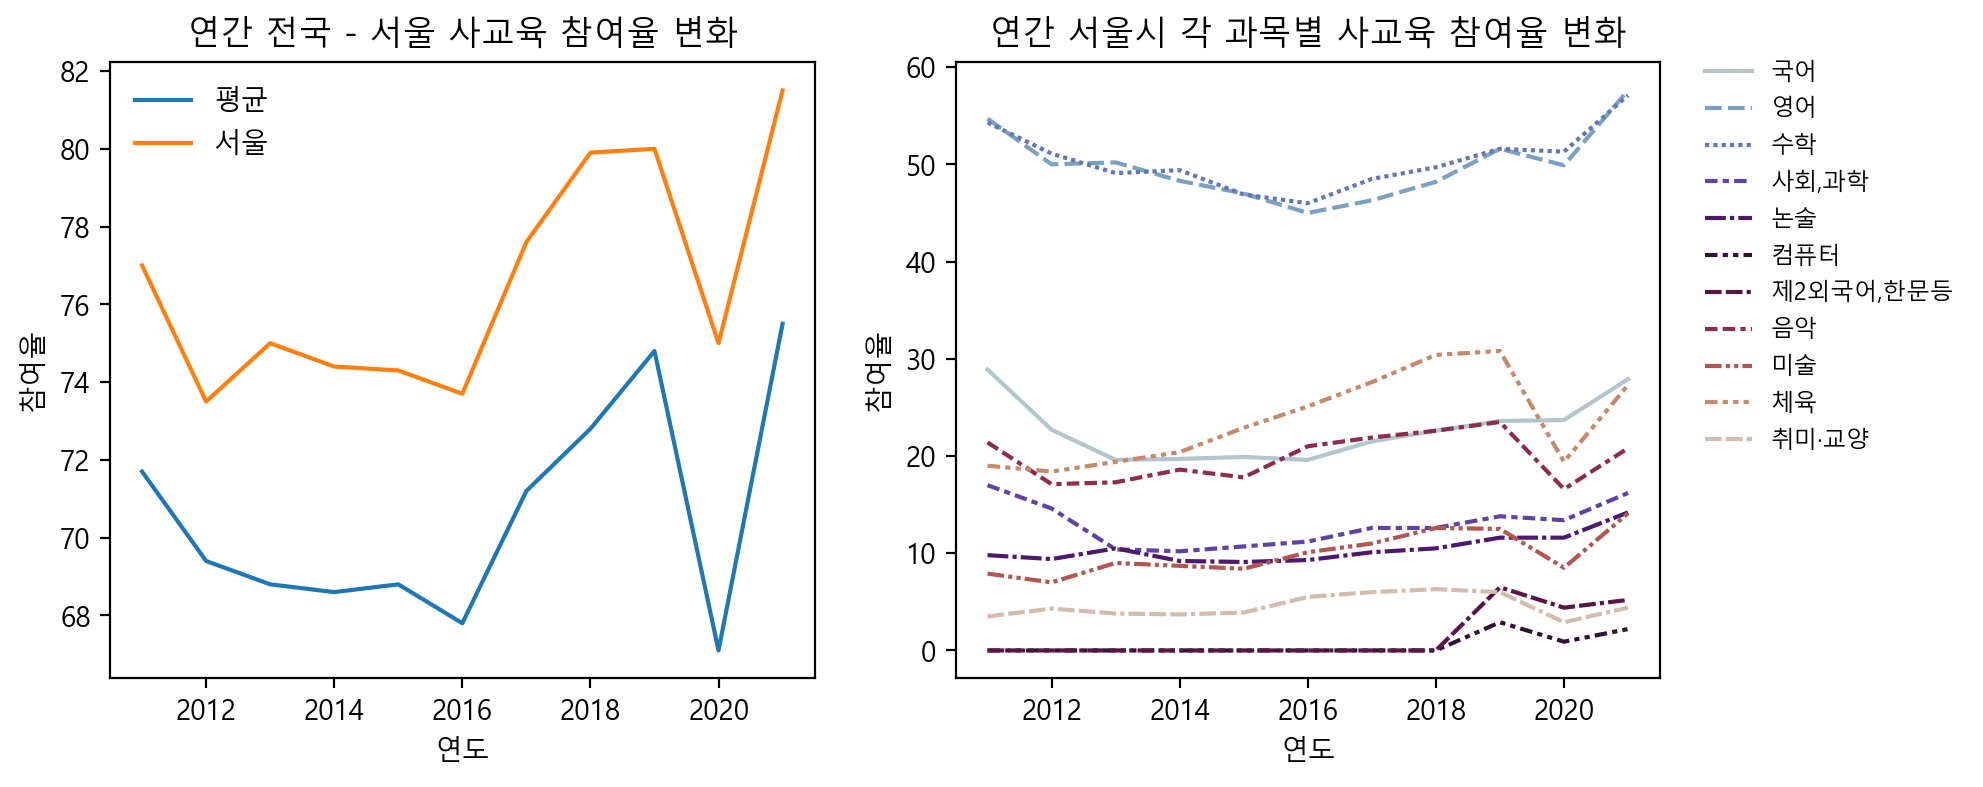

In [219]:
fig , ax = plt.subplots(ncols=2,figsize=(10,4))

sns.lineplot(x='연도',y='참여율',data=df_participation_ratio ,hue='기준',ax=ax[0]).set(title='연간 전국 - 서울 사교육 참여율 변화')
sns.lineplot(x='연도',y='참여율',data=df_seoul_subject_ratio ,hue='과목',style="과목",
            palette="twilight",ax=ax[1]).set(title='연간 서울시 각 과목별 사교육 참여율 변화')

ax[0].legend(fontsize = 10,edgecolor='white')
ax[1].legend(loc=(1.05,0.35), fontsize = 8.5,facecolor='white',edgecolor='white')

### 각 과목 별 전국 평균 참여율과 서울시 사교육 참여율

In [220]:
df_region_private = pd.read_csv('dataset_eda/연간_지역별_1인당_월평균_사교육비.csv')
df_region_subject = pd.read_csv('dataset_eda/연간_지역_과목별_1인당_월평균_사교육비.csv')

### 각 지역 과목별 지출 월평균 사교육비

In [221]:
df_region_p_edu_type = pd.read_csv('dataset_eda/지역별_학생_사교육_지출유형.csv',index_col=0)

### 학교급별 전체 사교육비 지출 월 평균 금액 비교

In [222]:
df_region_class_mean = pd.read_csv('dataset_eda/전국_서울_연간_인당_월평균_사교육비_지출.csv')
df_seoul_class_mean= pd.read_csv('dataset_eda/서울시_연간_학교급별_인당_월평균_사교육비_지출.csv',index_col=0)

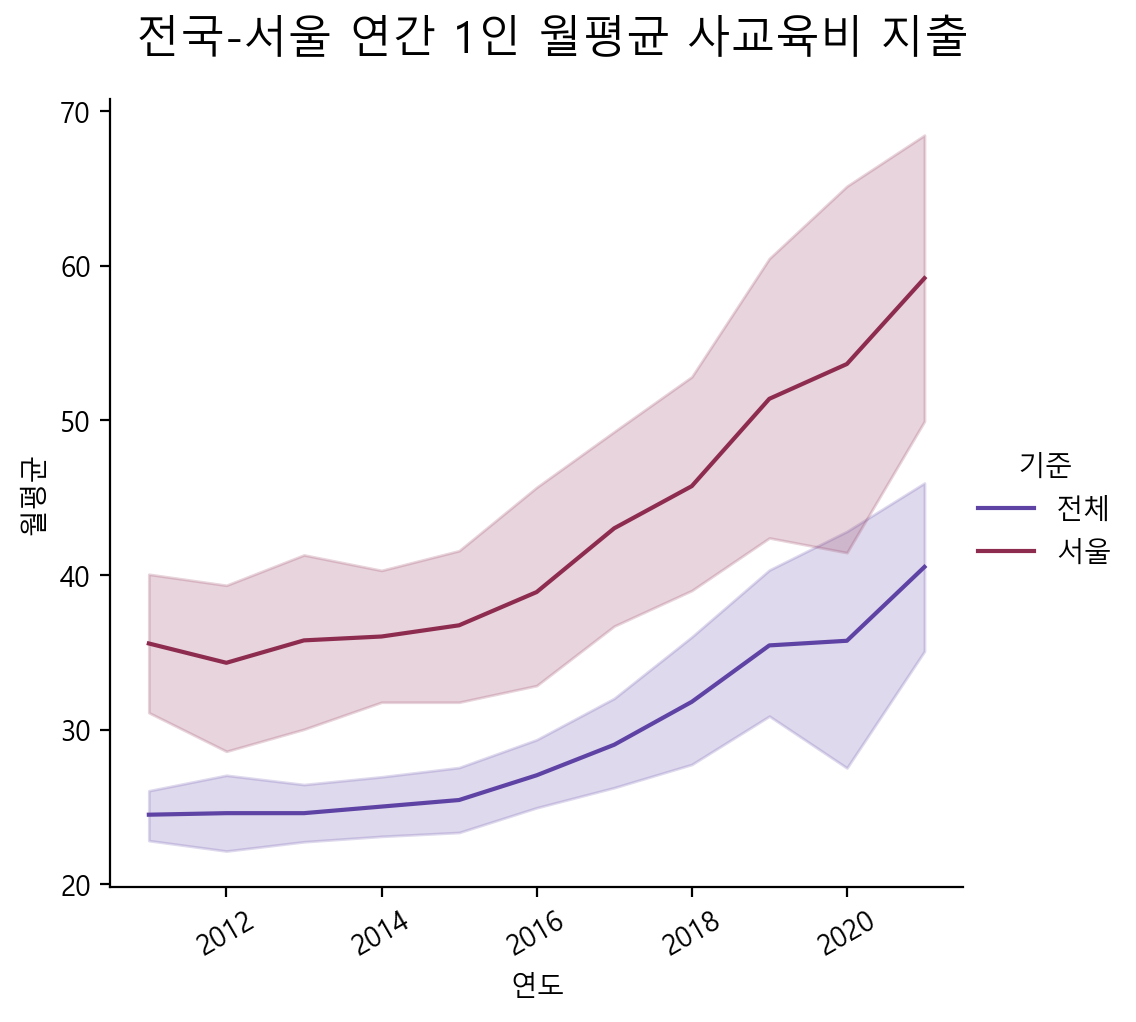

In [223]:
reg = sns.relplot(data=df_region_class_mean  ,x='연도',y='월평균',hue='기준',kind='line', palette="twilight")
reg.fig.subplots_adjust(top=0.9)
reg.fig.suptitle('전국-서울 연간 1인 월평균 사교육비 지출', fontsize = 16)
plt.xticks(rotation=30)
plt.show()

### 지역 - 학교급에 따른 연간 사교육 참여율

In [224]:
df_region_class = pd.read_csv('dataset_eda/지역_학교급에_따른_연간_사교육_참여율.csv',index_col=0)

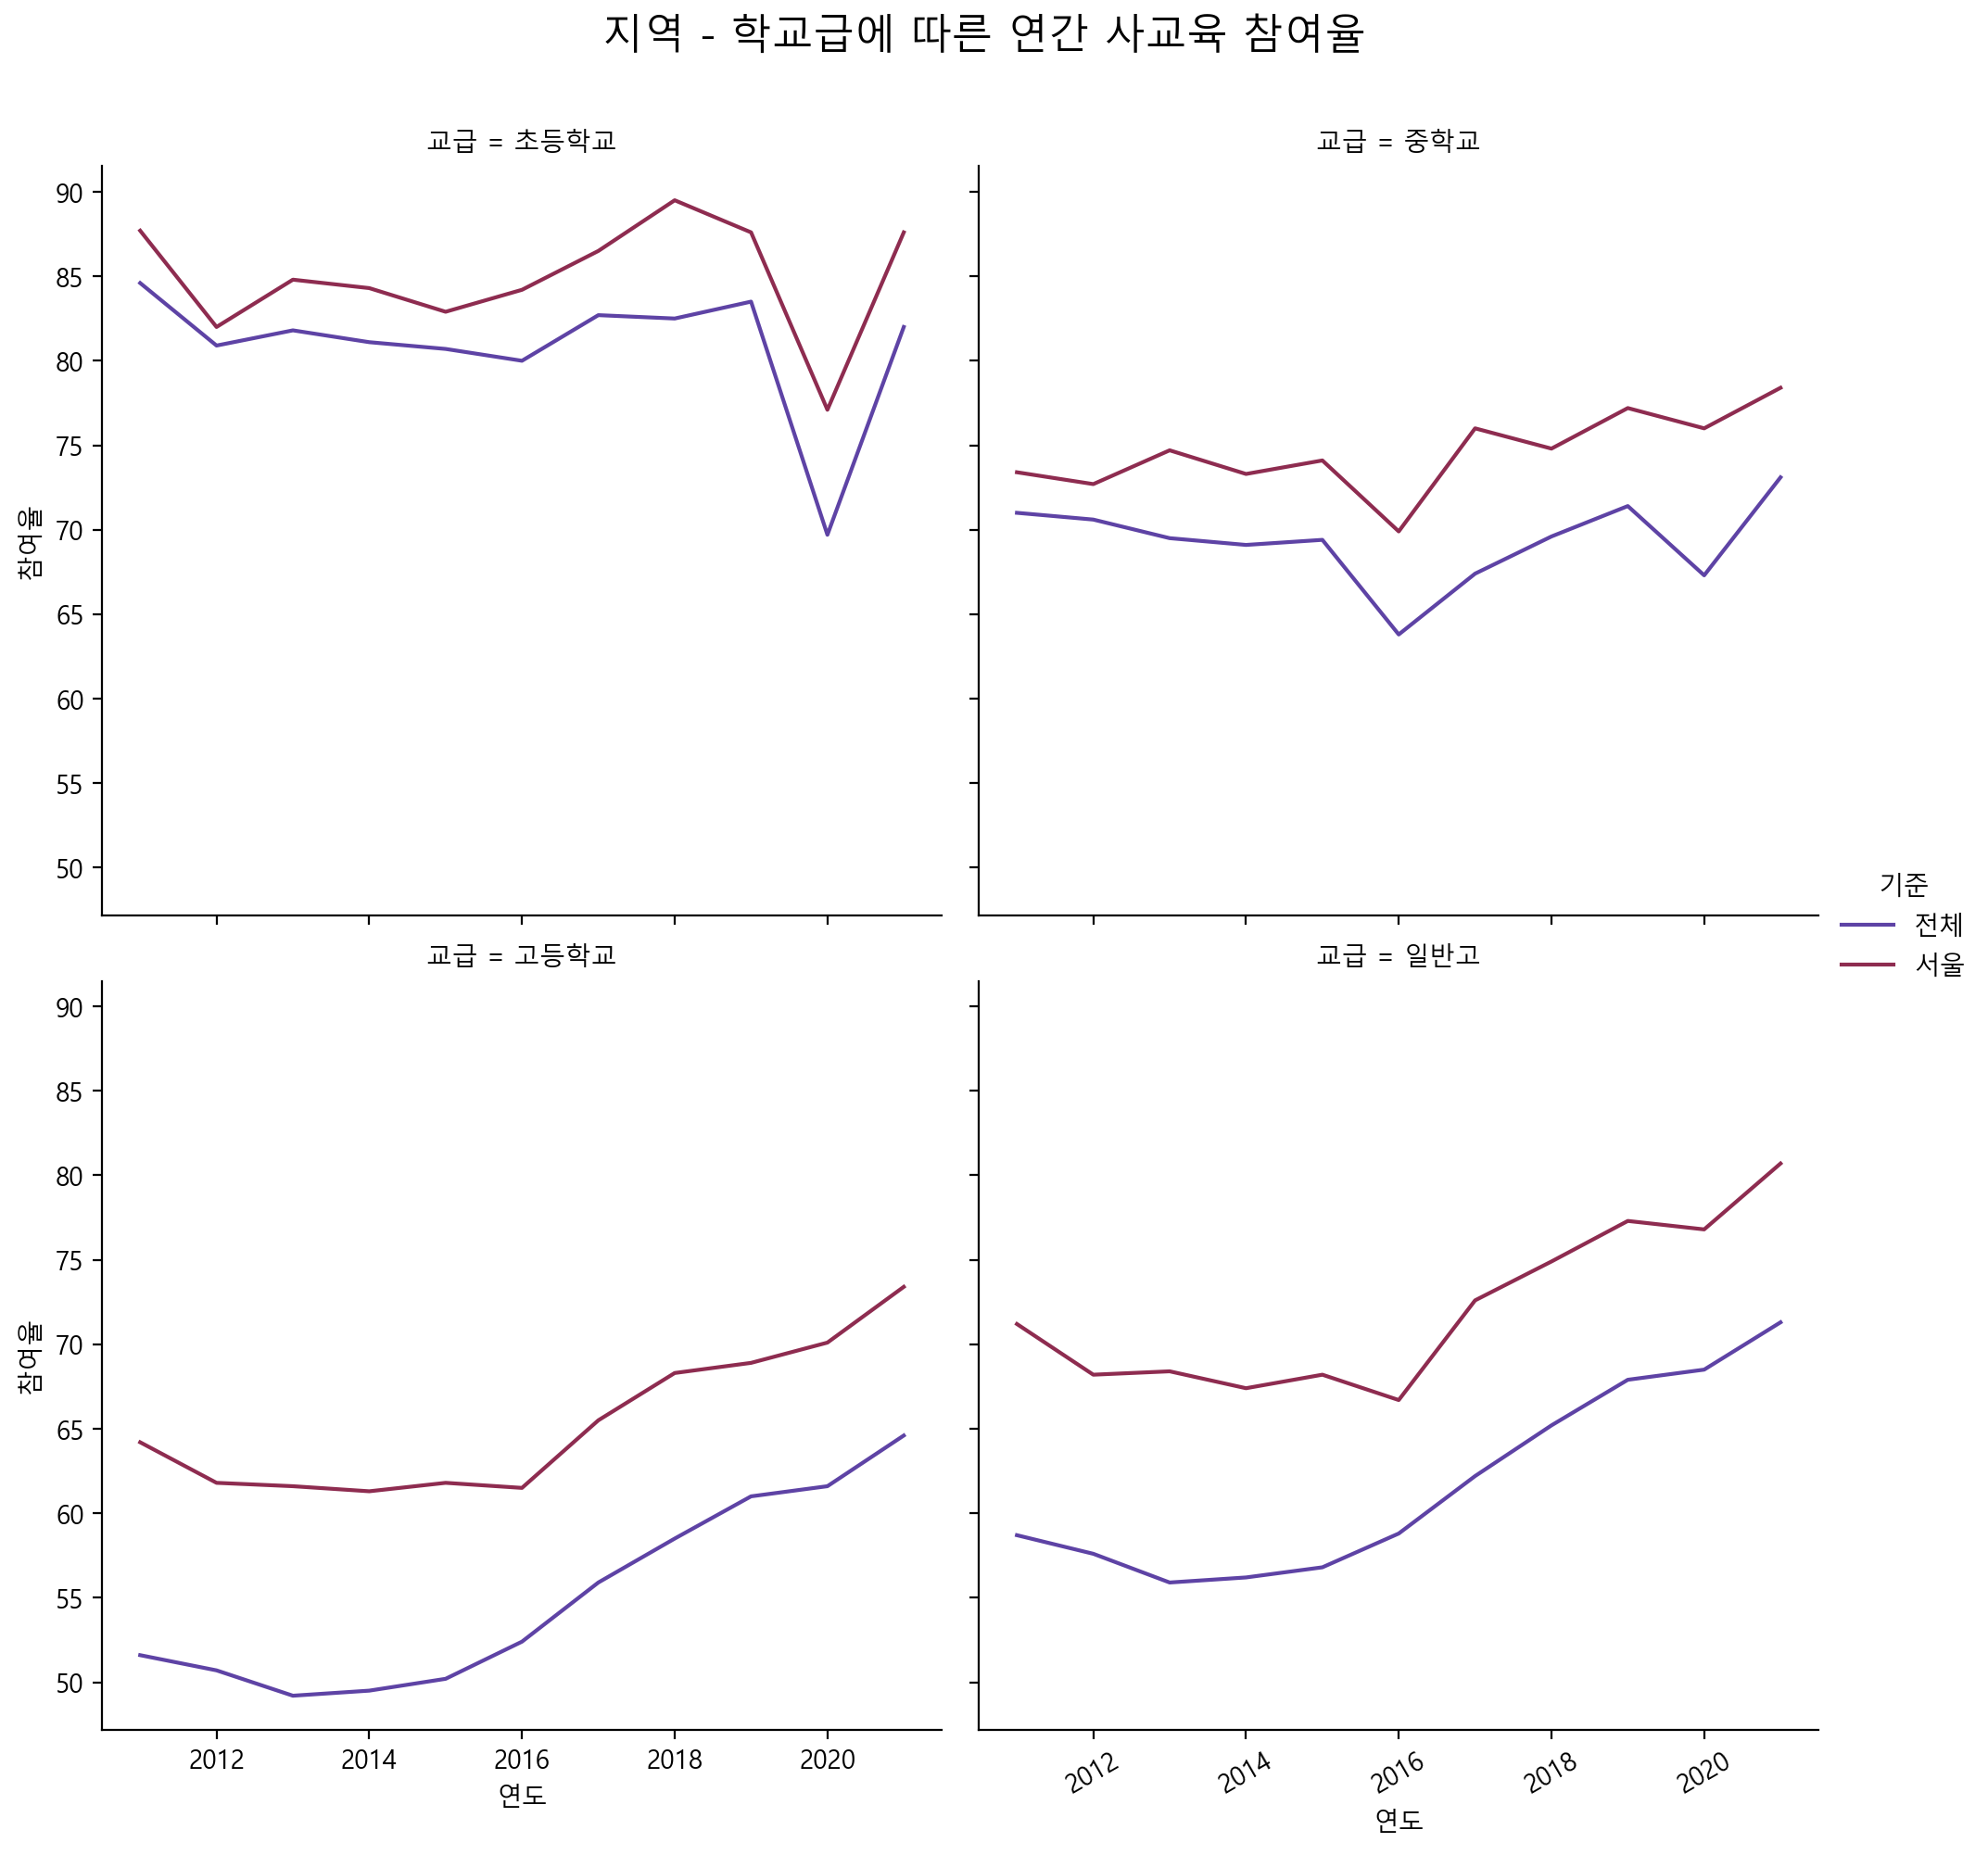

In [225]:
reg = sns.relplot(data=df_region_class,x='연도',y='참여율',hue='기준',col='교급',col_wrap=2,kind='line', palette="twilight")
reg.fig.subplots_adjust(top=0.9)
reg.fig.suptitle('지역 - 학교급에 따른 연간 사교육 참여율', fontsize = 16)
plt.xticks(rotation=30)
plt.show()

### pyecharts 시각화 
- 중학생 고등학생의 진로 계획 과 진로 설정에 가장 큰 요인을 미치는 것 .
- 학교급별_희망하는_최종학력
- 학교급별_희망직무여부

In [226]:
def mapping(x):
    if x == '-':
        x = 0.0
    return x

In [227]:
df_middle = pd.read_csv('dataset/중학생의_졸업_후_진로_계획_및_진학_희망_고등학교_선택에_가장_큰_영향요인_20221021092425.csv',encoding='cp949',header=0)
df_highschool =  pd.read_csv('dataset/고등학생의_졸업_후_진로계획_고등학교_유형별_비교__20221021114009.csv',encoding='cp949')

In [228]:
df_middle = pd.melt(df_middle, id_vars=['고등학교선택기준'], var_name ='Year', value_name='count')
df_middle['Year'] = df_middle['Year'].astype(int)
df_middle['count'] = df_middle['count'].apply(mapping).astype(float) 
df_middle.head()

고등학교선택기준  Year   count
0          희망하는 진로·직업 목표  2015     0.0
1  좋아하는 것(흥미)과 잘하는 것(적성)  2015  3195.0
2                     성적  2015  2703.0
3                부모님의 희망  2015   953.0
4                선생님의 조언  2015  1277.0

In [229]:
df_highschool  = pd.melt(df_highschool , id_vars=['진로계획'], var_name ='Year', value_name='count')
df_highschool['Year'] = df_highschool ['Year'].astype(int)
df_highschool['count'] = df_highschool ['count'].apply(mapping).astype(float) 
df_highschool.head()

진로계획  Year   count
0          대학 진학  2016  7471.0
1             취업  2016  1423.0
2             창업  2016   154.0
3  기타(군입대 해외 유학)  2016   413.0
4          진로미결정  2016   833.0

In [230]:
fig_middle_tab = Tab()

# 파이차트
reason =['희망하는 진로·직업 목표', '좋아하는 것(흥미)과 잘하는 것(적성)', '성적', '부모님의 희망',
       '선생님의 조언', '친구', '경제적 이유', '통학 거리', '기타', '없음']

after_plan  = ['대학 진학', '취업', '창업', '기타(군입대 해외 유학)', '진로미결정']

fig_reason_mid= Timeline(init_opts=opts.InitOpts(theme=ThemeType.WESTEROS, height='500px',width='650px')).add_schema(is_auto_play=True) 
fig_reason_high= Timeline(init_opts=opts.InitOpts(theme=ThemeType.WESTEROS, height='500px',width='650px')).add_schema(is_auto_play=True) 

# 2016 ~ 2020
for t in df_middle['Year'].unique()[1:]:
    fig_reason_mid.add((
        Pie(init_opts=opts.InitOpts(theme=ThemeType.WESTEROS))
            .add("", [list(z) for z in zip(reason, df_middle[df_middle['Year'] == t]['count'])],
            rosetype="radius",radius=["30%", "60%"],
            label_opts=opts.LabelOpts(position='outside', formatter="{b}\n{d}%"))
        
         .set_global_opts(title_opts=opts.TitleOpts("전국 중학생 진학 선택 기준", subtitle = "마우스를 올려 확인해보세요!"),
                          legend_opts=opts.LegendOpts(type_ = 'scroll',
                                                      pos_bottom ="70%",pos_left="75%",
                                                      orient="vertical",legend_icon ='pin'))),"{}년도".format(t))
for t in df_middle['Year'].unique()[1:]: 
    fig_reason_high.add((
        Pie(init_opts=opts.InitOpts(theme=ThemeType.WESTEROS))
            .add("", [list(z) for z in zip(after_plan , df_highschool[df_highschool['Year'] == t]['count'])],
            rosetype="radius",radius=["30%", "60%"],
            label_opts=opts.LabelOpts(position='outside', formatter="{b}\n{d}%"))

            .set_global_opts(title_opts=opts.TitleOpts("전국 고등학생 졸업 후 진로계획", subtitle = "마우스를 올려 확인해보세요!"),
                            legend_opts=opts.LegendOpts(type_ = 'scroll',
                                                        pos_bottom ="70%",pos_left="75%",
                                                        orient="vertical",legend_icon ='pin'))),"{}년도".format(t))


    
        
fig_middle_tab.add(fig_reason_mid,'중학생의 졸업 후 고교 선정 기준 ')
fig_middle_tab.add(fig_reason_high,'고등학생의 졸업 후 향후 진로 계획')
fig_middle_tab.render('df_korea_student.html')

'C:\\Users\\sanga\\Desktop\\Structure-main\\Structure\\df_korea_student.html'

## 가설 2 : 시험을 부활시키려는 이유

### 가설 2-1 : 시험 폐지가 사교육비 감소로 이어지지 않음

In [231]:
seoul_private_edu_cost_df = pd.read_csv('dataset/seoul_private.csv')
# 컬럼 이름 변경
seoul_private_edu_cost_df.columns = ["시점", "1인당 월평균 사교육비(만원) : 평균", "평균 사교육 참여율(%)", 
                                     "1인당 월평균 사교육비(만원) : 초등학교", "초등 사교육 참여율(%)", 
                                     "1인당 월평균 사교육비(만원) : 중학교", "중등 사교육 참여율(%)", 
                                     "1인당 월평균 사교육비(만원) : 고등학교", "고등 사교육 참여율(%)", 
                                     "1인당 월평균 사교육비(만원) : 일반고", "일반고 사교육 참여율(%)"]

# 2011~2021년 외 데이터 삭제
seoul_private_edu_cost_df = seoul_private_edu_cost_df.drop([0, 1, 2])
# seoul_private_edu_cost_df['시점'] = seoul_private_edu_cost_df['시점'].astype(int)
seoul_private_edu_cost_df = seoul_private_edu_cost_df.set_index('시점')
seoul_private_edu_cost_df = seoul_private_edu_cost_df.astype('float')
# 컬럼에 "사교육비" 단어를 포함하는 조건
condition = seoul_private_edu_cost_df.columns.str.contains("사교육비")

In [232]:
ratio_df = seoul_private_edu_cost_df.loc[:, ~condition]
cost_df = seoul_private_edu_cost_df.loc[:, condition]

In [233]:
cost_df = pd.melt(cost_df.reset_index(drop=0),id_vars='시점',var_name = '교급', value_name = '월평균')
ratio_df = pd.melt(ratio_df .reset_index(drop=0),id_vars='시점',var_name = '교급', value_name = '월평균')

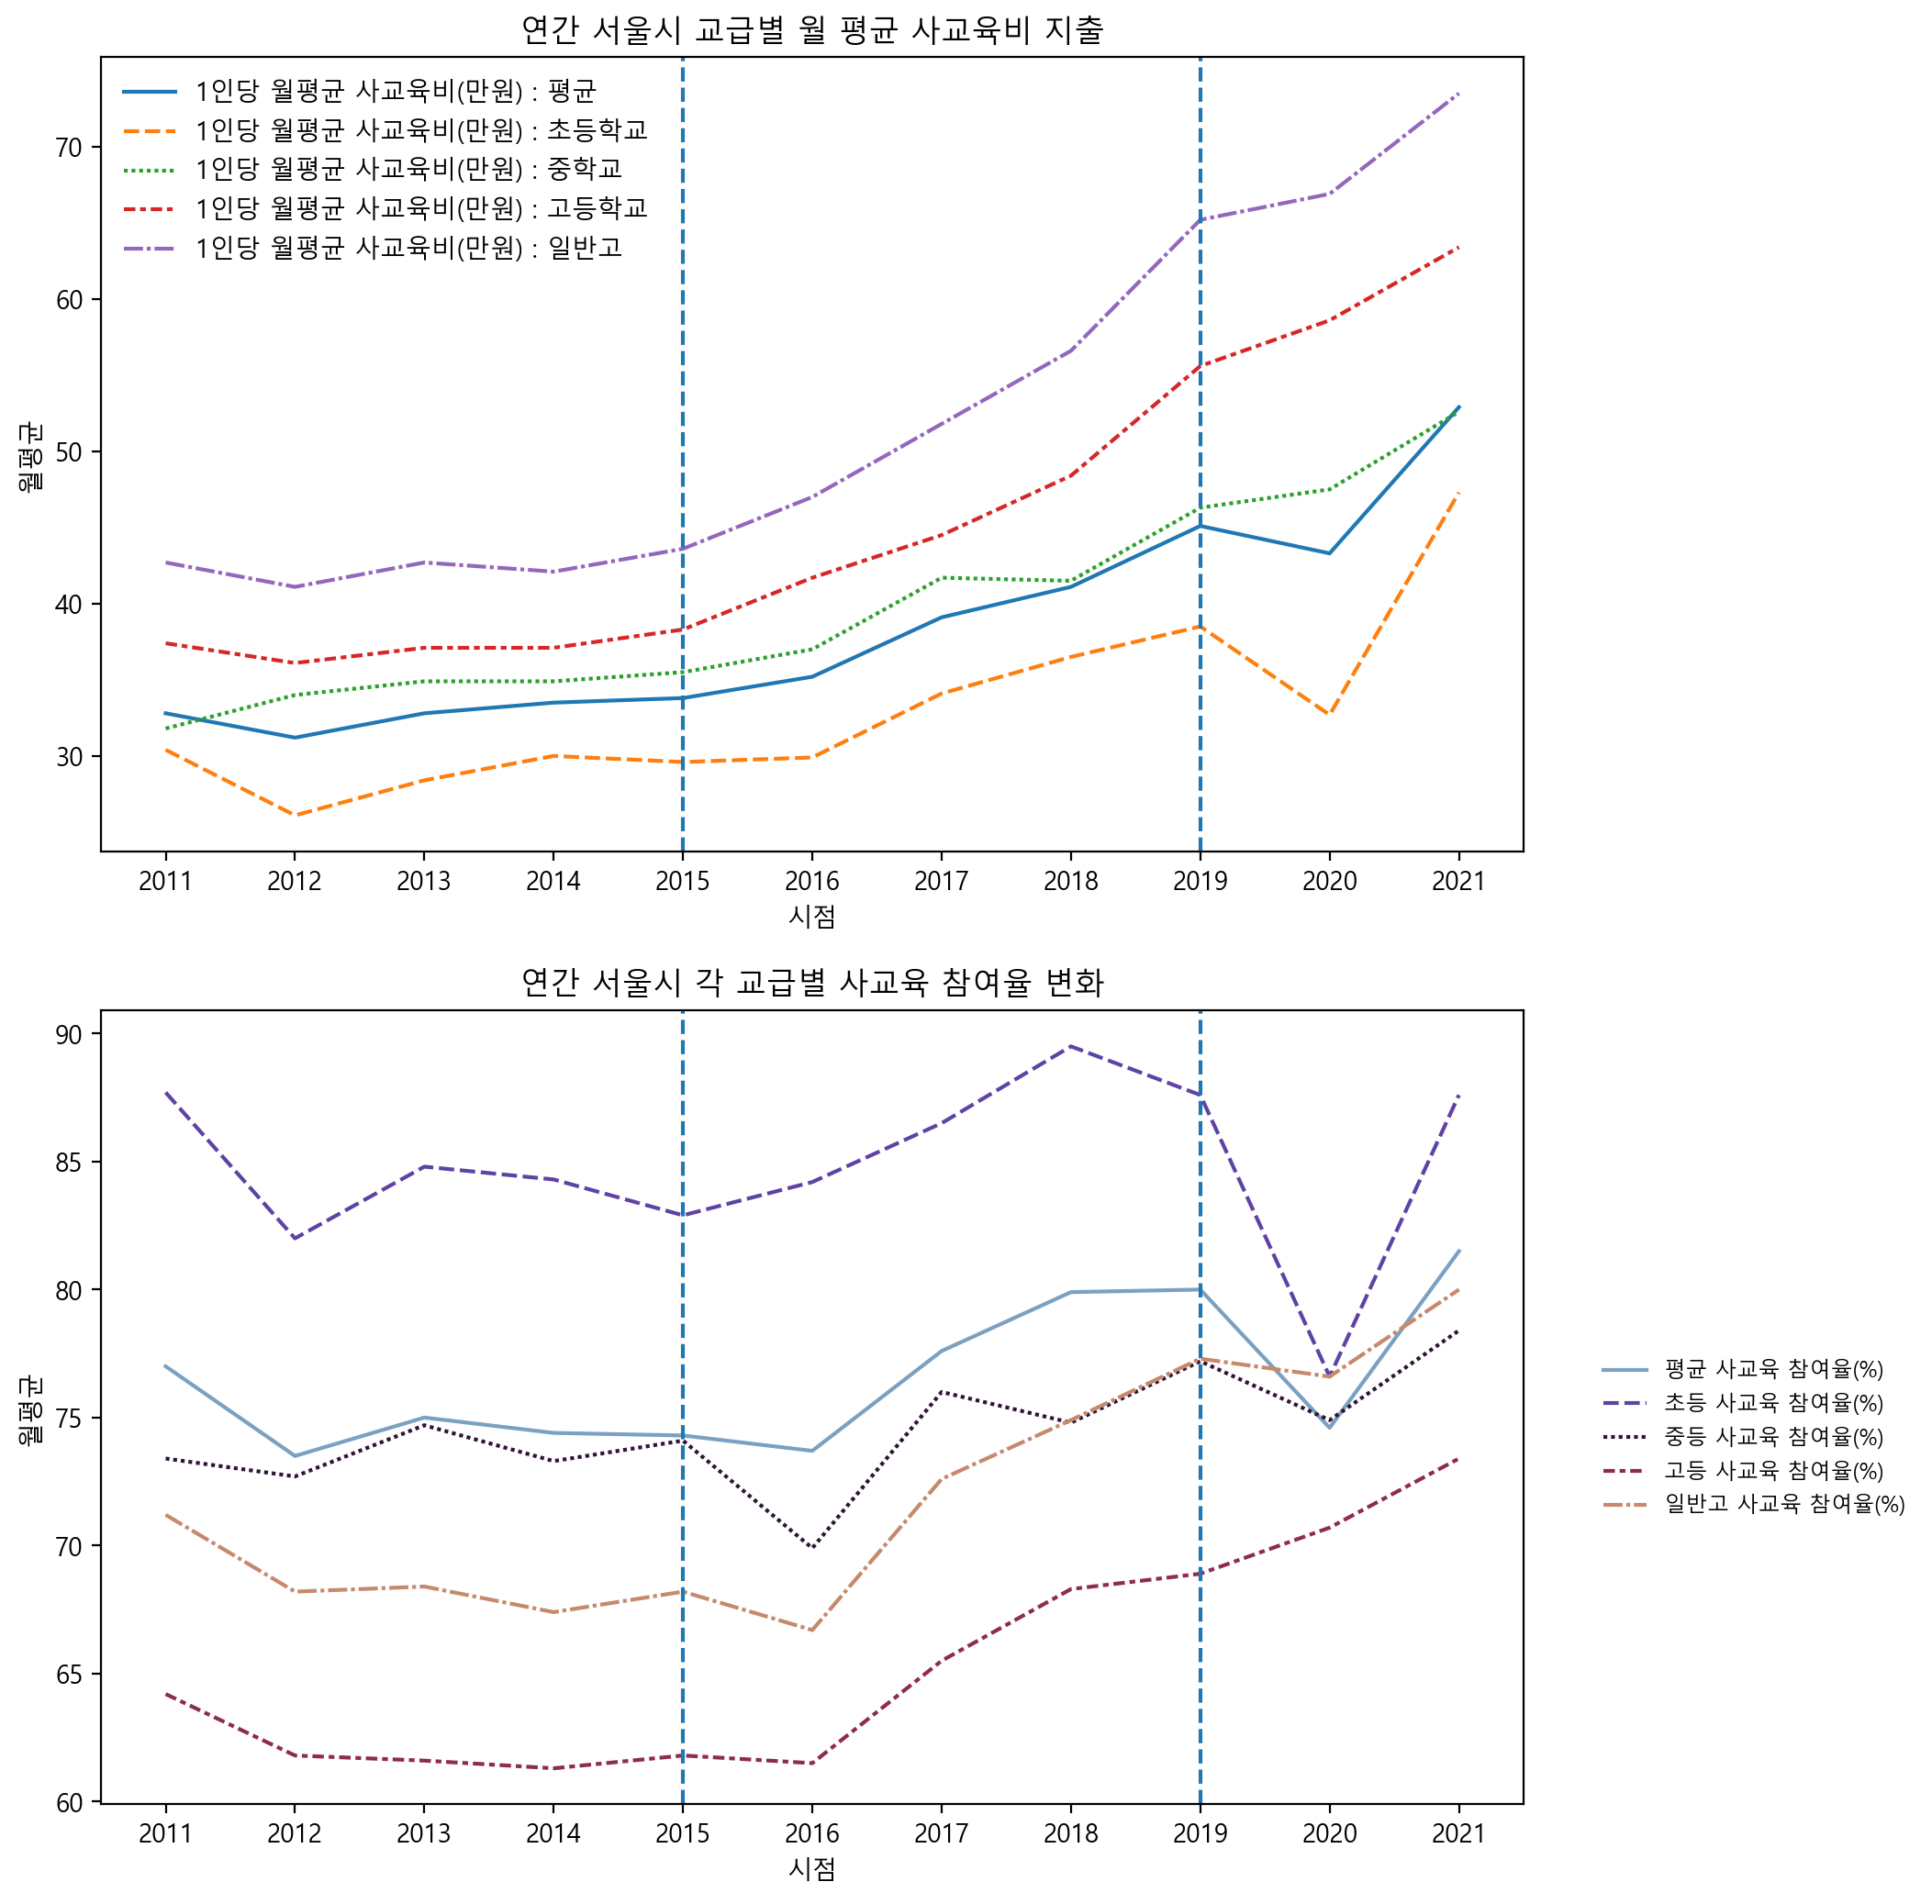

In [234]:
fig , ax = plt.subplots(nrows=2,figsize=(10,8))

sns.lineplot(data = cost_df, x='시점', y ='월평균', hue = '교급',style='교급',ax=ax[0]).set(title='연간 서울시 교급별 월 평균 사교육비 지출')
sns.lineplot(data = ratio_df, x='시점', y ='월평균', hue = '교급',style='교급',
            palette="twilight",ax=ax[1]).set(title='연간 서울시 각 교급별 사교육 참여율 변화')

ax[0].legend(fontsize = 10,edgecolor='white')
ax[1].legend(loc=(1.05,0.35), fontsize = 8.5,facecolor='white',edgecolor='white')

ax[0].axvline(x = '2015',linestyle='--')
ax[0].axvline(x = '2019',linestyle='--')
ax[1].axvline(x = '2015',linestyle='--')
ax[1].axvline(x = '2019',linestyle='--')

fig.subplots_adjust(top=1.3)

### 가설 : 참여율과 사교육비의 상관관계 in [평균, 초등학교, 중학교, 고등학교, 일반고]

<AxesSubplot:>

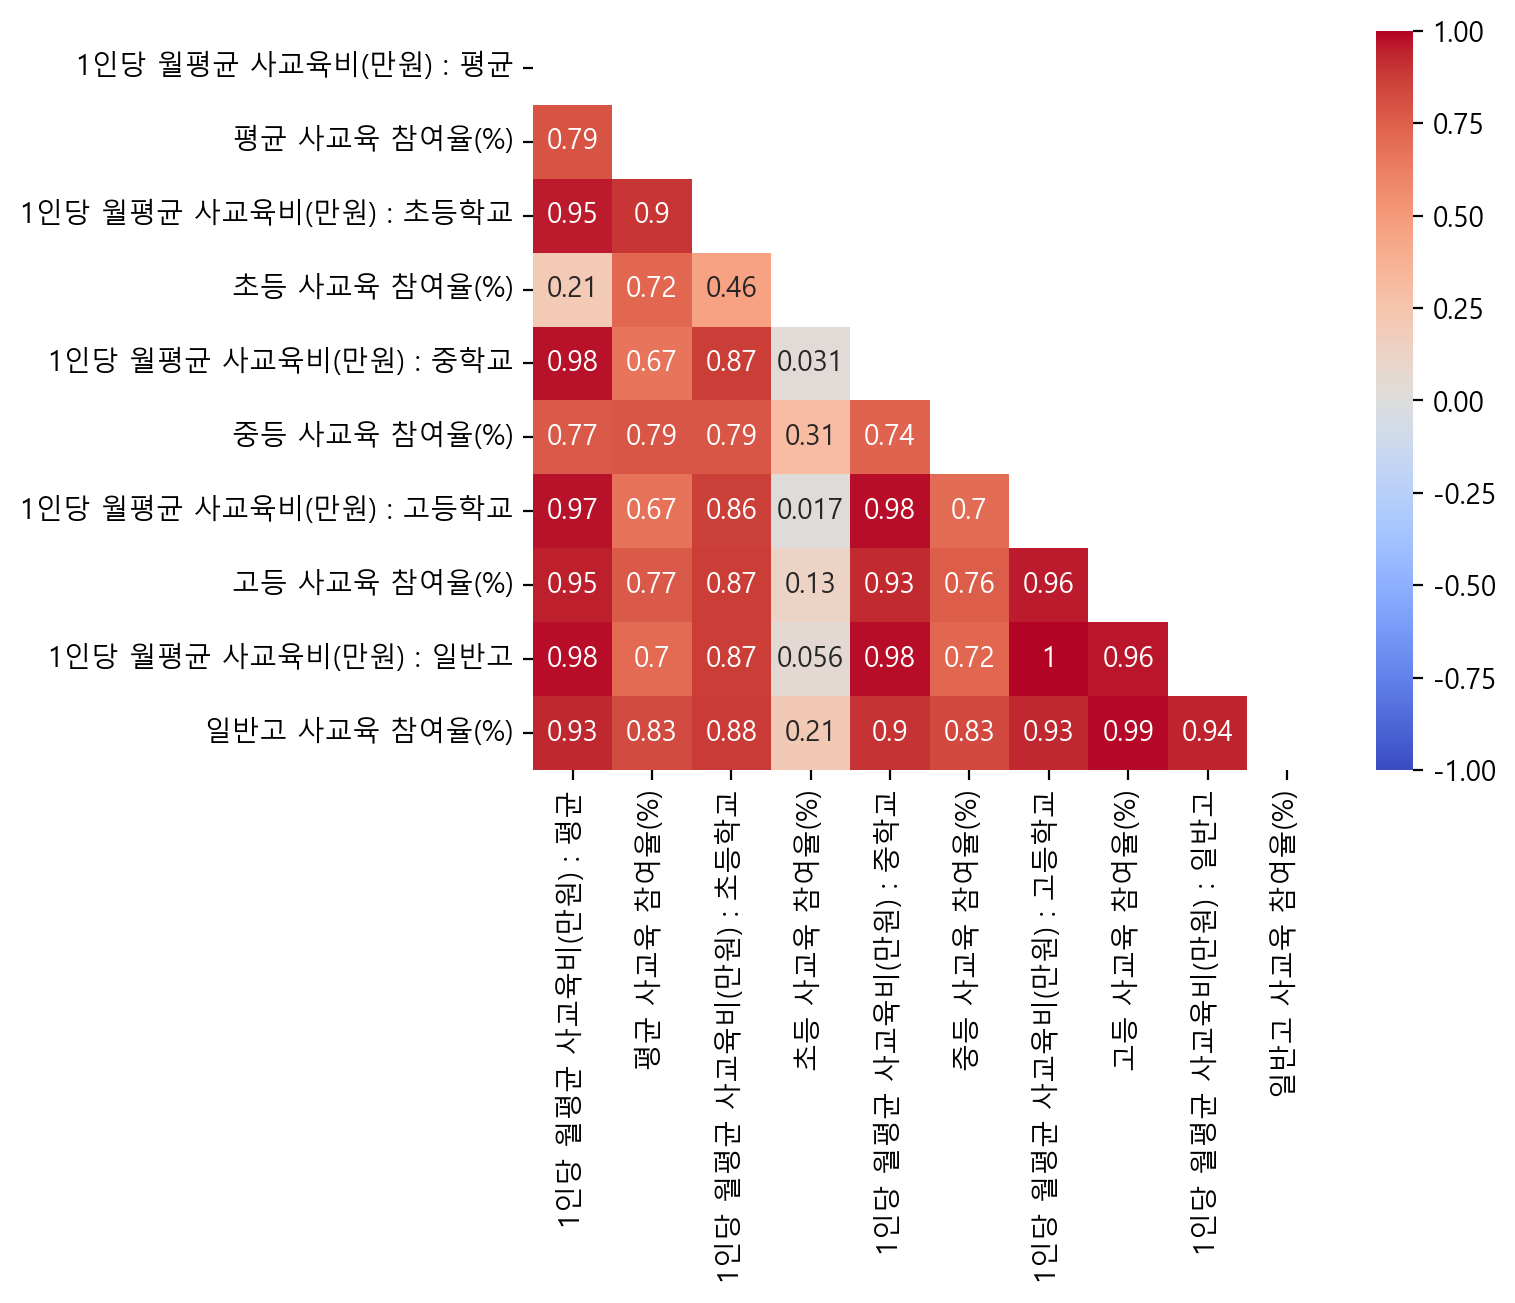

In [235]:
# 전체 상관관계
mask = np.triu(np.ones_like(seoul_private_edu_cost_df.corr()))
sns.heatmap(seoul_private_edu_cost_df.corr(), annot=True, mask=mask, cmap='coolwarm', vmin=-1, vmax=1)

In [236]:
# 학교별 상관관계
def corr_per_and_cost(school):
    if school == "평균":
        df = seoul_private_edu_cost_df.iloc[:, 0:2]
    elif school == "초등학교":
        df = seoul_private_edu_cost_df.iloc[:, 2:4]
    elif school == "중학교":
        df = seoul_private_edu_cost_df.iloc[:, 4:6]
    elif school == "고등학교":
        df = seoul_private_edu_cost_df.iloc[:, 6:8]
    elif school == "일반고":
        df = seoul_private_edu_cost_df.iloc[:, 8:10]
    mask = np.triu(np.ones_like(df.corr()))
    return sns.heatmap(df.corr(), annot=True, mask=mask, cmap='coolwarm', vmin=-1, vmax=1)

* 15년 고등학교 신입생부터 영어 절대평가
* 19년 고등학교 신입생부터 문이과 통합


* 교육비의 경우 15년부터 상승세를 보이는데 영어 절대평가 영향인지?
 
* 20년은 코로나로 급락 추정    



* 고등학생의 경우 사교육 참여율과 1인당 사교육비가 양의 상관관계 이므로 사교육비가 증가하는 원인은 참여인원의 상승인 것으로 보임

### 가설 2-2 : 사교육비 감소보다 학생들의 성취도 감소 비용이 더 큼
* 서울시 학업 성취도 평가 추이
* 학업 중단율 통계 추이
    * 학업중단율 : (학업중단자수/학생수)*100
    * 학업중단자 : 질병, 학교부적응, 가사, 기타 등의 사유로 인한 휴학, 자퇴, 제적, 퇴학 등에 의해 학업을 중단한 자
    * 초등학교와 중학교는 유예 및 면제자를 학업중단자로 봄
    * 고등학교의 학업중단사유는 자퇴(질병, 가사, 부적응, 해외출국, 기타), 퇴학(품행)임
    * 학업중단자에 사망자는 포함되지 않음
    * 구분 연도는 학년도임(전년도 3월1일부터 당해년도 2월말까지를 한 학년도로 봄)
    * 2010학년도부터 인정유학, 해외이주, 파견동행이 학업중단자에 포함됨
* 국제학업성취도 평가(PISA)를 이용하여 국가간 비교

In [237]:
stop_school = pd.read_excel("./dataset/seoul_stop_school.xlsx")
# 필요 없는 행 삭제
stop_school = stop_school.drop([0, 1, 2])
stop_school = stop_school.reset_index(drop=True)
stop_school = stop_school.set_index("시점")
stop_school.to_csv("seoul_stop_school.csv", index=False)
stop_school = stop_school.astype("float")

# 초등학교 학업 중단율 조건
e_condition = stop_school.columns.str.contains("초등학교 학업중단율")
# 중학교 학업 중단율 조건
m_condition = stop_school.columns.str.contains("중학교 학업중단율")
# 고등학교 학업 중단율 조건
h_condition = stop_school.columns.str.contains("고등학교 학업중단율")

stop_e_school = stop_school.loc[:, e_condition]
stop_m_school = stop_school.loc[:, m_condition]
stop_h_school = stop_school.loc[:, h_condition]

<AxesSubplot:xlabel='시점'>

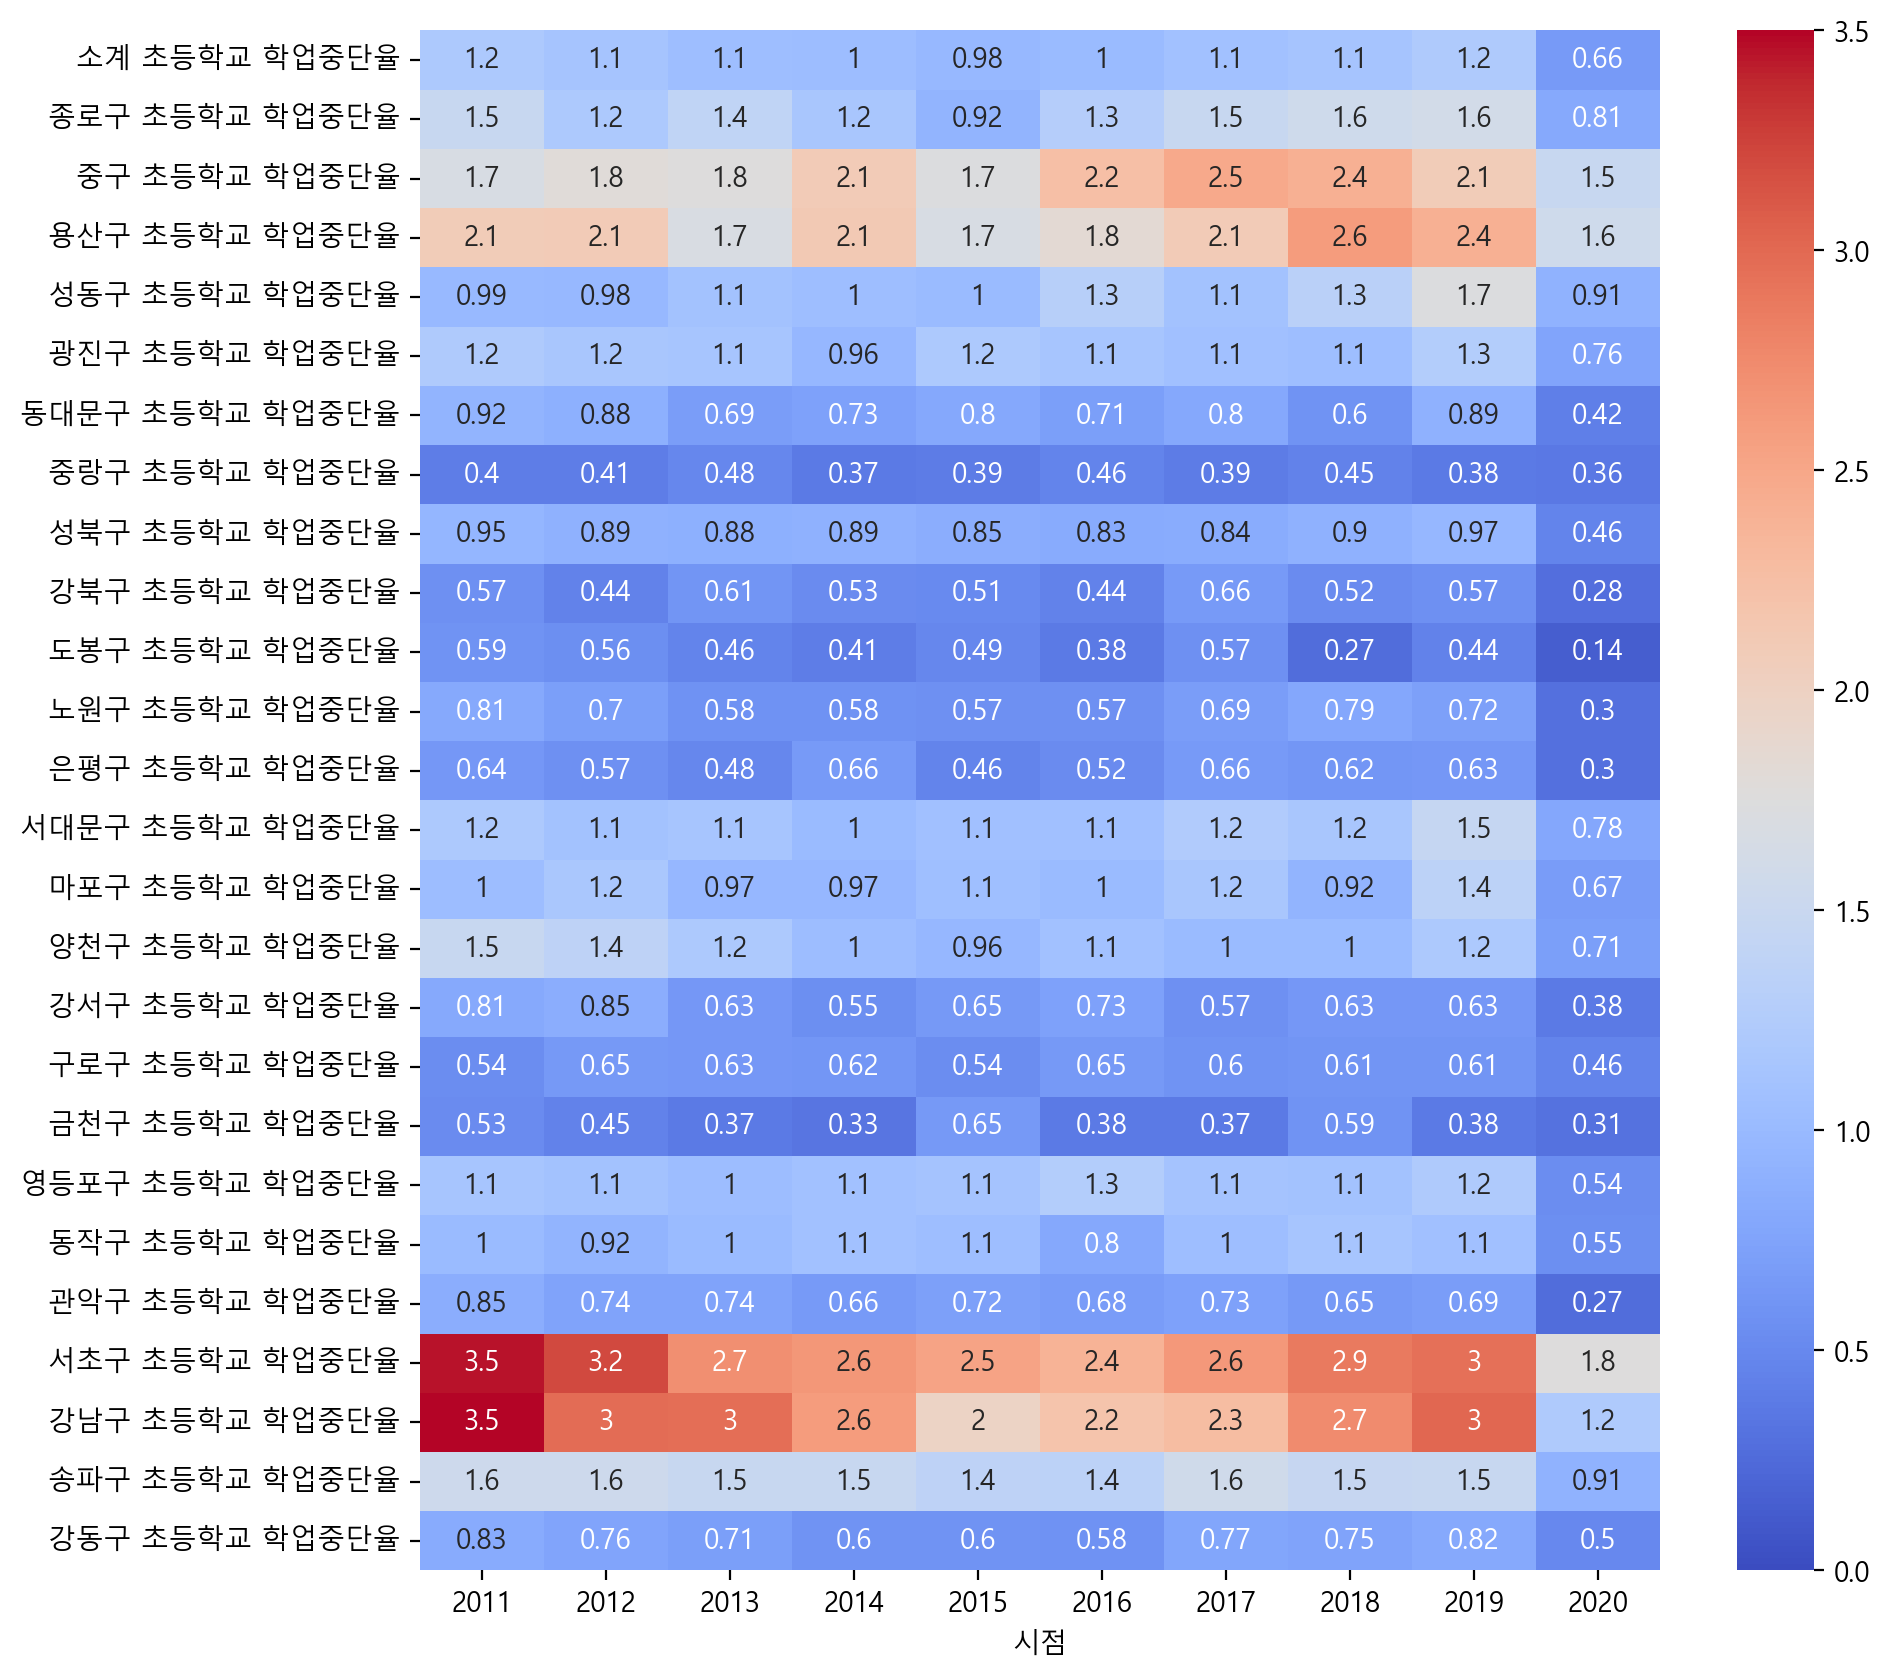

In [238]:
# 서울 구별 초등학교 학업 중단율
plt.figure(figsize=(10, 10))
sns.heatmap(stop_e_school.T, annot=True, cmap="coolwarm", vmin=0, vmax=3.5)

<AxesSubplot:xlabel='시점'>

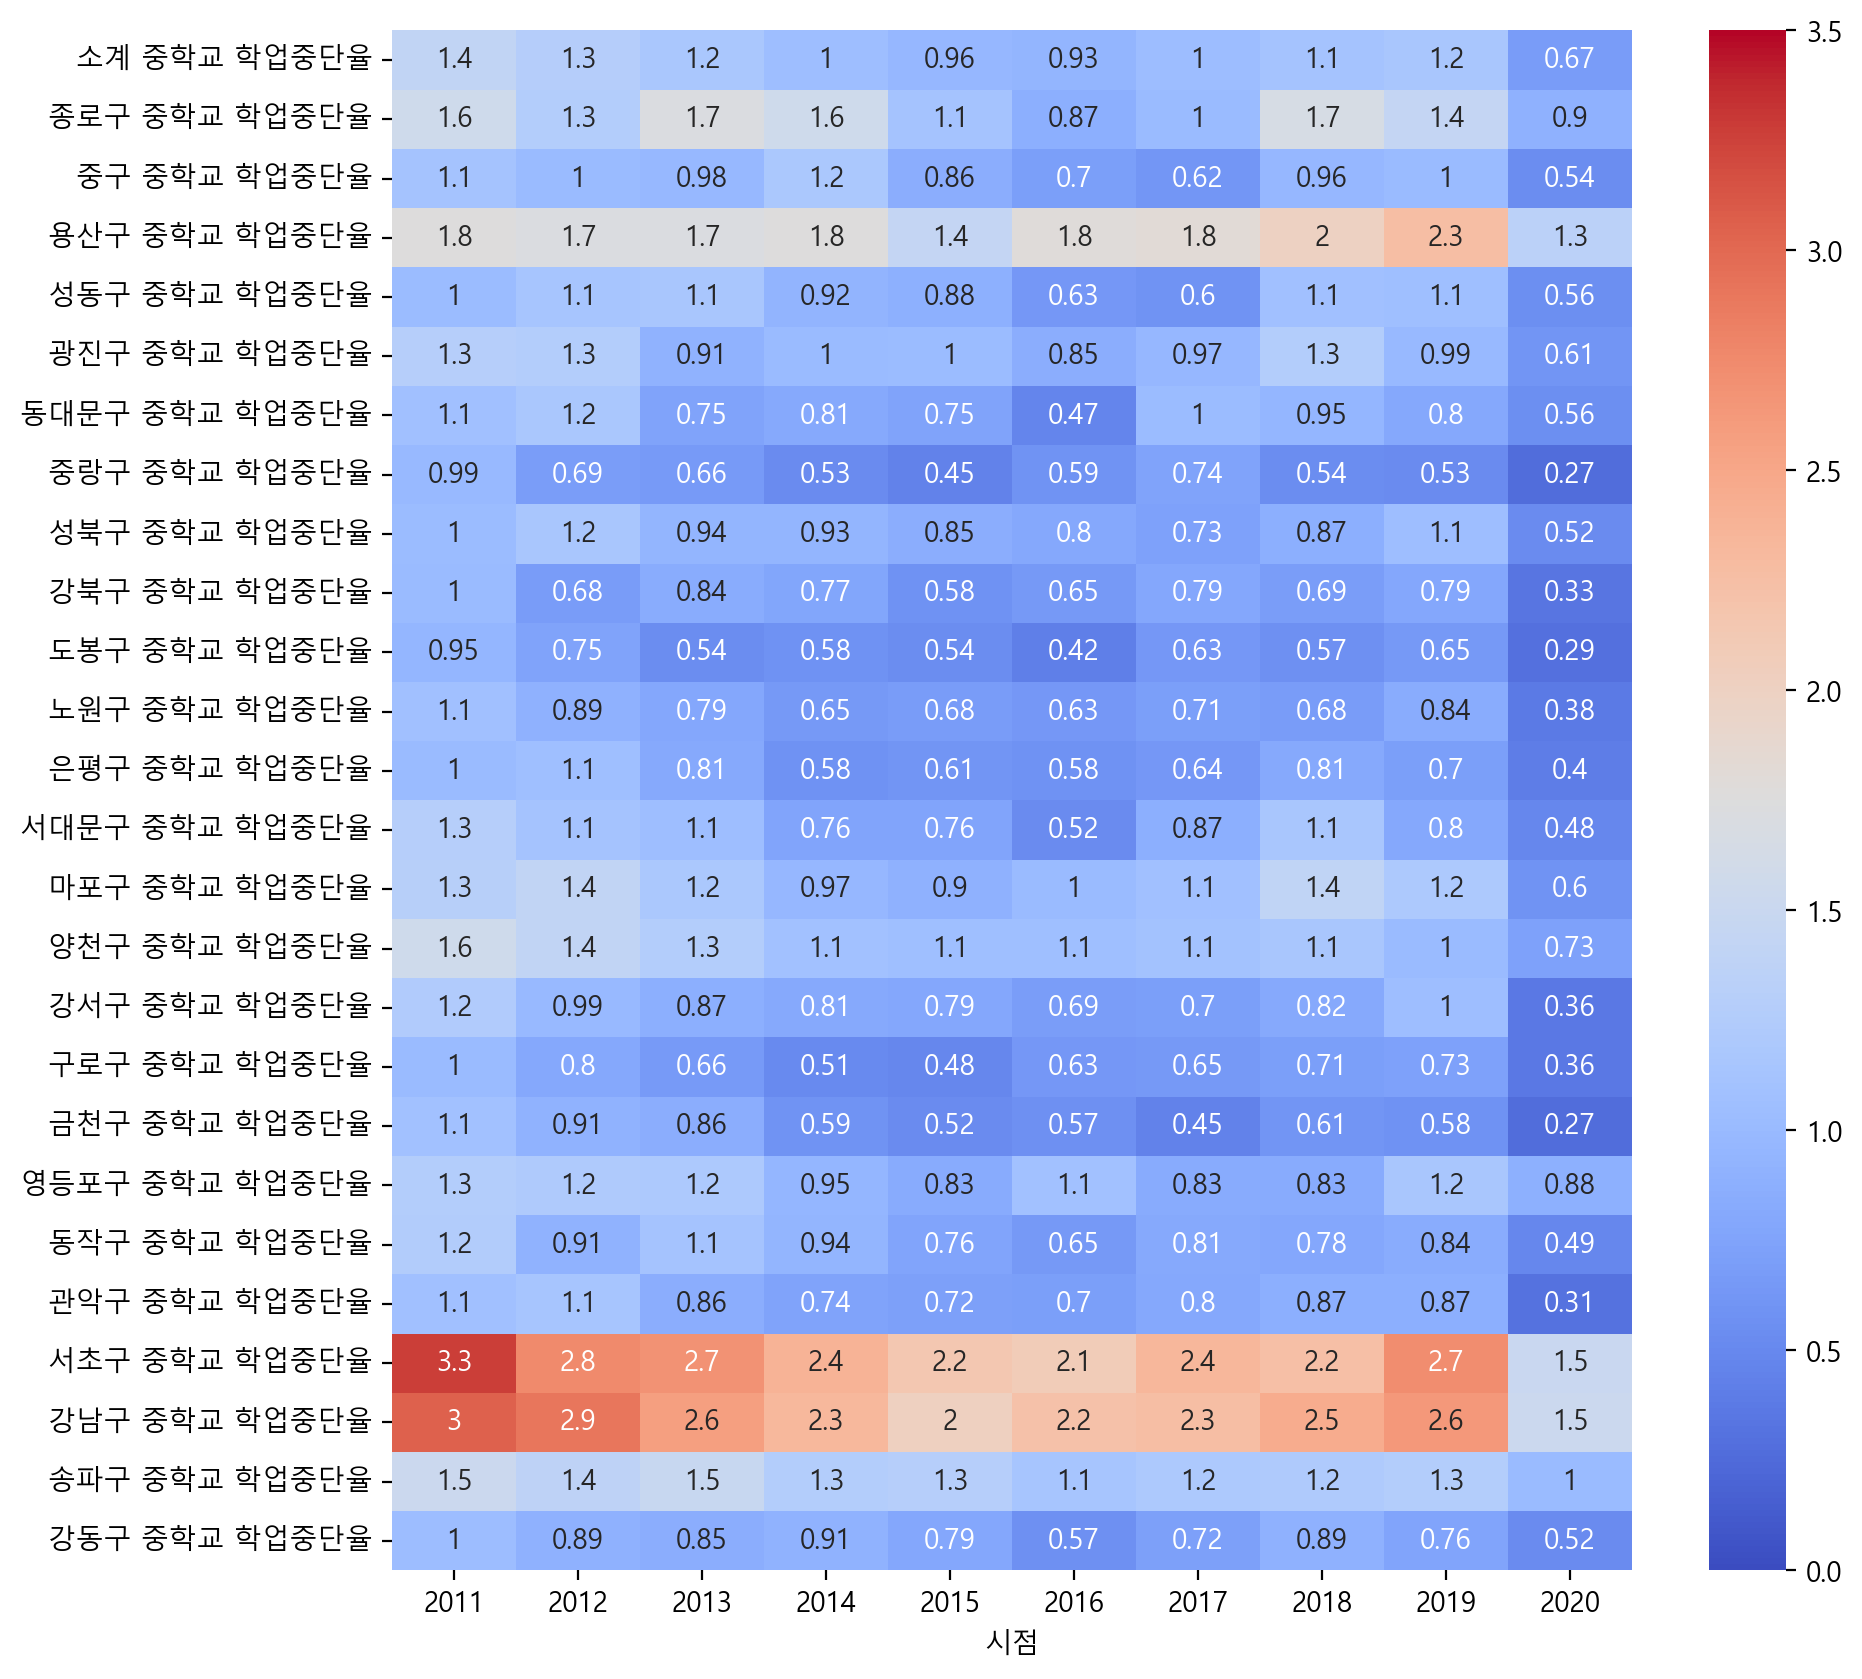

In [239]:
# 서울 구별 중학교 학업 중단율
plt.figure(figsize=(10, 10))
sns.heatmap(stop_m_school.T, annot=True, cmap="coolwarm", vmin=0, vmax=3.5)

<AxesSubplot:xlabel='시점'>

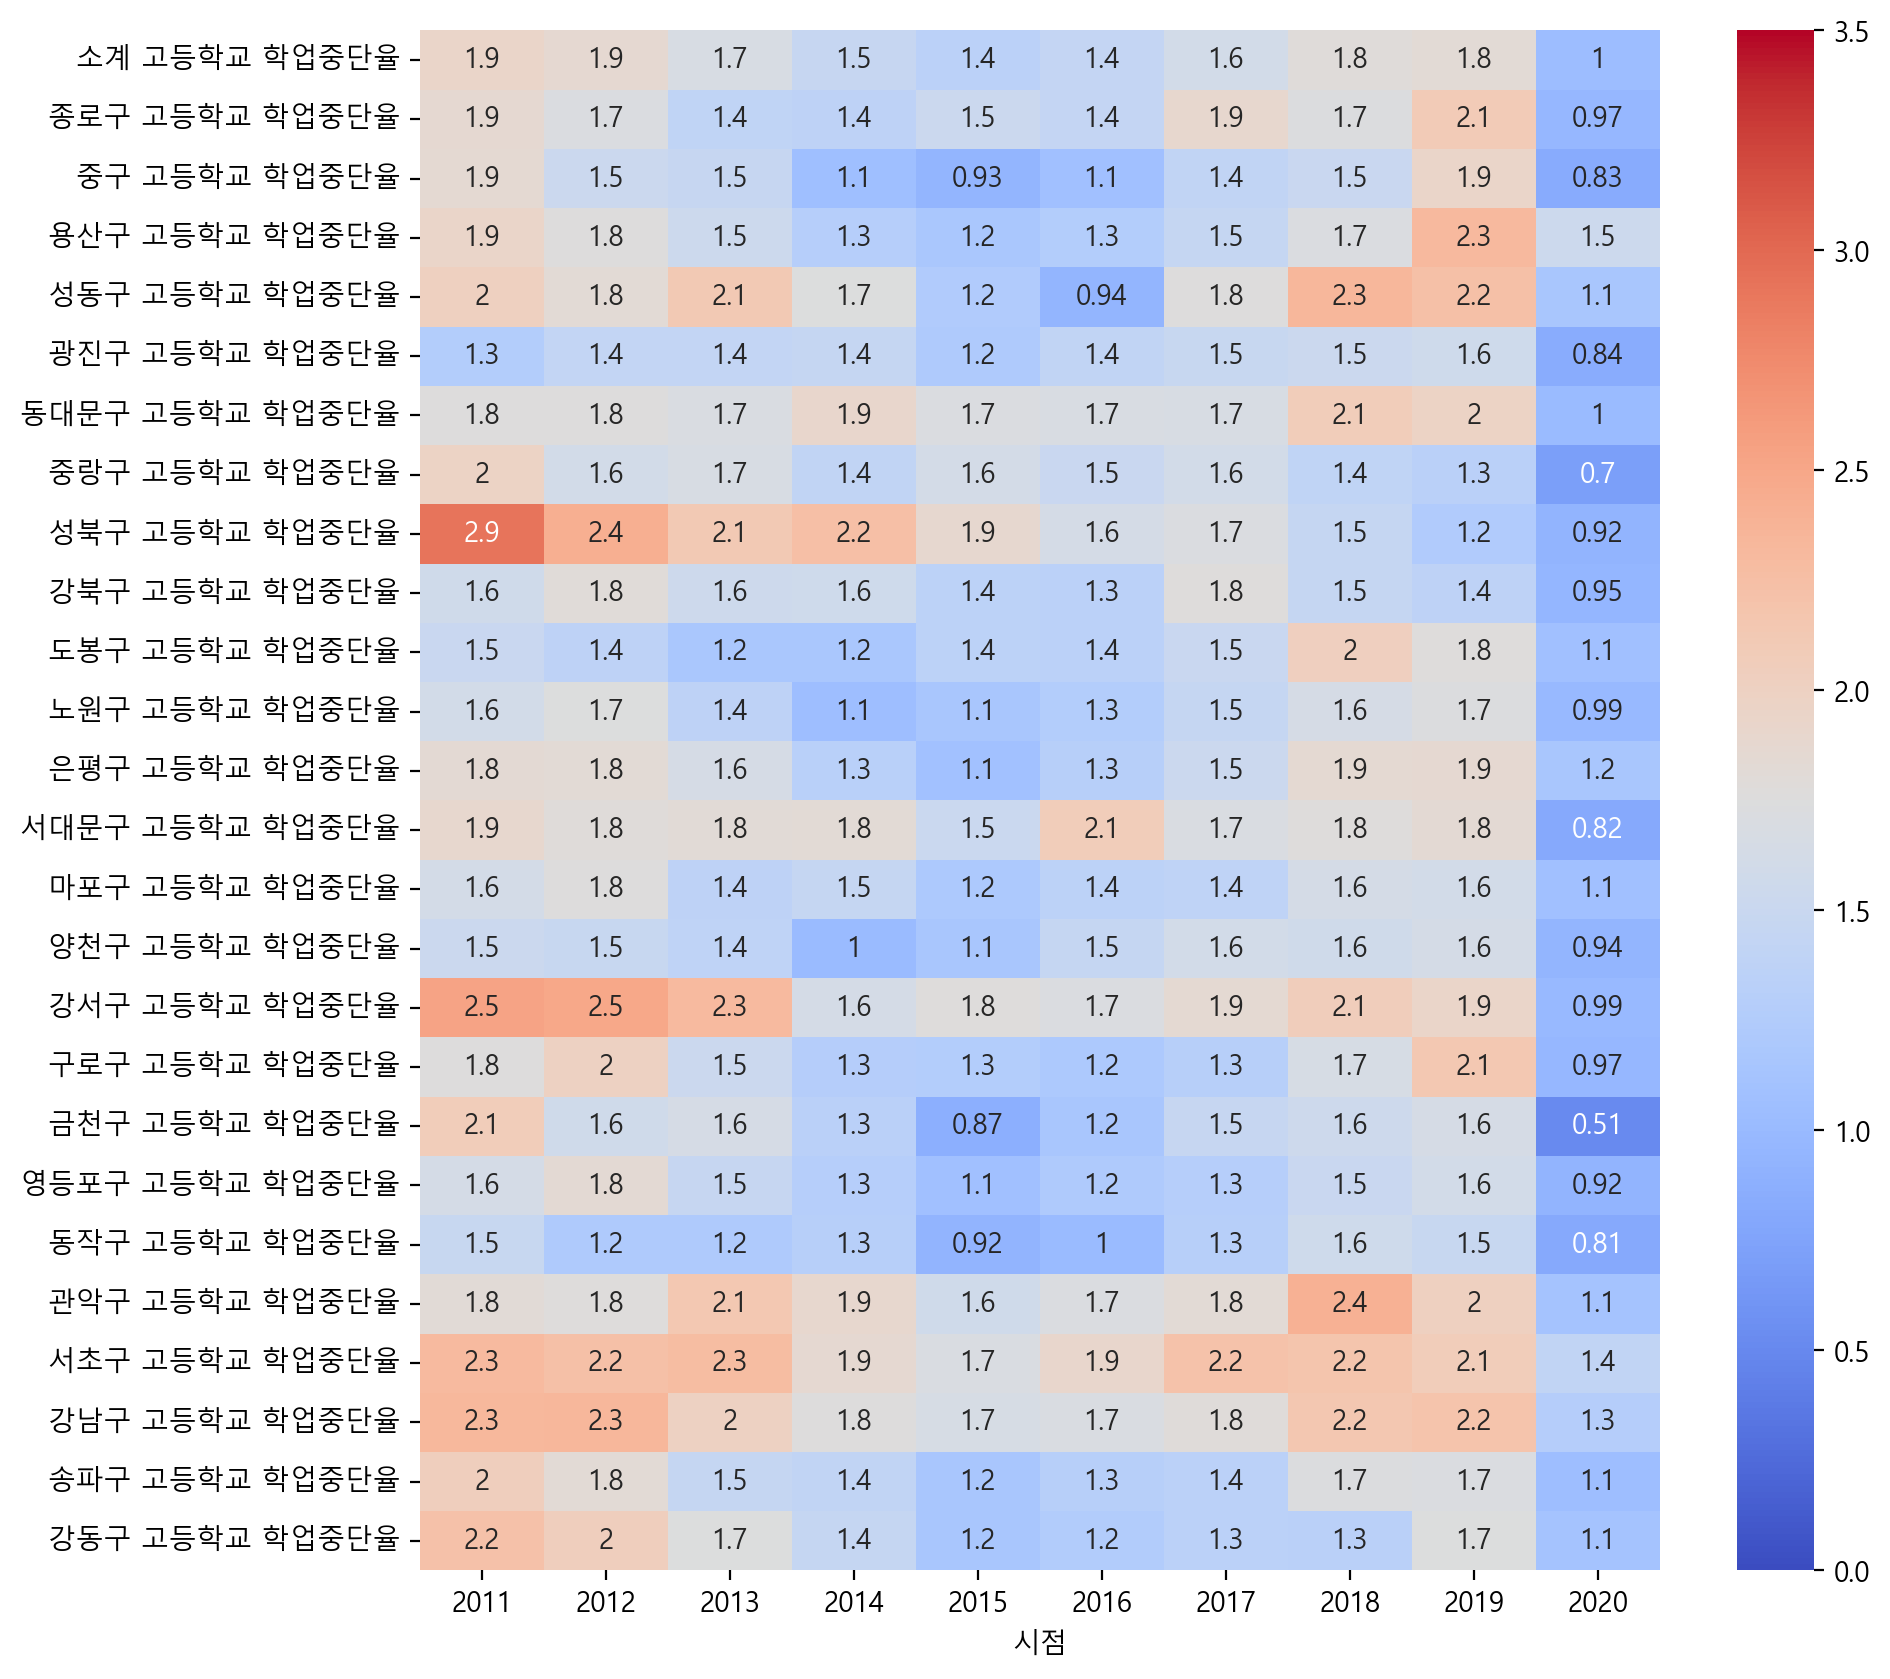

In [240]:
# 서울 구별 고등학교 학업 중단율
plt.figure(figsize=(10, 10))
sns.heatmap(stop_h_school.T, annot=True, cmap="coolwarm", vmin=0, vmax=3.5)

In [241]:
# 19년도 구별 중학교 중단율
# folium을 위한 전처리 테스트
df_temp = stop_m_school.loc[["2019"]].T
df_temp = df_temp.reset_index()
df_temp = df_temp.rename(columns={'index':'name'})
df_temp = df_temp.drop(0)
df_temp["name"] = df_temp["name"].map(lambda x: x.split()[0])

In [242]:
# 지도 중앙
center = [37.566345,126.977893]
# 지도 스타일
tiles = ['cartodbpositron', 'Stamen Toner', 'OpenStreetMap', 'Stamen Terrain']

# 지도 설정
m = folium.Map(
    location=[center[0], center[1]],
    zoom_start = 11,
    tiles = tiles[3]
)

# 구별 위경도 json
geo_url = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'
response = requests.get(geo_url)
geo_json = json.loads(response.content)


folium.GeoJson(geo_json,
              name="지역구").add_to(m)


# 행정구역 경계 표시, 중단율 색칠
m.choropleth(geo_data=geo_json,
                 name="지역구",
                 data=df_temp,
                 columns=["name", '2019'],
                 key_on="properties.name",
                 fill_color='YlGn',
                 fill_opacity=0.7,
                 line_opacity=0.2
                 )


# 출력
m

## 가설 3 : 코로나 이후 온라인 교육으로 인해 학생들의 학습 이해도가 떨어져서 사교육 비중이 증가했다?
- 활용 데이터 : 원격수업 여부․효과성 여부 및 비효율적인 이유 (주된응답, 18세 이하 인구)<br>
https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1SSCV061R&vw_cd=MT_ZTITLE&list_id=B_7_D220&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE

- 추가적으로 해야할 사항
1. 20~21년 학업성취도와 이전 학업성취도와의 비교(20년을 기준점으로 함) => pointplot
2. 기준년도, 물가, 사교육비와 학업성취도, 학업이탈 간의 상관관계 => heatmap
3. 온라인 교육이 학업 성취도에 악영향을 줬다는 확실한 근거 데이터 조사

=> EDA 결과, **성별로 나눠서 분석하는건 의미 없을 것 같다.**

In [243]:
glob("dataset/원격수업*.csv")
# 데이터 로드
raw = pd.read_csv("dataset\\원격수업_여부․효과성_여부_및_비효율적인_이유__주된응답__18세_이하_인구__20221019104353.csv", encoding="cp949")
# 대분류 제거
col = raw.iloc[0,:].str.strip()
raw.columns = col
# 계, 중복행 제거
raw = raw.drop([0,1]).reset_index(drop=True)
# "항목" 칼럼에서 필요없는 문자열 및 좌우 공백 제거
raw["항목"] = raw["항목"].str.replace("[-?]", "", regex=True).str.strip()


# 필요한 칼럼만 행으로 melt
df_online = pd.melt(raw, id_vars=["항목","계"], value_vars=col[6:8], var_name="성별", value_name="비율")
df_online

항목     계  성별    비율
0                              원격수업함  92.0  남자  93.3
1                       원격수업  효과적이었음  39.3  남자  41.9
2                    원격수업  효과적이지 않았음  60.7  남자  58.1
3                   학교의 원격 수업 환경이 미비  20.9  남자  21.8
4                     나의 원격수업 환경이 미비   6.3  남자   6.6
5                      수업내용이나 구성이 미흡  19.0  남자  20.7
6          수업내용이 일률적, 나의 학습능력에 맞지 않음   6.0  남자   6.0
7              실험, 실습, 대면지도 등이 어려우므로  13.4  남자  12.4
8              선생님의 지도 없이 학습하기 어려우므로   9.5  남자  10.3
9   학습 이외의 활동을 하게 되는 등 학습에 집중할수 없으므로  18.2  남자  15.4
10             선생님이나 학우들과의 소통이 어려우므로   6.8  남자   6.8
11                                기타     -  남자     -
12                           원격수업 안함   8.0  남자   6.7
13                             원격수업함  92.0  여자  90.5
14                      원격수업  효과적이었음  39.3  여자  36.5
15                   원격수업  효과적이지 않았음  60.7  여자  63.5
16                  학교의 원격 수업 환경이 미비  20.9  여자  19.9
17                    나의 원격수업 환경이 미비   6.3  여자   6.0
18                     수업내용이나 구성이 미흡  19.0  여자  17.2
19         수업내용이 일률적, 나의 학습능력에 맞지 않음   6.0  여자   5.9
20             실험, 실습, 대면지도 등이 어려우므로  13.4  여자  14.4
21             선생님의 지도 없이 학습하기 어려우므로   9.5  여자   8.7
22  학습 이외의 활동을 하게 되는 등 학습에 집중할수 없으므로  18.2  여자  21.0
23             선생님이나 학우들과의 소통이 어려우므로   6.8  여자   6.8
24                                기타     -  여자     -
25                           원격수업 안함   8.0  여자   9.5

In [244]:
# numeric 형변환
df_online["계"] = pd.to_numeric(df_online["계"], errors="coerce")
df_online["비율"] = pd.to_numeric(df_online["비율"], errors="coerce")

### 온라인 학습 경험 비율
- 2021년 초,중,고등학생 온라인 학습 경험이 92%로 나타남
- 해당 시기의 학업성취도에 영향을 미쳤다고 가정할 수 있음 ?
<br><br>
- df_online_per : df_online에서 가공. 전체 온라인 학습 경험 비율

In [245]:
# 시각화를 위해 필요한 항목만 가져오기
df_online_per = df_online.loc[df_online["항목"].str.contains("원격수업함|원격수업 안함"), ["항목", "계"]]
df_online_per = df_online_per[df_online_per.duplicated()]

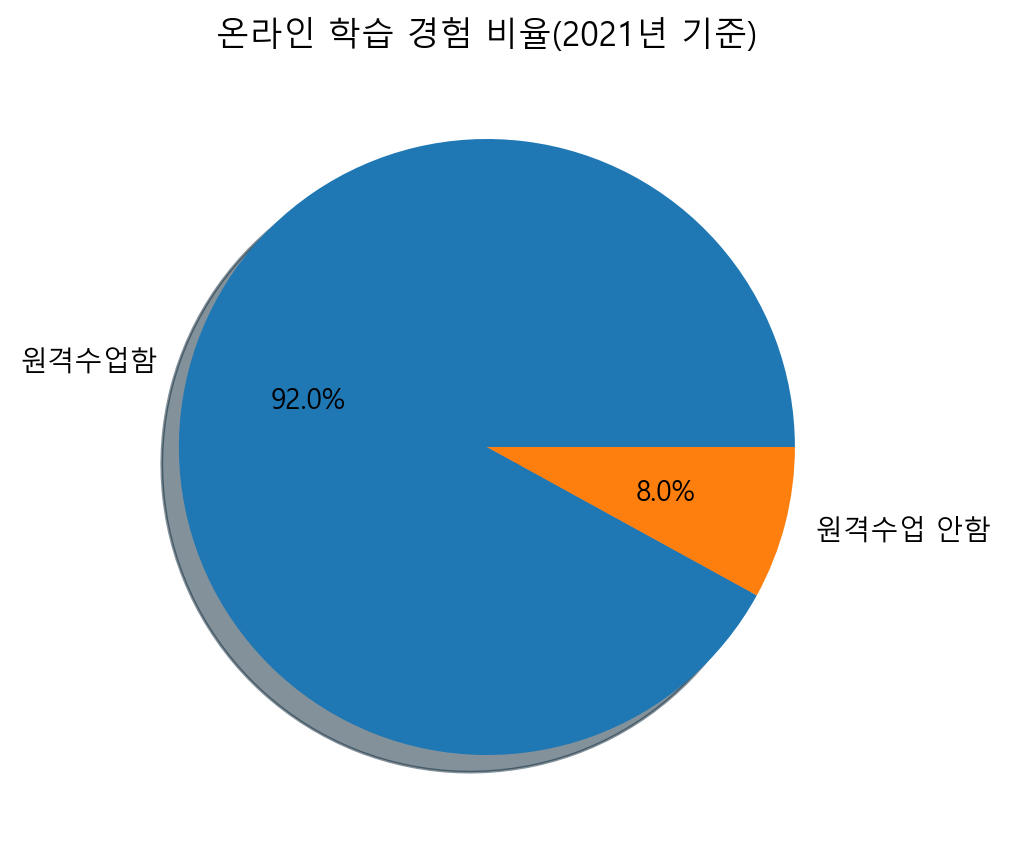

In [246]:
# 파이차트 생성
plt.figure(figsize=(18,5))
plt.pie(df_online_per["계"]
       , labels=df_online_per["항목"]
       , autopct= "%.1f%%"
       , shadow=True)
plt.title("온라인 학습 경험 비율(2021년 기준)")
plt.show()

### 온라인 교육의 효과성 판단 여부(전체, 성별)
- 온라인 교육이 효과적이지 않다고 생각하는 학생이 전체 60.7%
<br><br>
- df_effect : df_online에서 가공함. 성별 원격수업 효과성 판단 여부 항목 및 비율

In [247]:
# 시각화를 위해 필요한 항목만 가져오기
df_effect = df_online[df_online["항목"].str.contains("원격수업  효과적이었음|원격수업  효과적이지 않았음")]
df_effect

항목     계  성별    비율
1      원격수업  효과적이었음  39.3  남자  41.9
2   원격수업  효과적이지 않았음  60.7  남자  58.1
14     원격수업  효과적이었음  39.3  여자  36.5
15  원격수업  효과적이지 않았음  60.7  여자  63.5

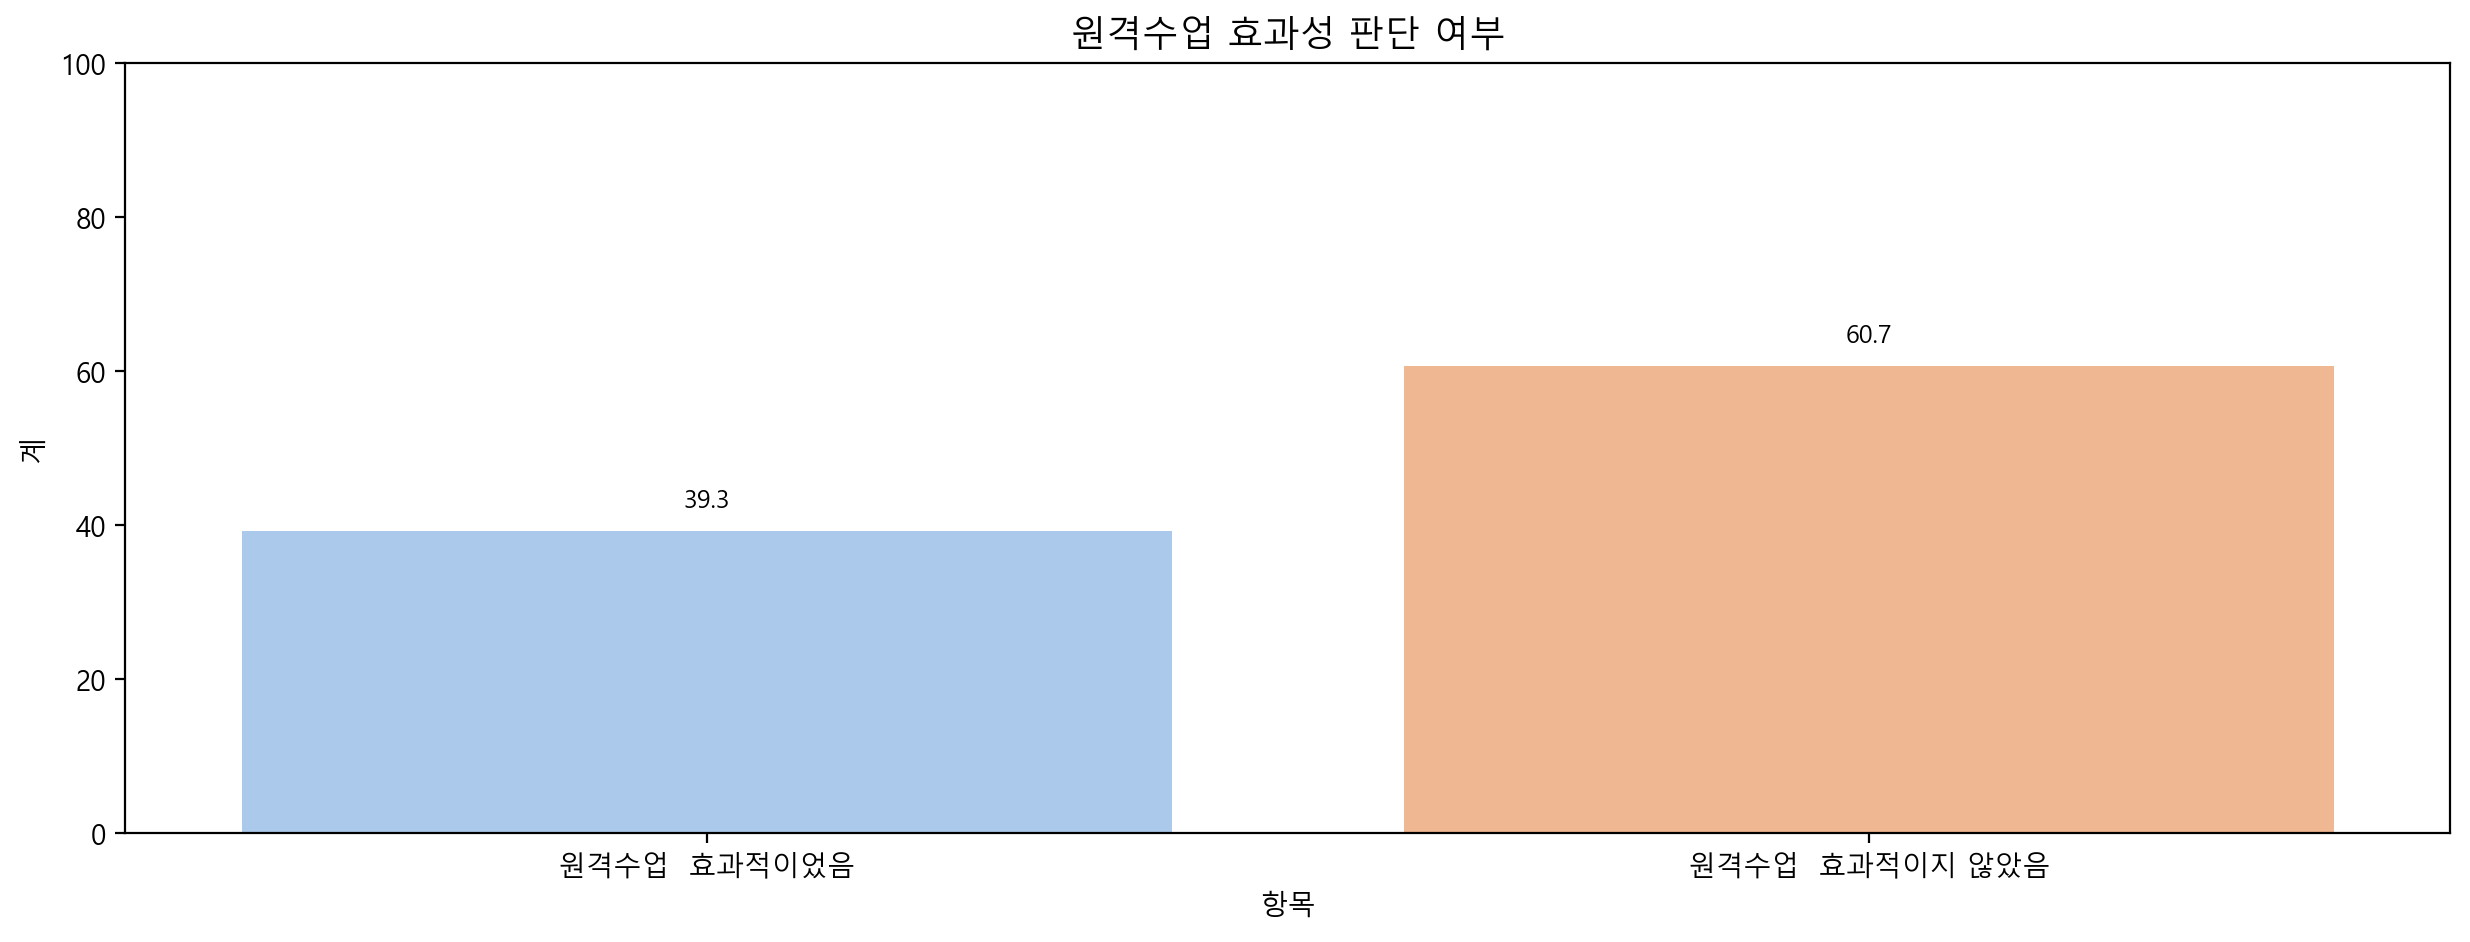

In [248]:
# 원격수업 효과성 판단 여부 시각화
plt.figure(figsize=(15,5))
ef_p_a = sns.barplot(data=df_effect[df_effect[["항목","계"]].duplicated()], x="항목", y="계"
                   , palette = sns.color_palette("pastel"), ci=None)

for p in ef_p_a.patches:
    height = p.get_height()
    ef_p_a.text(p.get_x() + p.get_width() / 2, height + 3, height, ha = 'center', size = 9)

ef_p_a.set_ylim(0, 100)
ef_p_a.set_title("원격수업 효과성 판단 여부", size=13)
plt.show()

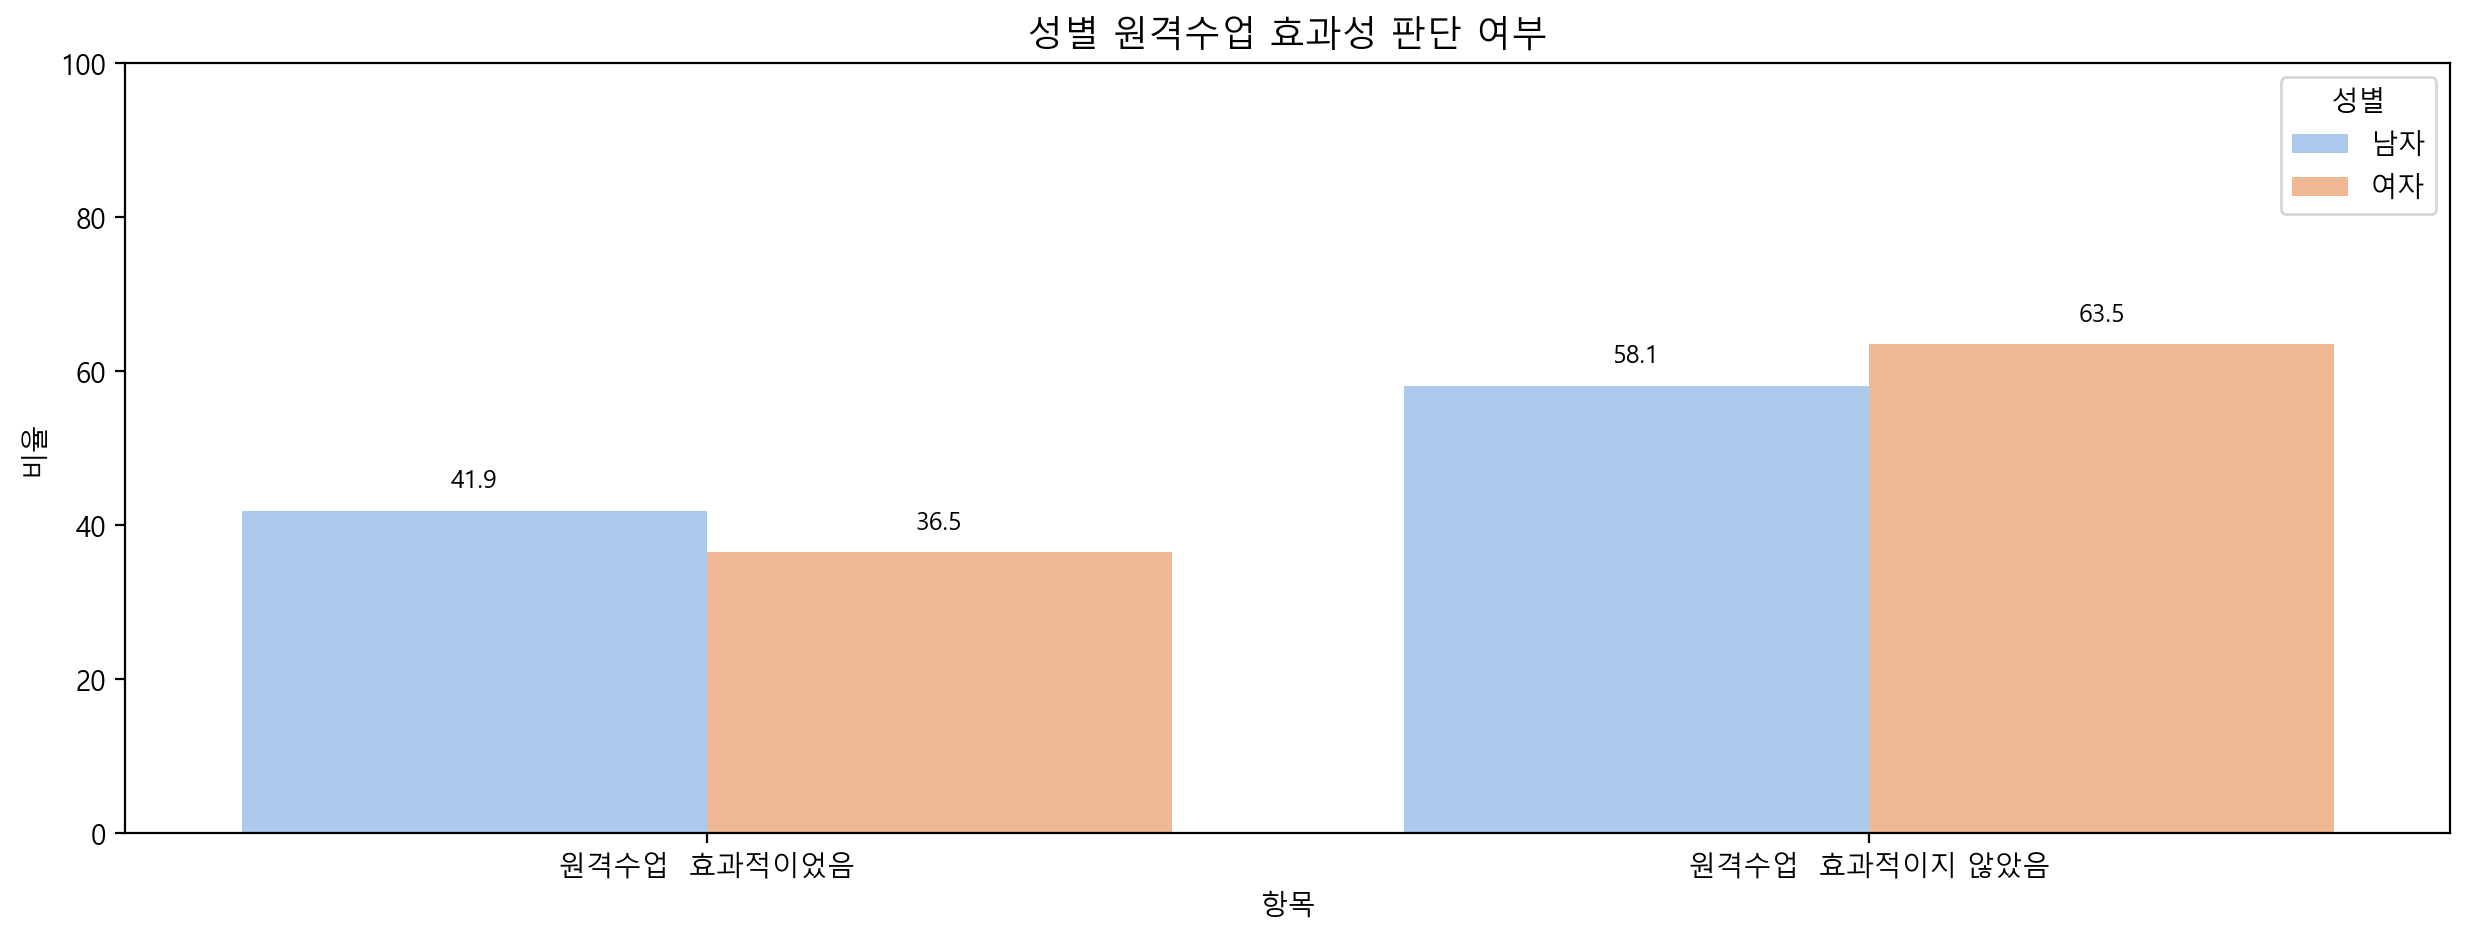

In [249]:
# 성별로 나누어 시각화
plt.figure(figsize=(15,5))
ef_p = sns.barplot(data=df_effect, x="항목", y="비율", hue="성별"
                   , palette = sns.color_palette("pastel"), ci=None)

for p in ef_p.patches:
    height = p.get_height()
    ef_p.text(p.get_x() + p.get_width() / 2, height + 3, height, ha = 'center', size = 9)
ef_p.set_ylim(0, 100)
ef_p.set_title("성별 원격수업 효과성 판단 여부", size=13)
plt.show()

### 원격수업이 비효율적인 이유(전체, 성별)
- 1위 : 학교 온라인 수업 인프라 문제
- 2위 : 수업 자체의 질 문제
- 3위 : 수업에 집중하기 어려움
<br><br>
- df_reason : df_online에서 가공. 원격수업이 효과적이지 않은 이유 항목 및 비율

In [250]:
# 시각화를 위해 필요한 항목만 가져오기
df_reason = df_online[~df_online["항목"].str.contains("원격수업함|원격수업  효과적이었음|원격수업  효과적이지 않았음|기타|원격수업 안함")]
df_reason

항목     계  성별    비율
3                   학교의 원격 수업 환경이 미비  20.9  남자  21.8
4                     나의 원격수업 환경이 미비   6.3  남자   6.6
5                      수업내용이나 구성이 미흡  19.0  남자  20.7
6          수업내용이 일률적, 나의 학습능력에 맞지 않음   6.0  남자   6.0
7              실험, 실습, 대면지도 등이 어려우므로  13.4  남자  12.4
8              선생님의 지도 없이 학습하기 어려우므로   9.5  남자  10.3
9   학습 이외의 활동을 하게 되는 등 학습에 집중할수 없으므로  18.2  남자  15.4
10             선생님이나 학우들과의 소통이 어려우므로   6.8  남자   6.8
16                  학교의 원격 수업 환경이 미비  20.9  여자  19.9
17                    나의 원격수업 환경이 미비   6.3  여자   6.0
18                     수업내용이나 구성이 미흡  19.0  여자  17.2
19         수업내용이 일률적, 나의 학습능력에 맞지 않음   6.0  여자   5.9
20             실험, 실습, 대면지도 등이 어려우므로  13.4  여자  14.4
21             선생님의 지도 없이 학습하기 어려우므로   9.5  여자   8.7
22  학습 이외의 활동을 하게 되는 등 학습에 집중할수 없으므로  18.2  여자  21.0
23             선생님이나 학우들과의 소통이 어려우므로   6.8  여자   6.8

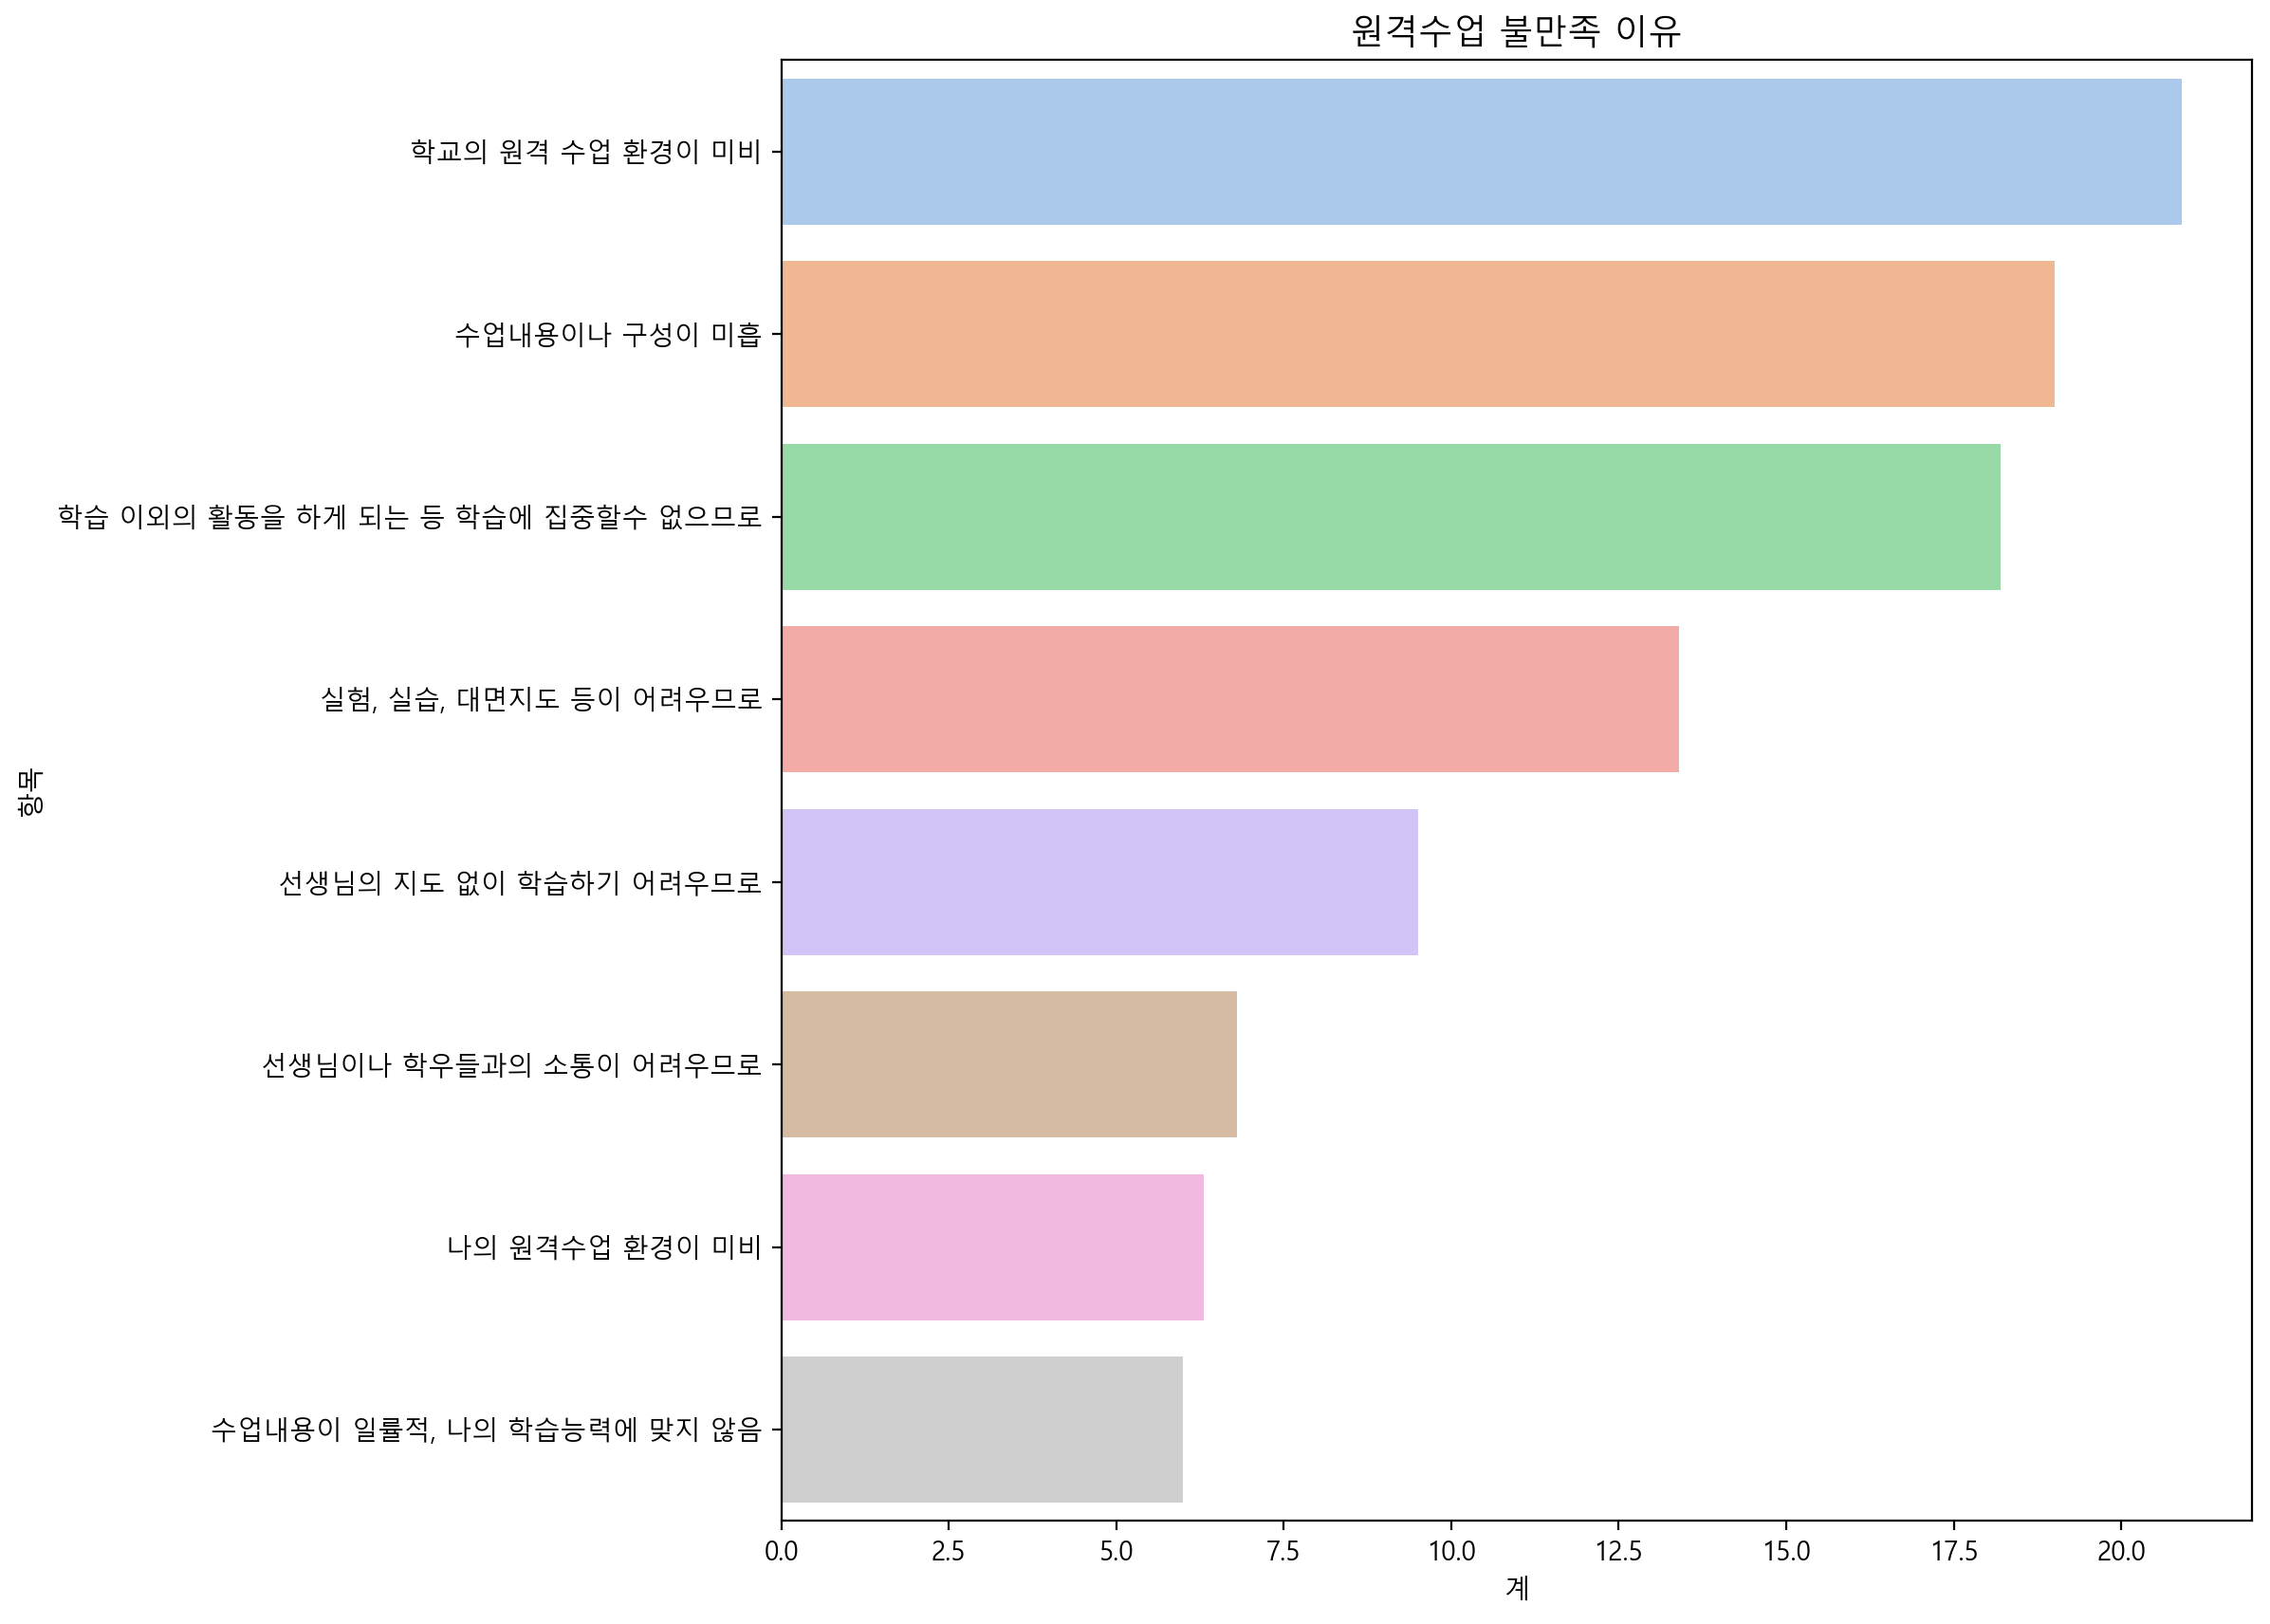

In [251]:
# 온라인 수업 불만족 이유 시각화
plt.figure(figsize=(10,10))
rs_p_a = sns.barplot(data=df_reason.sort_values(by="계",ascending=False), y="항목", x="계"
                   , palette = sns.color_palette("pastel"), ci=None)

rs_p_a.set_title("원격수업 불만족 이유", size=13)
plt.show()

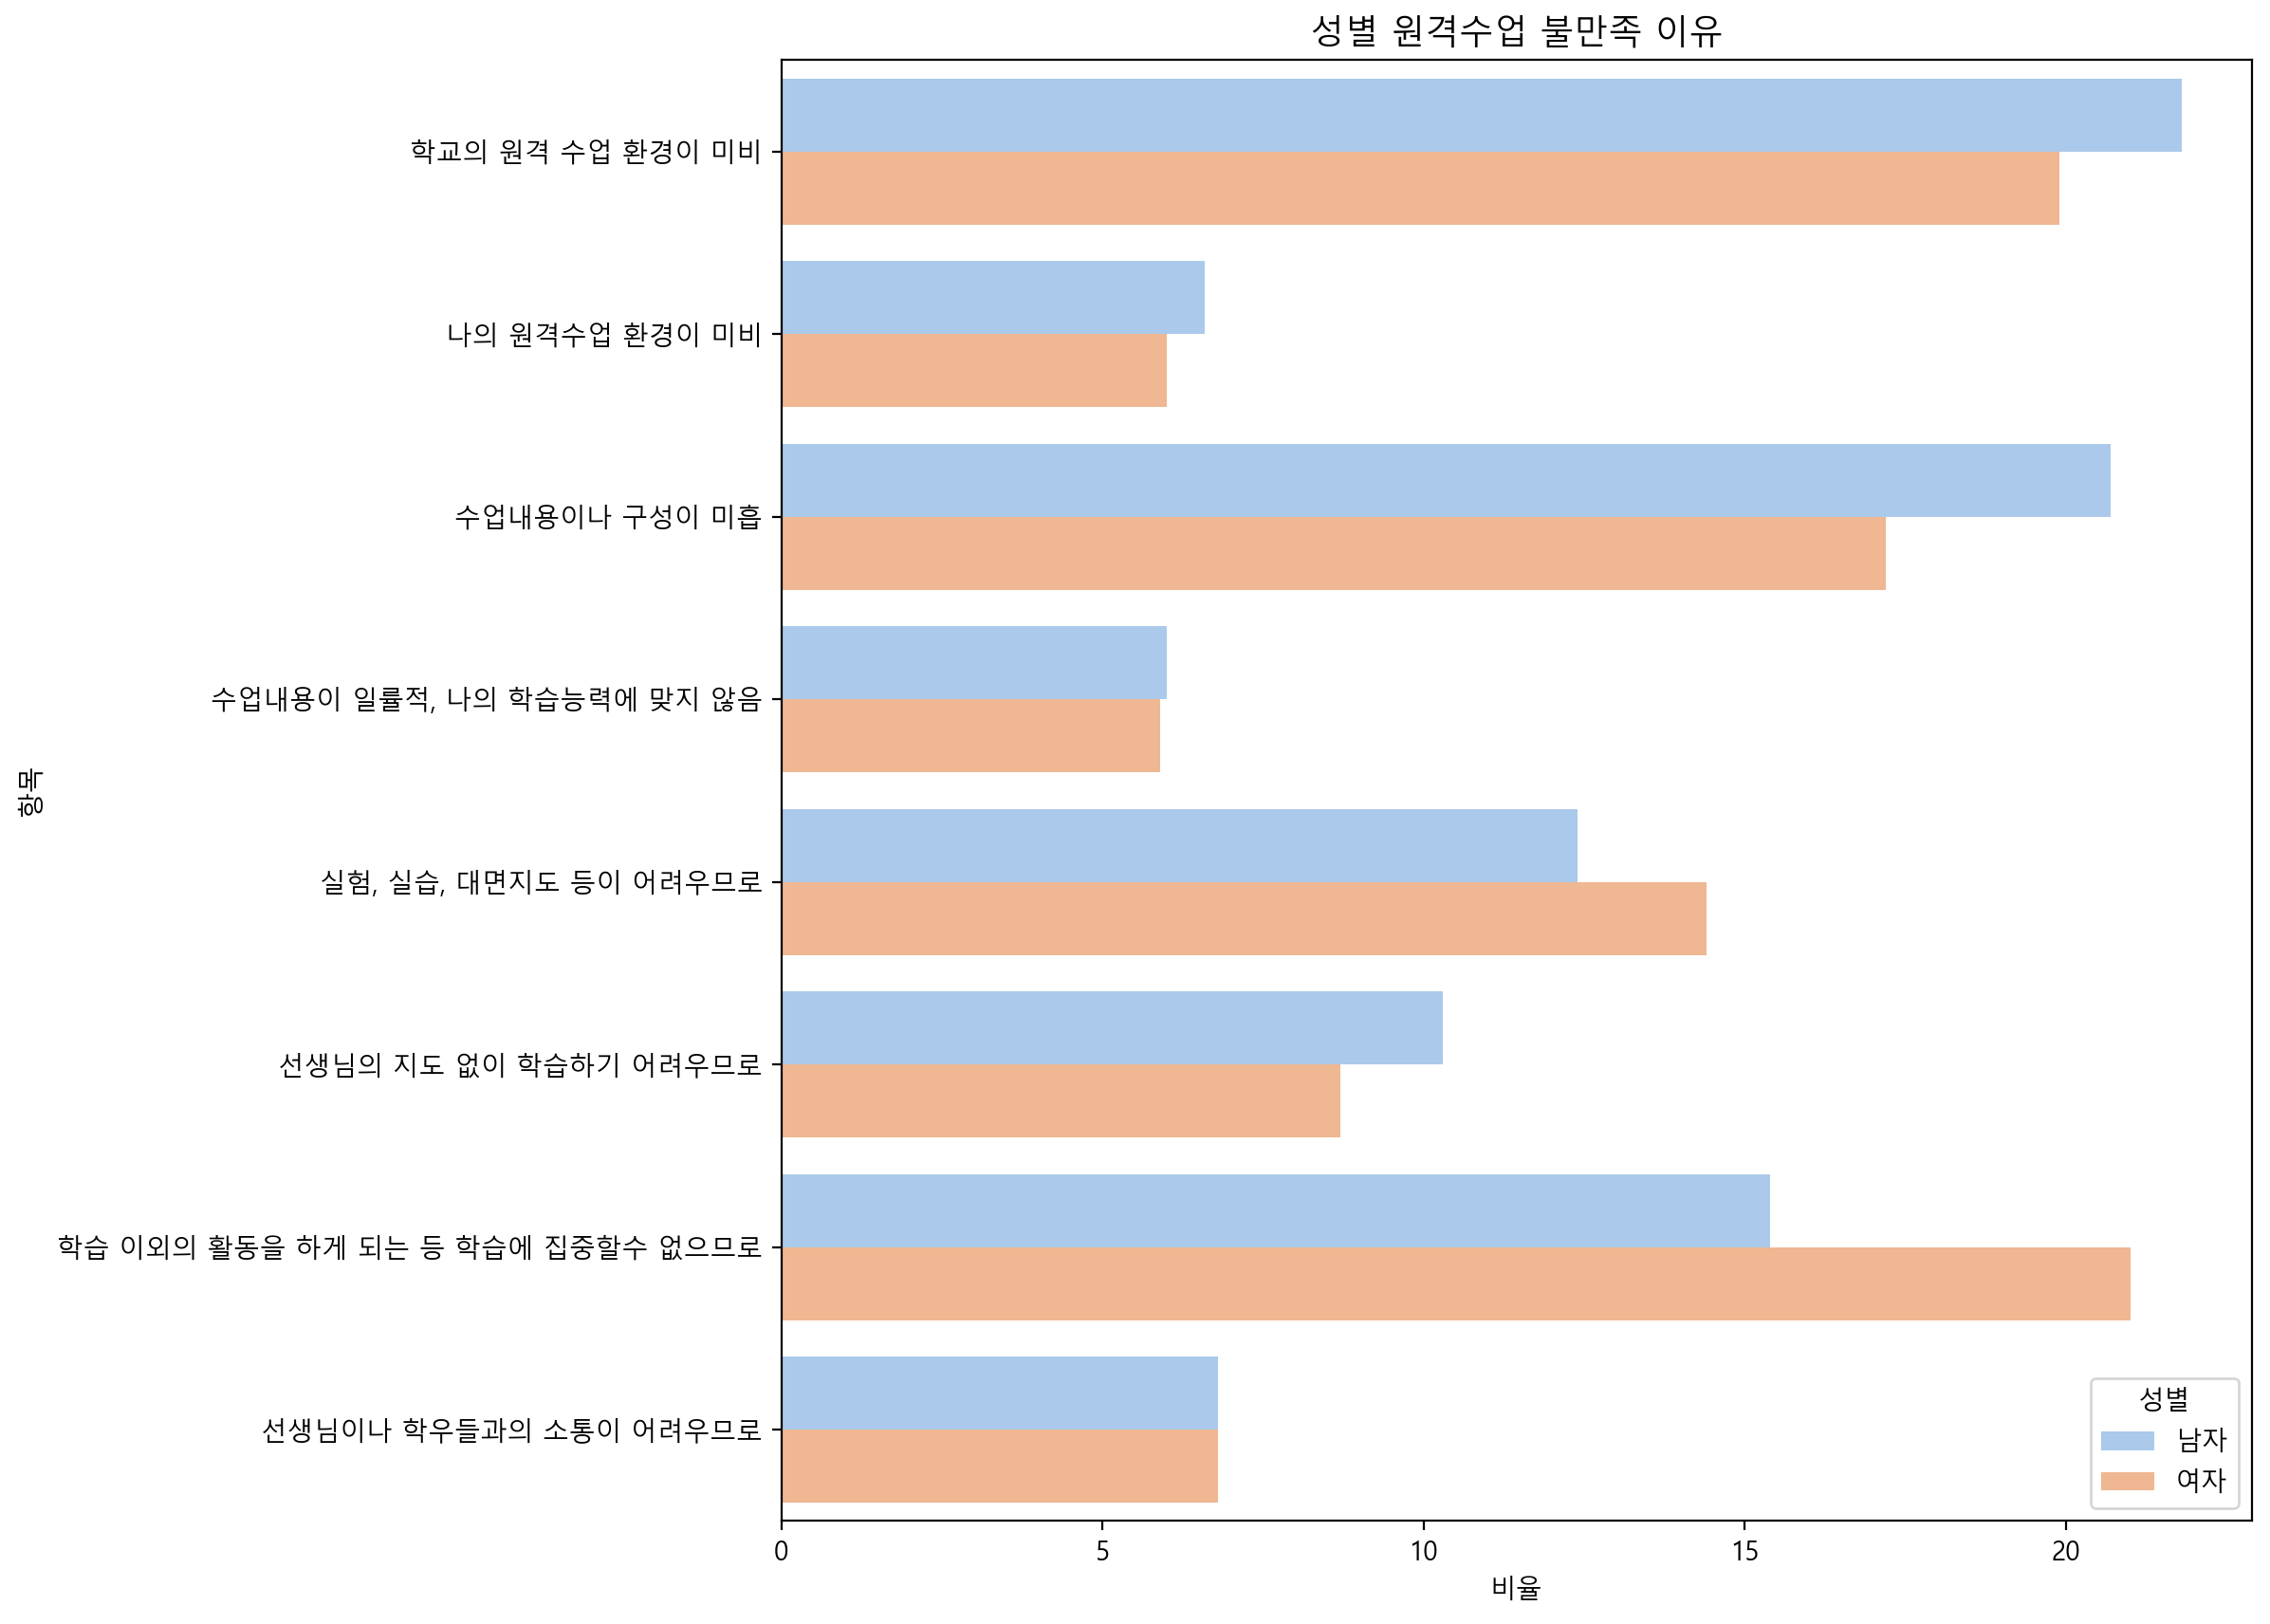

In [252]:
# 성별로 나누어 시각화
plt.figure(figsize=(10,10))
rs_p = sns.barplot(data=df_reason, y="항목", x="비율", hue="성별"
                   , palette = sns.color_palette("pastel"), ci=None)

rs_p.set_title("성별 원격수업 불만족 이유", size=13)
plt.show()

###  연도별 사교육비 총액 & 학원 및 보습교육 물가지수 변동 시각화

- df_region_school_year_sum : 가설1번의 데이터셋. 지역 - 학교급에 따른 연간 사교육비 총액
- df_region_sum : 가설1번의 데이터셋. 지역별 사교육비 총액
- df_private : 전국 사교육비 총액
- df_cpi : 연도별 학원 및 보습교육 항목의 소비자물가지수

In [253]:
df_region_school_year_sum = pd.read_csv('dataset\\학교급별_사교육비_총액_20221019112918.csv', encoding='cp949')
df_cpi = pd.read_csv('dataset\\소비자물가지수_20110545.csv', encoding='utf-8')

In [254]:
# 로우 데이터 처리
# 연도를 행으로 melt, 항목에서 필요없는 문자 제거, 총액,연도 칼럼 numeric 변경
df_region_school_year_sum  = pd.melt(df_region_school_year_sum , id_vars = ['항목','특성별'], var_name='연도',value_name='총액')
df_region_school_year_sum['항목'] = df_region_school_year_sum['항목'].str.replace(' \(\억\원\)','',regex=True)
df_region_school_year_sum["총액"] = pd.to_numeric(df_region_school_year_sum["총액"], errors="coerce")

# 특성별 컬럼은 지역과 과목이 함께 들어가있어서 지역만 분리
city = ['서울','광역시','중소도시','읍면지역']
df_region_sum = df_region_school_year_sum[df_region_school_year_sum['특성별'].isin(city)]

# 지역합 = 전국통계로 가정하고 groupby
df_private = df_region_sum.groupby("연도").sum().reset_index()

# merge를 위해 df_cpi를 df_private와 같은 형태로 변환
df_cpi = df_cpi.drop(0)
df_cpi.columns = ["연도", "지수", "전년대비증감", "전년대비증감률"]
df_cpi["연도"] = df_cpi["연도"].astype(str)

# 사교육비 총액 + 학원 및 보습교육 항목의 소비자물가지수
df_private_cpi = df_private.merge(df_cpi)

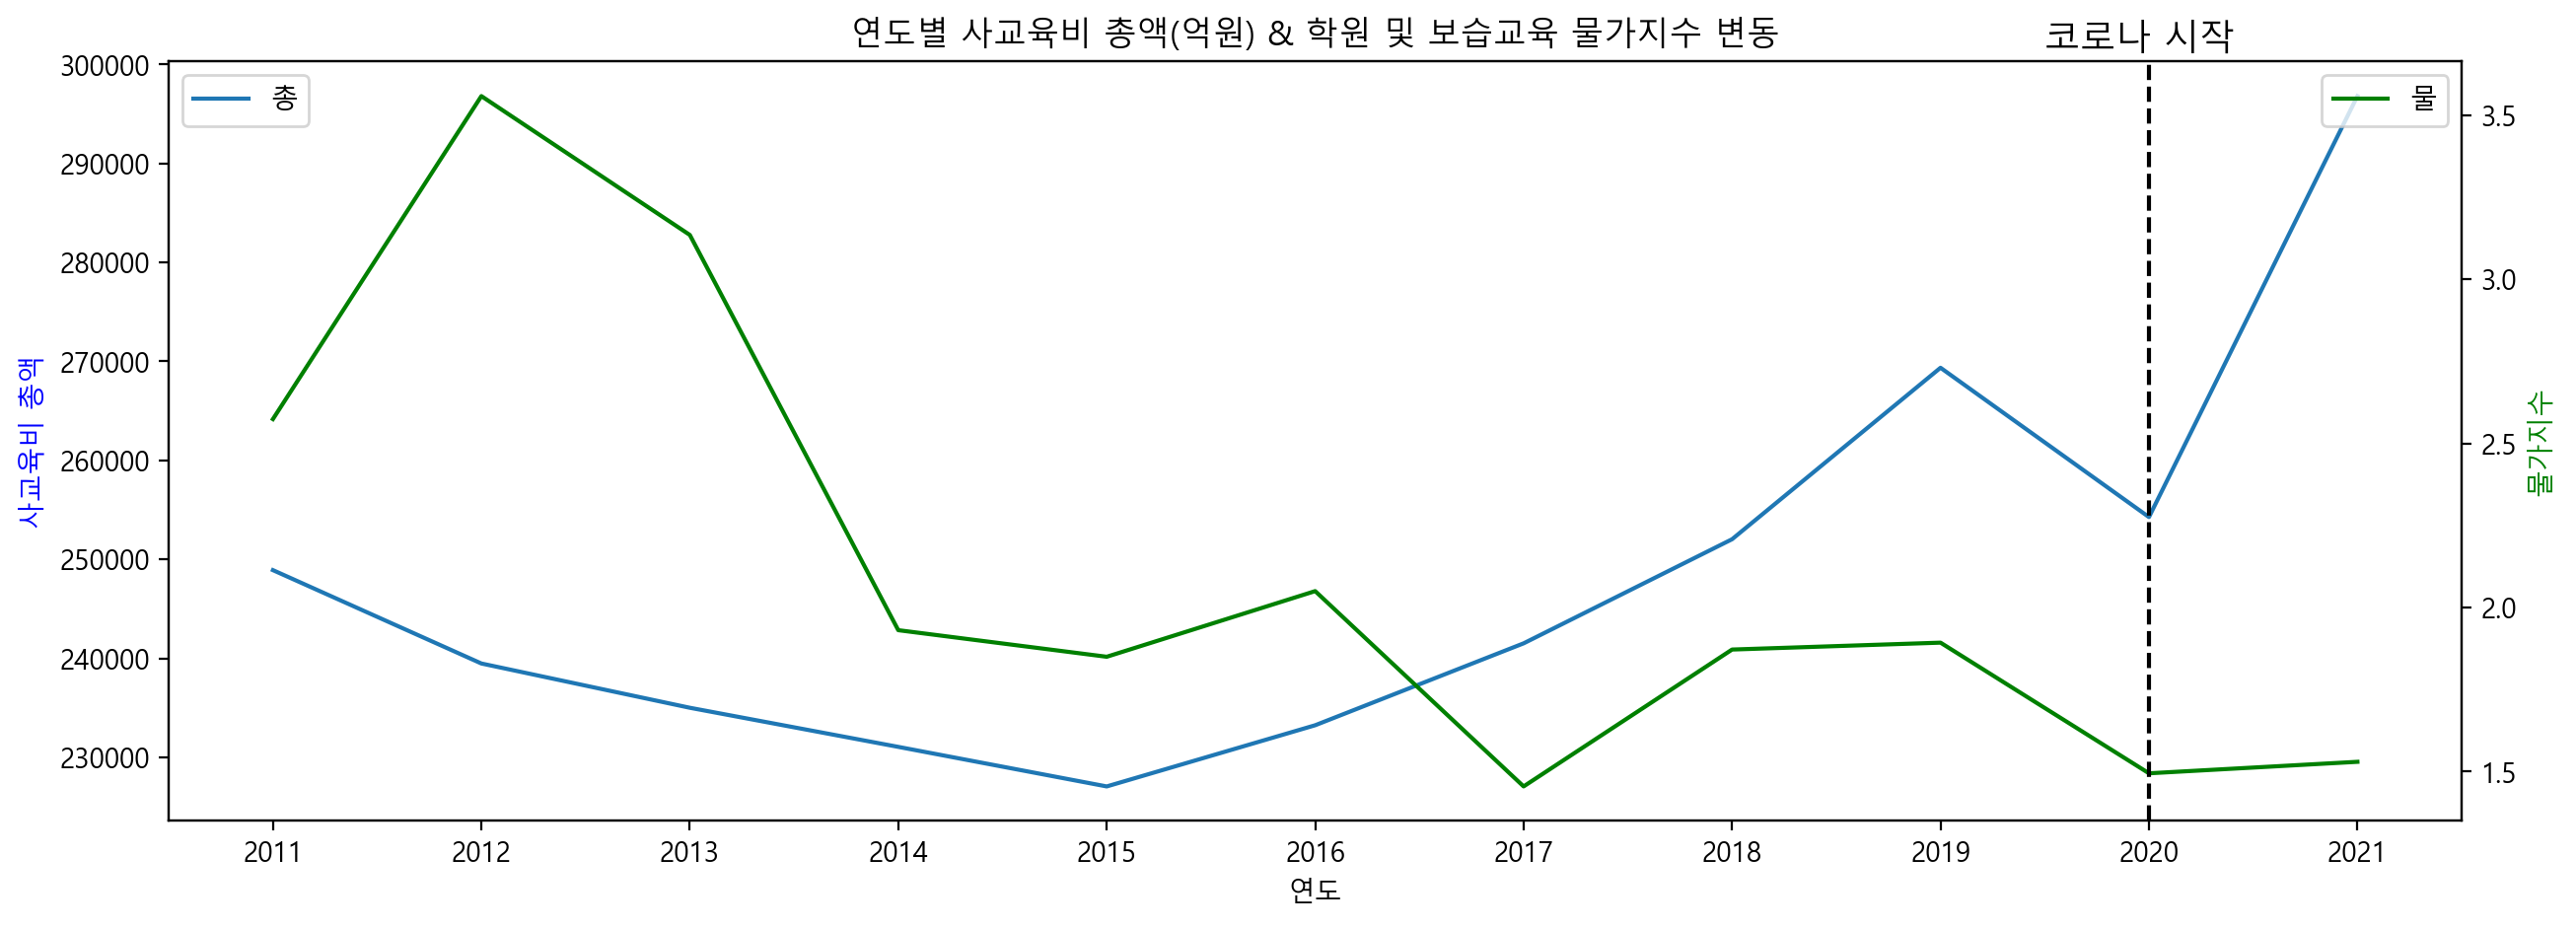

In [255]:
# 시각화
plt.figure(figsize=(15,5))

pr_p = sns.lineplot(data=df_private_cpi, x="연도", y="총액", palette="Blue", legend=False)

pr_c = pr_p.twinx()
pr_c = sns.lineplot(data=df_private_cpi, x="연도", y="전년대비증감", color="green", legend=False)

pr_p.set_ylabel("사교육비 총액", color="Blue")
pr_c.set_ylabel("물가지수", color="Green")

pr_p.legend("총")
pr_c.legend("물")

plt.axvline(9, color="black", linestyle="--")
plt.text(8.5, 3.7, "코로나 시작", size=13)
plt.title("연도별 사교육비 총액(억원) & 학원 및 보습교육 물가지수 변동")
plt.show()

### 학업 중단 데이터
#### 데이터 처리
- stop_school : 전국 학업중단율 데이터(11년~21년)
- stop_school_total : 초중고별 학업중단율 계
- df_pcs : 사교육비 총액, 물가지수, 중단율 데이터

In [256]:
stop_school = pd.read_excel("./dataset/seoul_stop_school.xlsx")
# 21년 데이터는 따로 가져옴
stop_school_2 = pd.read_excel("dataset/2021_학업중단률 및 중단 사유.xlsx")
# 21년 데이터를 11~20년 데이터와 합치기 위해 전처리
stop_school_2 = stop_school_2[(stop_school_2["시도"] == "전국")]
stop_school_2 = stop_school_2.loc[stop_school_2["학제"].str.contains("초등학교|중학교|고등학교|소계"), "학업중단자 계"].reset_index(drop=True)
stop_school_2 = list(stop_school_2)
stop_school_2.insert(0, "2021")
stop_school_2

['2021', 11612.0, 5976.0, 14439.0, 32027.0]

In [257]:
# 필요 없는 행 삭제
stop_school = stop_school.drop([0, 1, 2])
stop_school = stop_school.reset_index(drop=True)

In [258]:
# 연도를 인덱스로, 나머지 칼럼 float형 지정
stop_school = stop_school.set_index("시점")
stop_school = stop_school.astype("float")
# 학업 중단자수 소계만 추출
stop_school_total = stop_school.loc[:,stop_school.columns.str.contains("소계 초등학교 학업중단자수|소계 중학교 학업중단자수|소계 고등학교 학업중단자수")]
stop_school_total["학업중단자수"] = stop_school_total["소계 초등학교 학업중단자수"] + stop_school_total["소계 중학교 학업중단자수"] + stop_school_total["소계 고등학교 학업중단자수"]
stop_school_total = stop_school_total.reset_index()
stop_school_total.columns = ["연도", "학업중단자수(초)", "학업중단자수(중)", "학업중단자수(고)", "학업중단자수(합)"]

# 21년도 데이터 합치기
stop_school_total.loc[10] = stop_school_2

#### 사교육비 총액 + 학원 및 보습교육 항목의 소비자물가지수 + 학업중단자수

In [259]:
# 사교육비 데이터와 merge
df_pcs = df_private_cpi.merge(stop_school_total, on="연도")
df_pcs

연도        총액       지수  전년대비증감  전년대비증감률  학업중단자수(초)  학업중단자수(중)  학업중단자수(고)  \
0   2011  248908.0   80.761   2.574      3.3     6425.0     4653.0     6846.0   
1   2012  239477.0   84.319   3.558      4.4     5671.0     4028.0     6427.0   
2   2013  235005.0   87.454   3.135      3.7     4948.0     3561.0     5625.0   
3   2014  231054.0   89.385   1.931      2.2     4696.0     2981.0     4707.0   
4   2015  227058.0   91.235   1.850      2.1     4437.0     2532.0     4175.0   
5   2016  233238.0   93.285   2.050      2.2     4412.0     2228.0     4310.0   
6   2017  241513.0   94.740   1.455      1.6     4686.0     2329.0     4531.0   
7   2018  252031.0   96.612   1.872      2.0     4792.0     2423.0     4622.0   
8   2019  269353.0   98.505   1.893      2.0     5154.0     2414.0     4318.0   
9   2020  254267.0  100.000   1.495      1.5     2700.0     1397.0     2321.0   
10  2021  296796.0  101.530   1.530      1.5    11612.0     5976.0    14439.0   

    학업중단자수(합)  
0     17924.0  
1     16126.0  
2     14134.0  
3     12384.0  
4     11144.0  
5     10950.0  
6     11546.0  
7     11837.0  
8     11886.0  
9      6418.0  
10    32027.0

#### 학업성취도 데이터
- df_num_student : 연도별 학생수 데이터
- nation_mid, nation_high : 학년별 교과별 학업성취 비율(3수준일수록 학업성취 높음)
  - 전국 중3, 고2 전체를 대상으로 시행
- 학년별 학생 수 데이터는 찾지 못했기 때문에 한 개 학년을 뽑아낼 때 러프하게 1/3으로 나누어 처리(e.g. 총 중학생 수 / 3)
  - 학업성취 비율과 곱해 중3, 고2 실제 수를 추정

In [260]:
nation_mid = pd.read_excel("dataset/kr_test.xls", sheet_name="중등")
nation_high = pd.read_excel("./dataset/kr_test.xls", sheet_name="고등")
df_num_student = pd.read_excel("dataset/연도별 학생수.xlsx")

# 2011년~21년의 전국 중학생, 고등학생 수만 뽑아오기
df_num_student = df_num_student[df_num_student["연도"].isin([str(i) for i in range(2011, 2022)])].set_index("연도")
df_num_student = df_num_student.loc[df_num_student["시도"] == "전국", ["중학교", "고등학교"]]

# 연산처리를 위해 int형으로 변경 후 러프하게 1/3 곱한 뒤 반올림
# 중학교 한 개 학년(중3), 고등학교 한 개 학년(고2)에서 처리해야 하기 때문에
df_num_student = df_num_student.loc[:, ["중학교", "고등학교"]].astype(int)
df_num_student = df_num_student.div(3).round().reset_index()

# 연산 처리를 위해 중고등학교 학업성취도와 학생 수 merge
df_num_student["연도"] = pd.to_numeric(df_num_student["연도"])
df_agg = nation_mid.merge(nation_high, on=["연도", "과목"])
df_agg = df_agg.merge(df_num_student, on="연도")

# 비율과 위에서 처리한 한 개 학년 학생 수를 곱해 실제 학생 수 추정(중학교)
df_agg["3수준학생수(중)"] = df_agg["3수준_x"] / 100 * df_agg["중학교"]
df_agg["3수준학생수(중)"] = df_agg["3수준학생수(중)"].round()
df_agg["2수준학생수(중)"] = df_agg["2수준_x"] / 100 * df_agg["중학교"]
df_agg["2수준학생수(중)"] = df_agg["2수준학생수(중)"].round()
df_agg["1수준학생수(중)"] = df_agg["1수준_x"] / 100 * df_agg["중학교"]
df_agg["1수준학생수(중)"] = df_agg["1수준학생수(중)"].round()

# 비율과 위에서 처리한 한 개 학년 학생 수를 곱해 실제 학생 수 추정(고등학교)
df_agg["3수준학생수(고)"] = df_agg["3수준_y"] / 100 * df_agg["고등학교"]
df_agg["3수준학생수(고)"] = df_agg["3수준학생수(고)"].round()
df_agg["2수준학생수(고)"] = df_agg["2수준_y"] / 100 * df_agg["고등학교"]
df_agg["2수준학생수(고)"] = df_agg["2수준학생수(고)"].round()
df_agg["1수준학생수(고)"] = df_agg["1수준_y"] / 100 * df_agg["고등학교"]
df_agg["1수준학생수(고)"] = df_agg["1수준학생수(고)"].round()

# 필요한 컬럼만 추출
df_agg = df_agg.drop(df_agg.columns[2:10], axis=1)

#### 연도별, 과목별 중, 고등학생 학업성취도 시각화

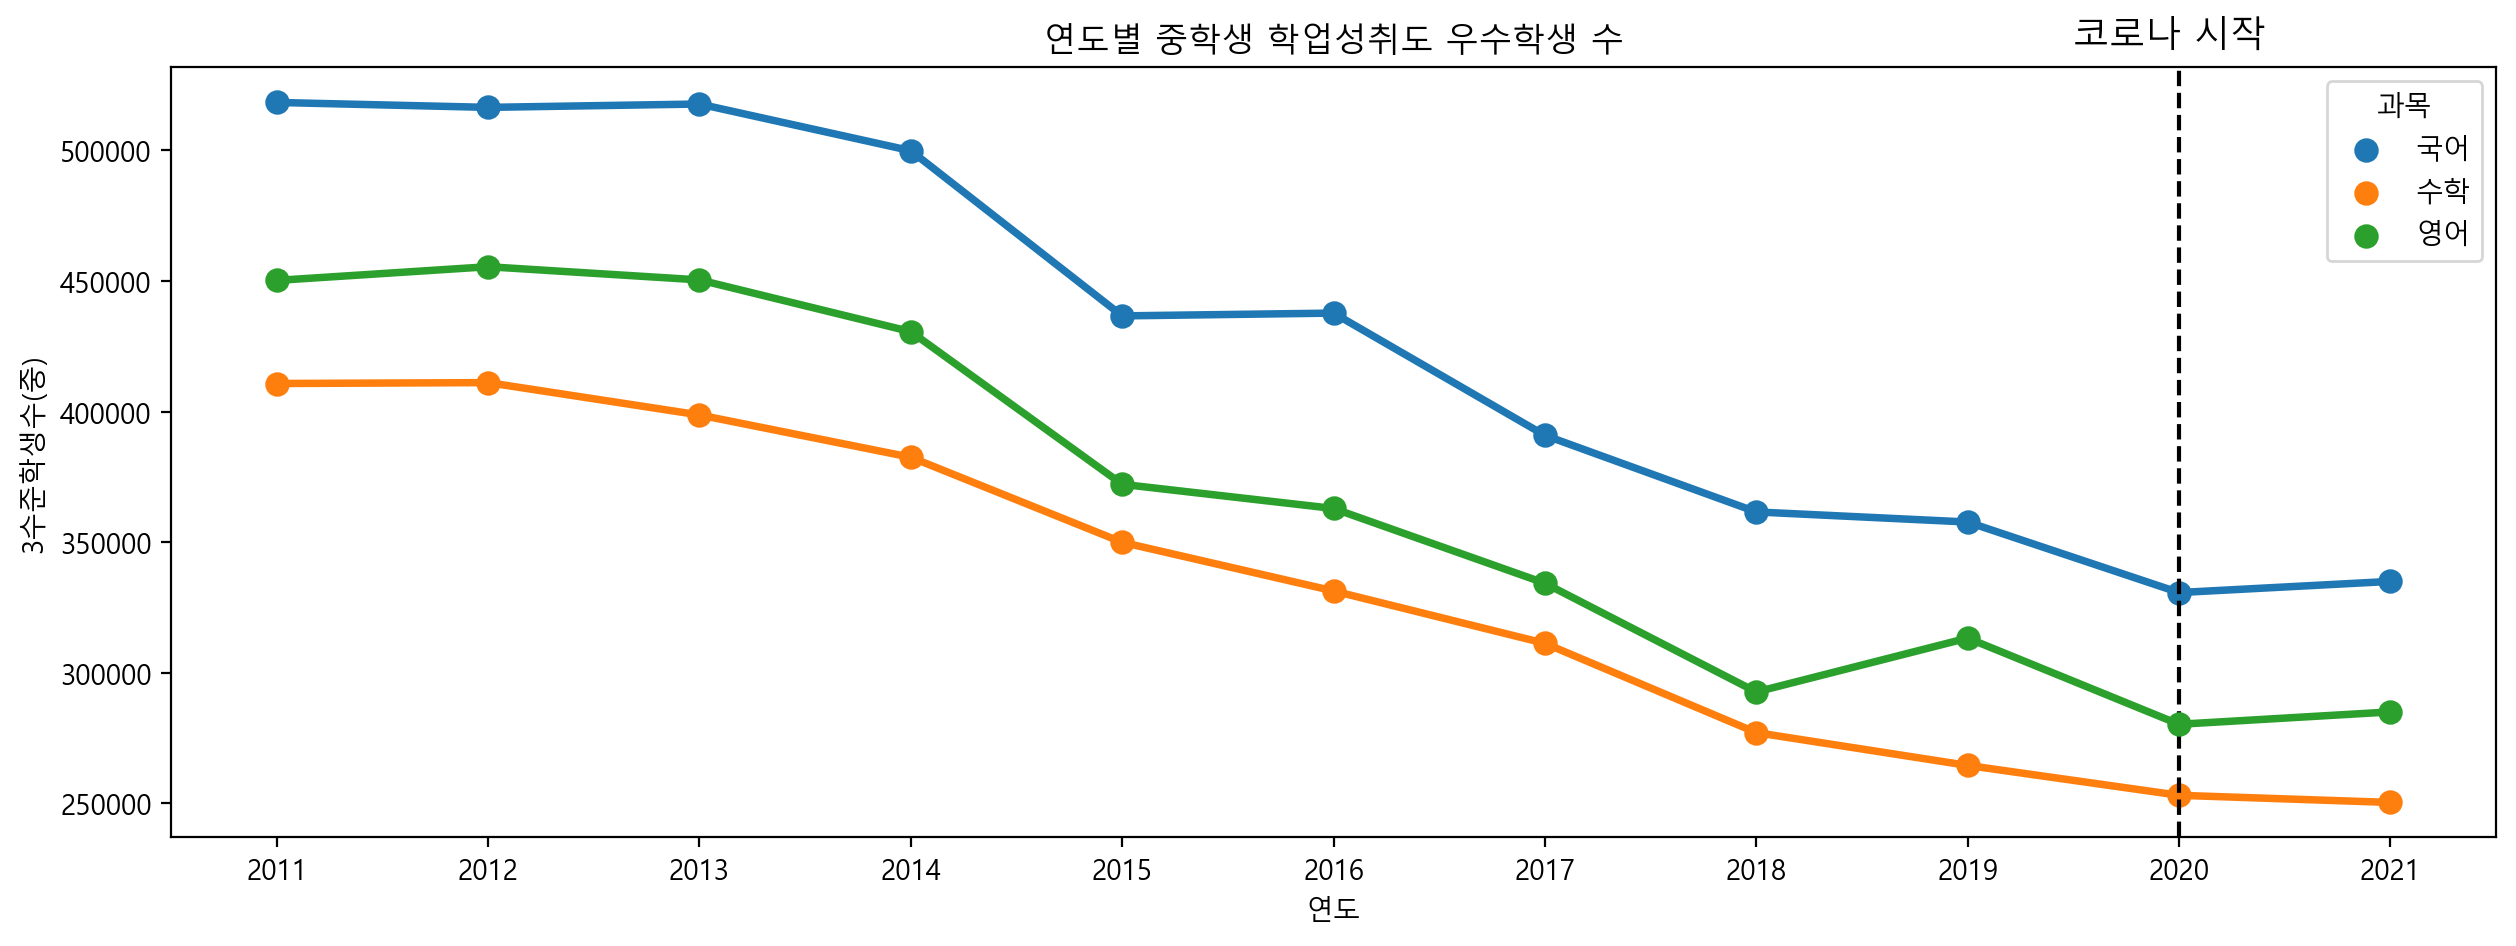

In [261]:
plt.figure(figsize=(15,5))
sns.pointplot(data=df_agg, x="연도", y="3수준학생수(중)", hue="과목")
plt.title("연도별 중학생 학업성취도 우수학생 수")
plt.axvline(9, color="black", linestyle="--")
plt.text(8.5, 540000, "코로나 시작", size=13)
plt.show()

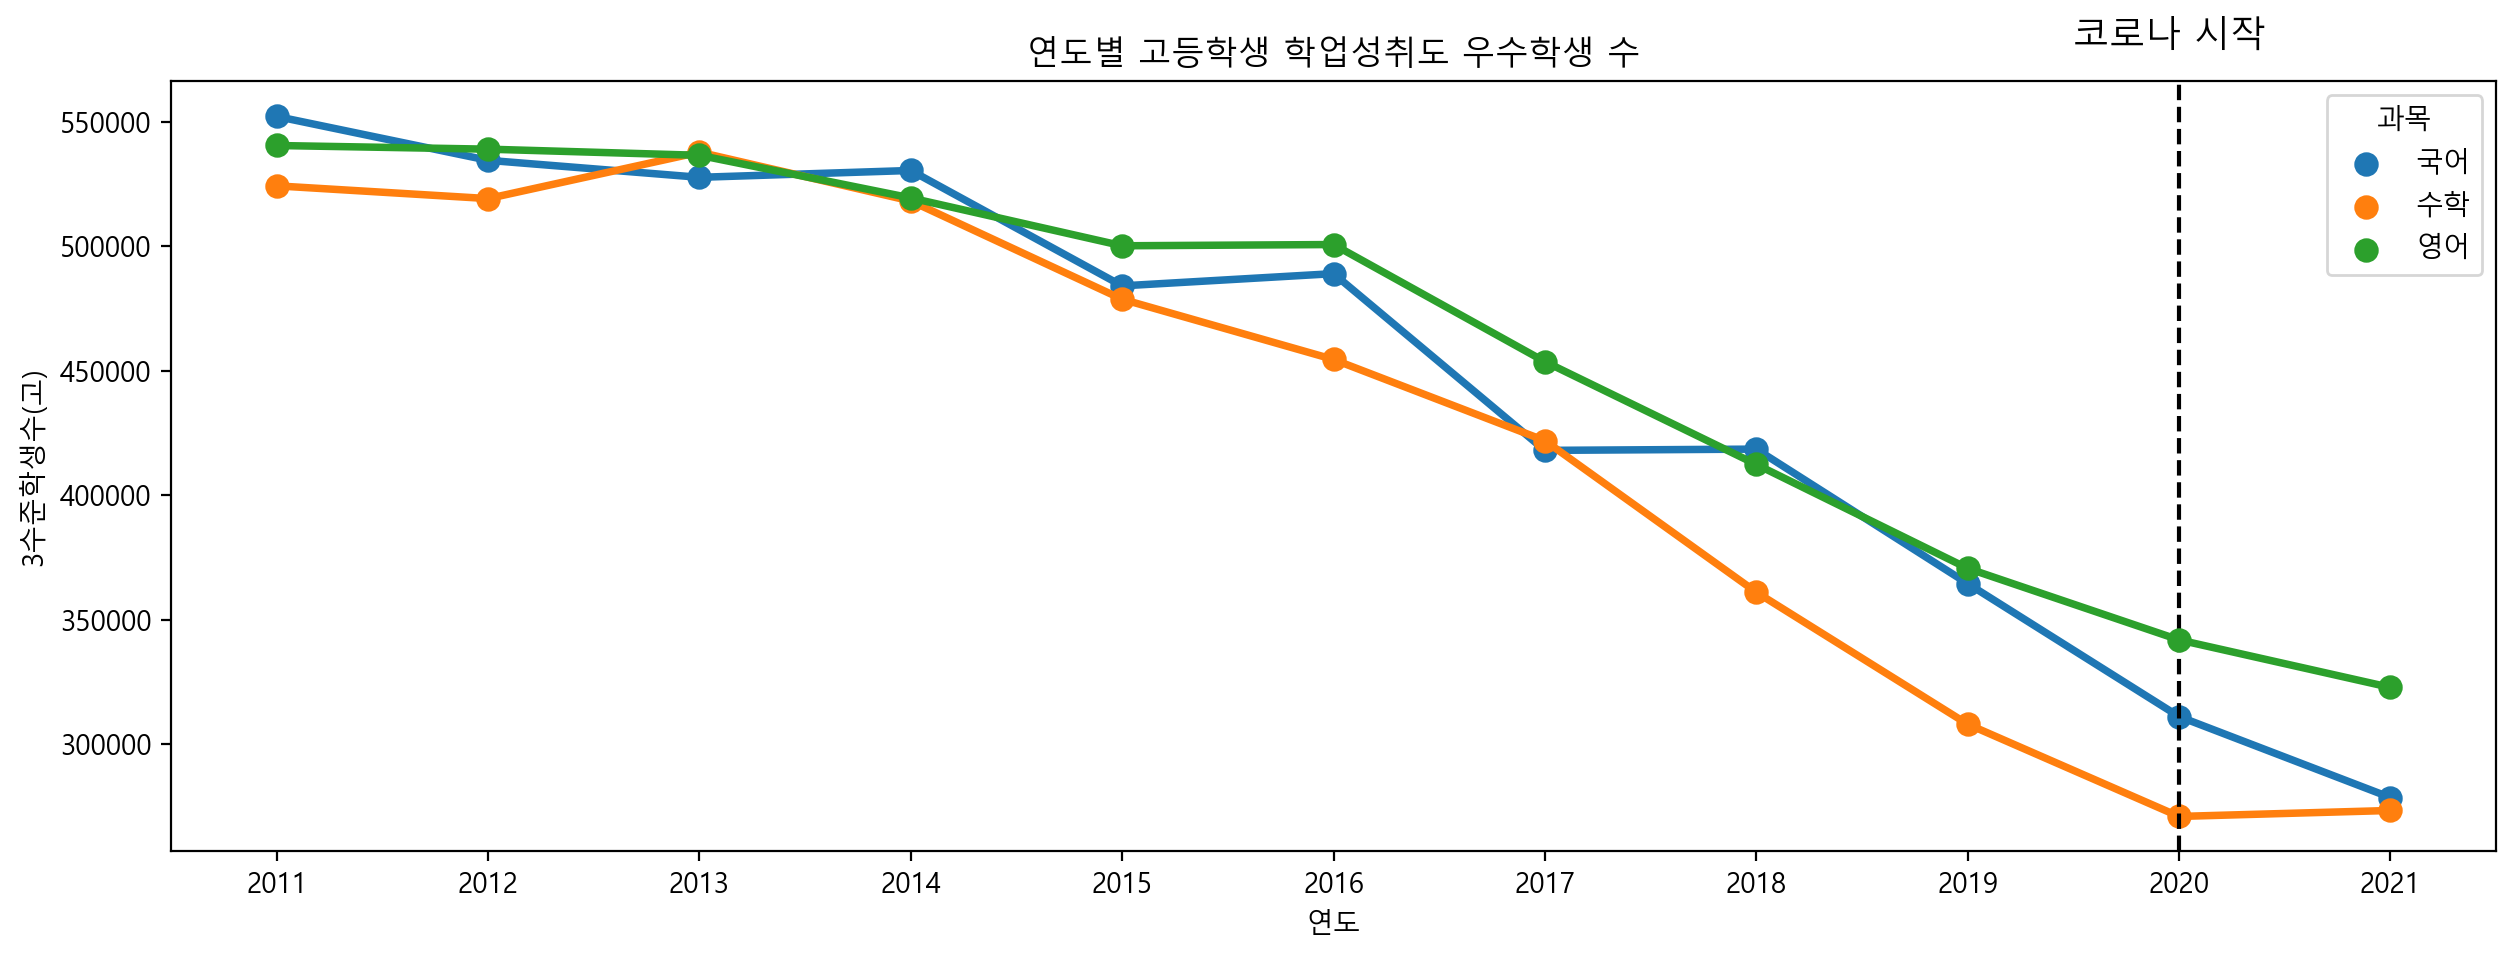

In [262]:
plt.figure(figsize=(15,5))
sns.pointplot(data=df_agg, x="연도", y="3수준학생수(고)", hue="과목")
plt.title("연도별 고등학생 학업성취도 우수학생 수")
plt.axvline(9, color="black", linestyle="--")
plt.text(8.5, 580000, "코로나 시작", size=13)
plt.show()

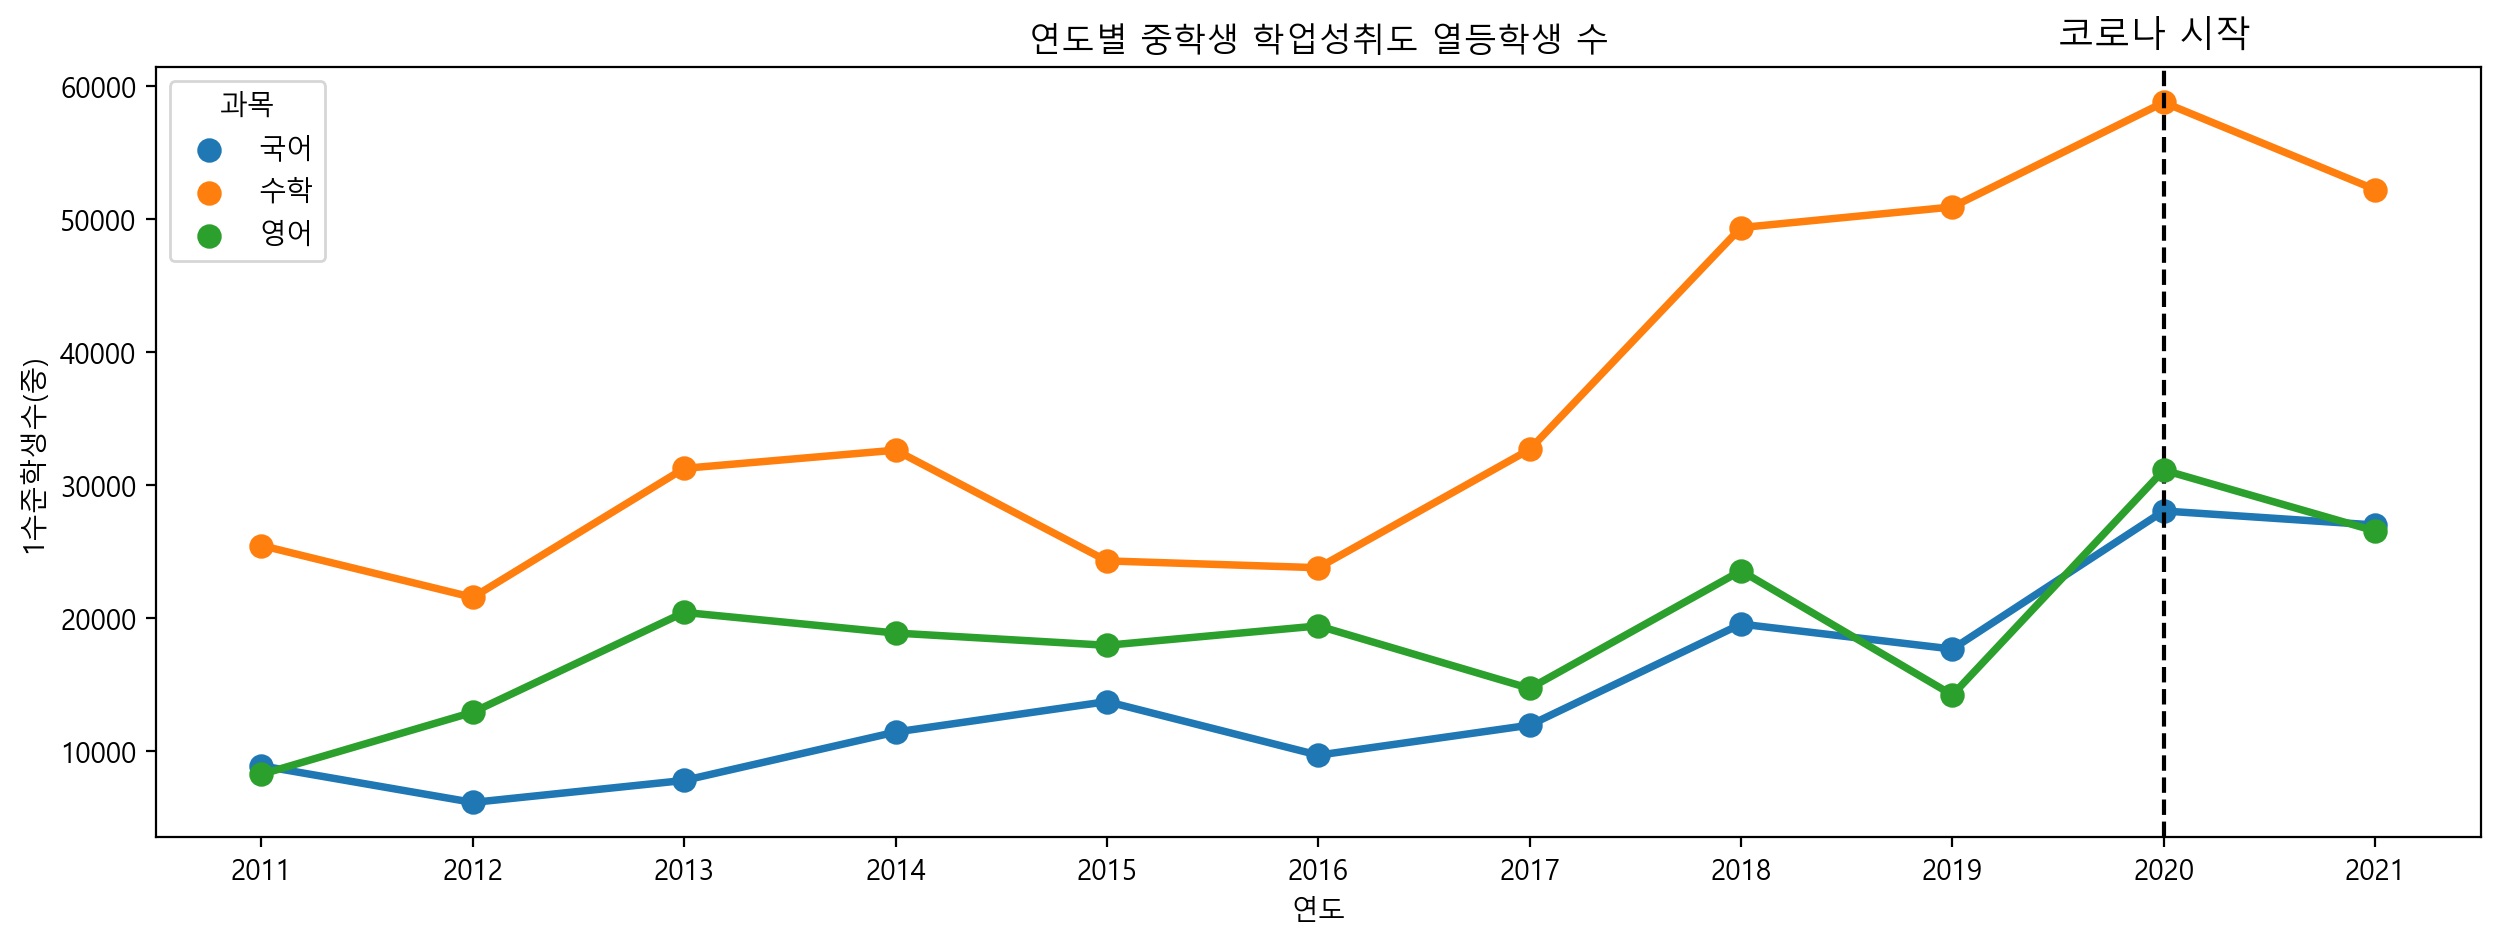

In [263]:
plt.figure(figsize=(15,5))
sns.pointplot(data=df_agg, x="연도", y="1수준학생수(중)", hue="과목")
plt.title("연도별 중학생 학업성취도 열등학생 수")
plt.axvline(9, color="black", linestyle="--")
plt.text(8.5, 63000, "코로나 시작", size=13)
plt.show()

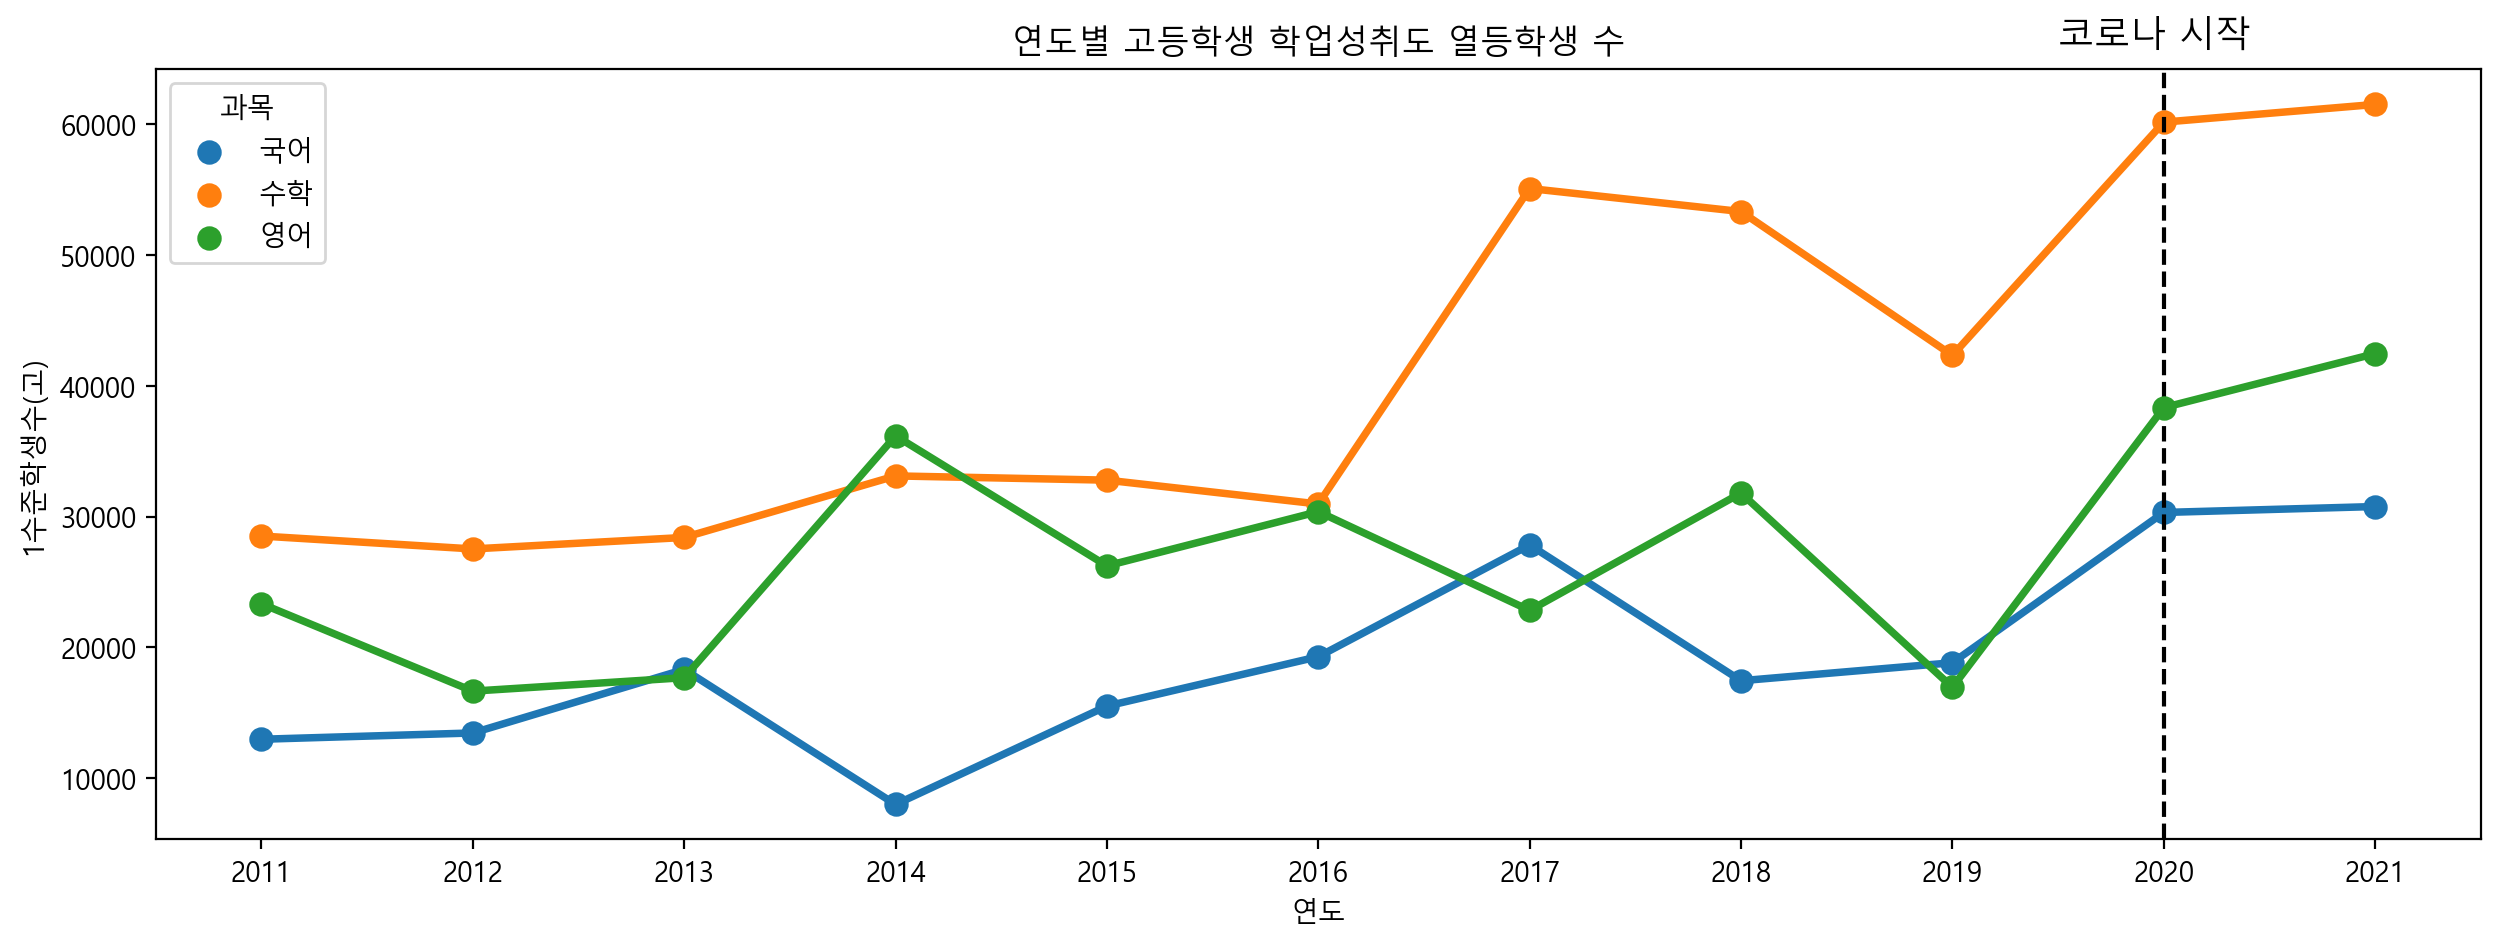

In [264]:
plt.figure(figsize=(15,5))
sns.pointplot(data=df_agg, x="연도", y="1수준학생수(고)", hue="과목")
plt.title("연도별 고등학생 학업성취도 열등학생 수")
plt.axvline(9, color="black", linestyle="--")
plt.text(8.5, 66000, "코로나 시작", size=13)
plt.show()

- 중학생 학업성취도 우수학생 수는 코로나 이전 계속해서 하락세를 보이다가 코로나 이후 오히려 반등하거나 하락폭이 줄은 모습
- 고등학생 학업성취도 우수학생 수는 국어, 영어과목에서 코로나와 관계없이 계속해서 하락세를 보이나, 수학의 경우 오히려 조금 반등함
- 그렇다면 열등학생 수는 어떨까?
- 중학생 학업성취도 열등학생 수는 우상향하는 추세를 보이다가, 코로나 이후 상승세가 꺾인 모습임
- 고등학생 학업성취도 열등학생 수도 마찬가지
- 학생 수가 줄고있다는 것을 고려해봤을 때, 온라인 교육은 학업성취도에 오히려 좋은 영향을 미치지 않았을까?

#### 최종 merge : 사교육비 총액 + 학원 및 보습교육 항목의 소비자물가지수 + 학업중단자수 + 학업성취도별 학생 수

In [265]:
# 국어, 영어, 수학 학생을 하나로 합쳐 평균처리
# 연도별 학업성취도별 학생 수 집계
df_agg_mean = df_agg.groupby("연도").mean().round()

# object로 타입을 변환했음에도 실제로 적용되지 않는 오류 발생.
# dtype은 변경되나 실제 값은 변경이 안된것같음
# 오류를 해결하지 못해 연도값을 숫자형으로 통일시켜 merge해줌
df_pcs["연도"] = pd.to_numeric(df_pcs["연도"])

# 최종 merge 후 필요없는 컬럼 제거 및 컬럼 이름 변경
# merge를 위해 숫자형으로 바꿔놨던 연도를 다시 object형으로 변경
# 이 때 마찬가지로 dtype은 변경되나 실제 값은 변경이 안되는 오류 발생
df_merge_all = df_pcs.merge(df_agg_mean, on="연도")
df_merge_all = df_merge_all.drop(["지수", "전년대비증감률"], axis=1)
df_merge_all = df_merge_all.rename(columns={"전년대비증감" : "전년대비증감(지수)", "총액" : "사교육비총액"})
df_merge_all["연도"] = df_merge_all["연도"].astype("object")

# 최종 merge 데이터 df_merge_all

#### 상관관계 시각화

Text(0.5, 1.0, '학업중단자수와 학업성취도와의 상관관계 - 중학교')

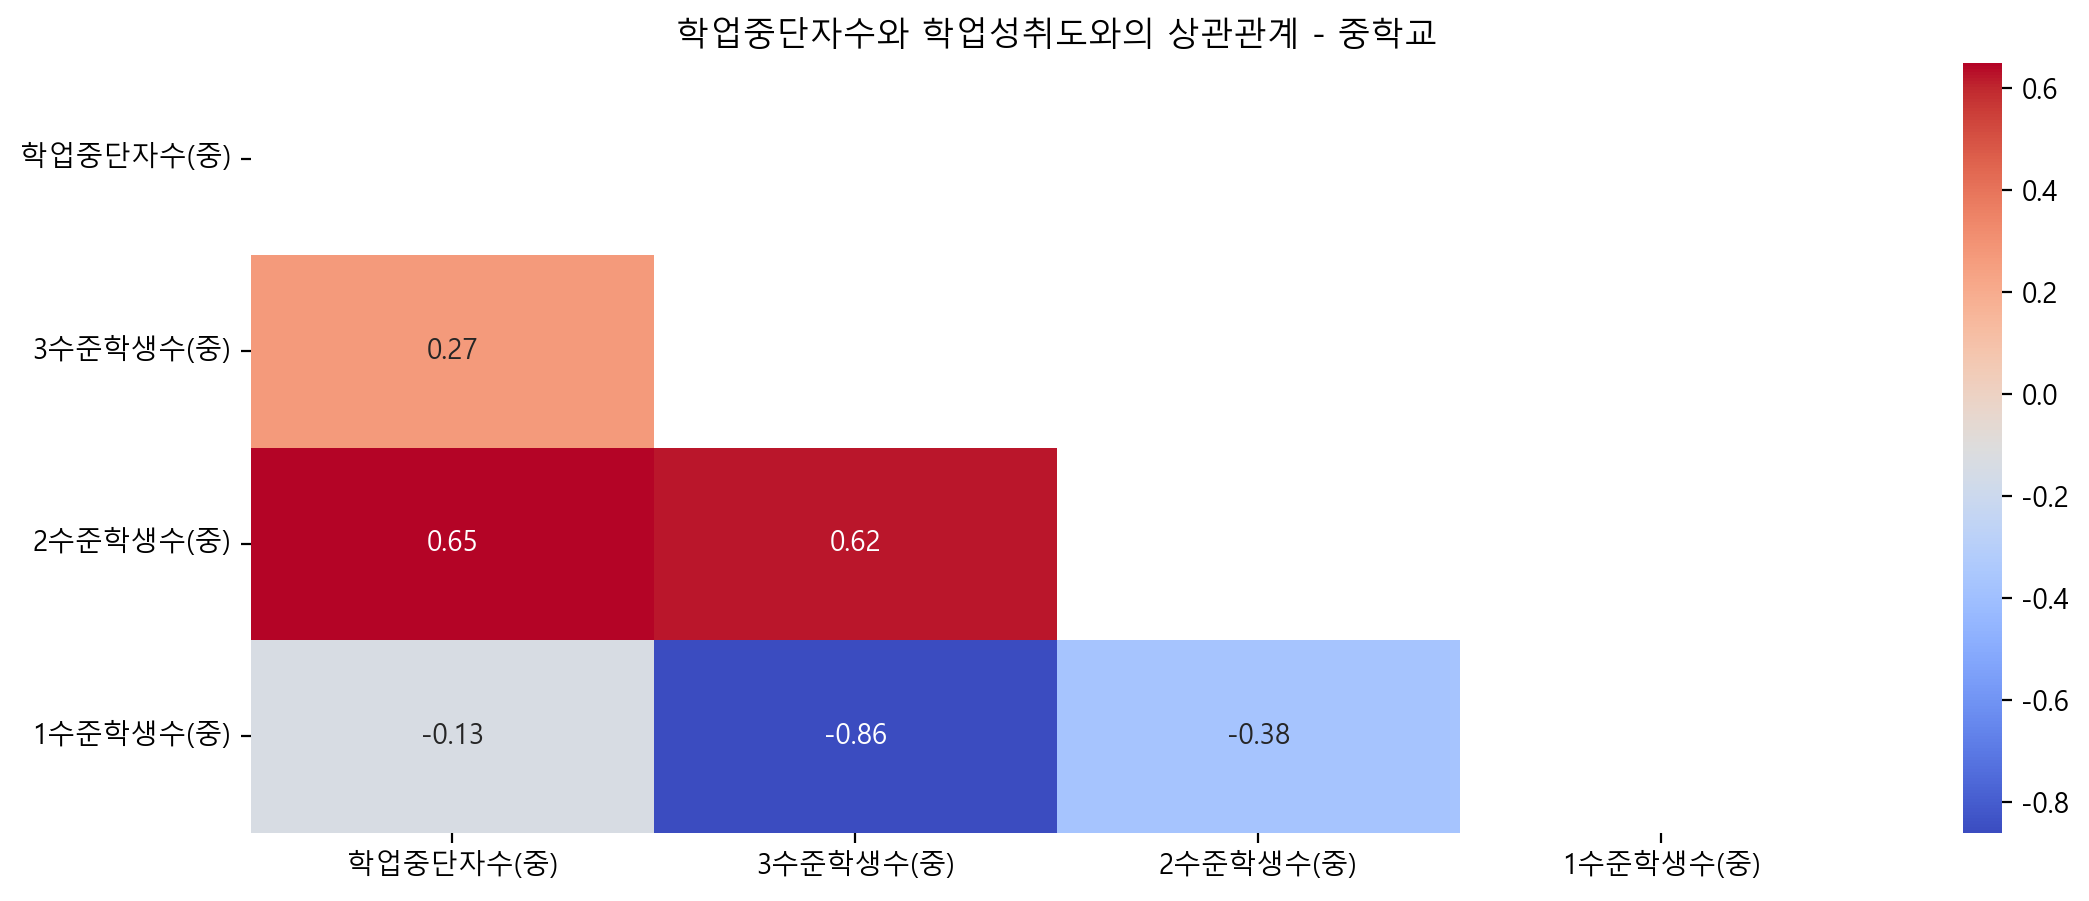

In [266]:
corr_stop_grade_m = df_merge_all.loc[:, df_merge_all.columns.str.contains("\(\중\)", regex=True)].corr()
mask = np.triu(np.ones_like(corr_stop_grade_m))

plt.figure(figsize=(13,5))
sns.heatmap(corr_stop_grade_m, annot=True, cmap="coolwarm", mask=mask)
plt.title("학업중단자수와 학업성취도와의 상관관계 - 중학교")

Text(0.5, 1.0, '학업중단자수와 학업성취도와의 상관관계 - 고등학교')

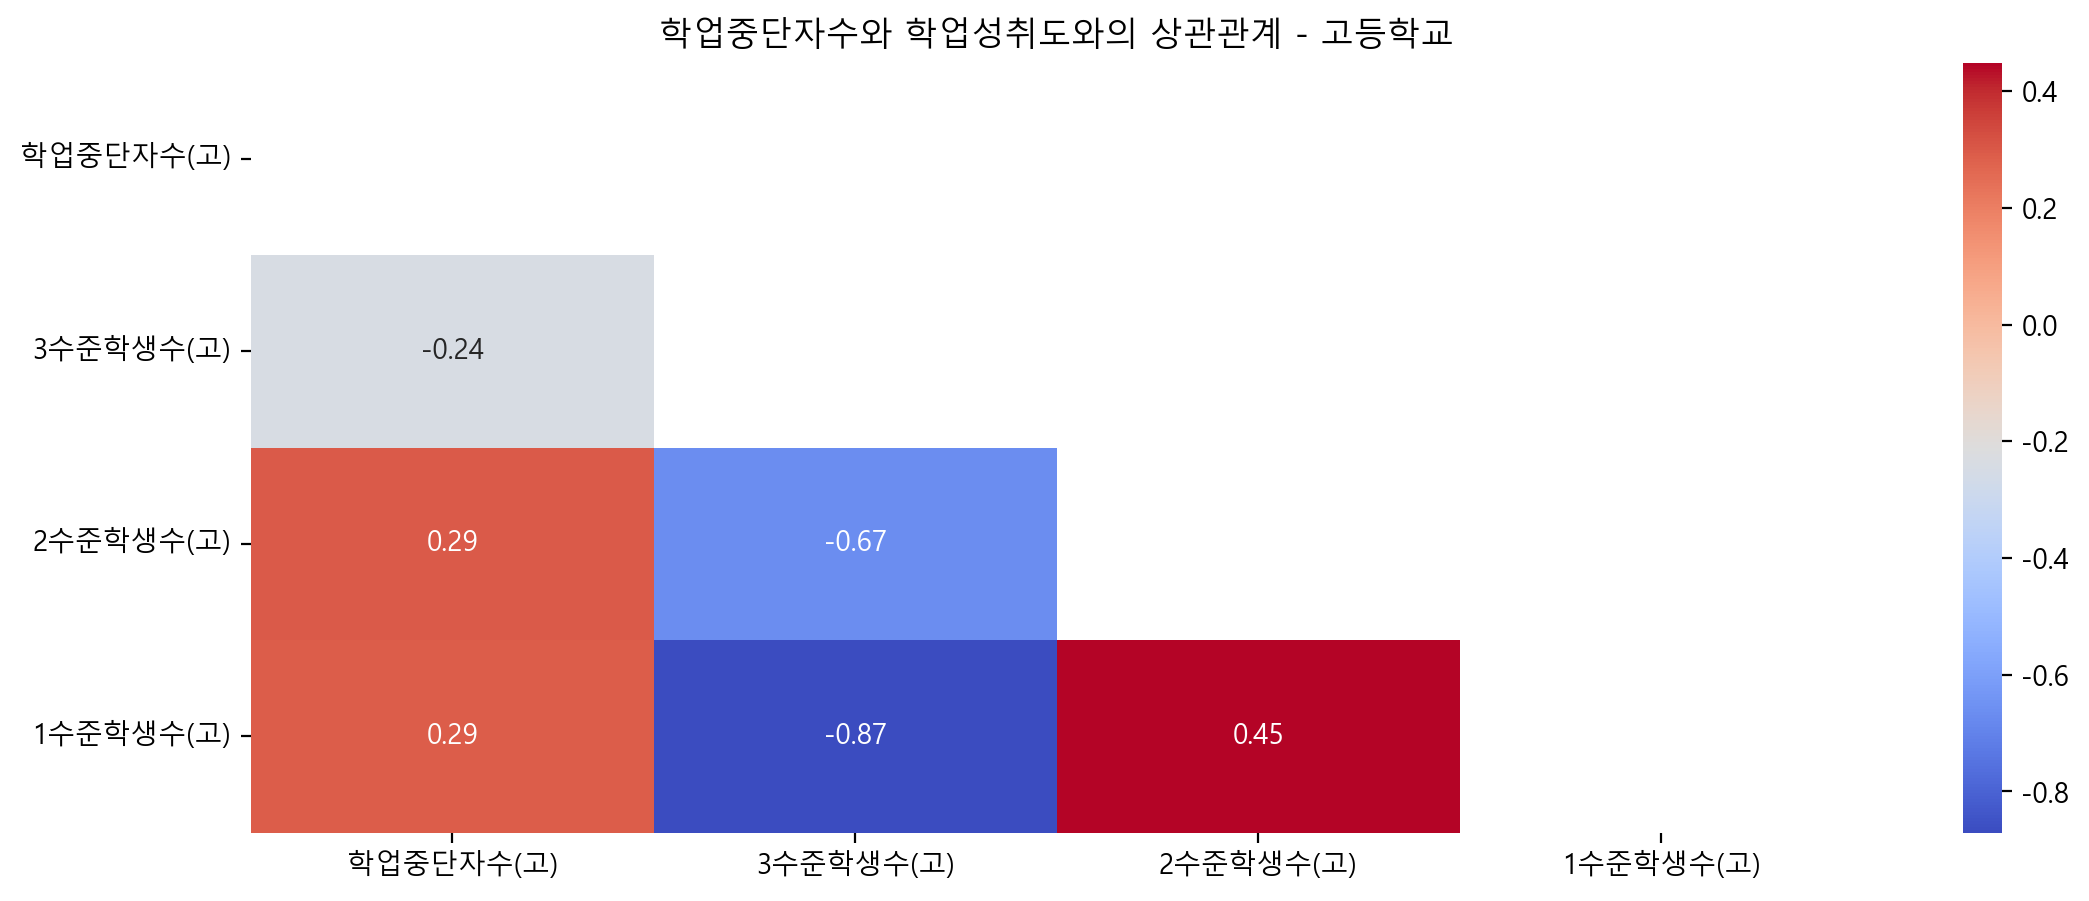

In [267]:
corr_stop_grade_h = df_merge_all.loc[:, df_merge_all.columns.str.contains("\(\고\)", regex=True)].corr()
mask = np.triu(np.ones_like(corr_stop_grade_h))

plt.figure(figsize=(13,5))
sns.heatmap(corr_stop_grade_h, annot=True, cmap="coolwarm", mask=mask)
plt.title("학업중단자수와 학업성취도와의 상관관계 - 고등학교")

- 학원 및 보습교육 물가지수와 3수준학생(학업성취도 우수학생)수는 강한 양의 상관관계를 가진다.
- 반대로, 학원 및 보습교육 물가지수와 1수준학생(학업성취도 열등학생)수는 강한 음의 상관관계를 가진다.
- 사교육비 총액이 올라갈수록 학업성취도 우수학생수는 떨어진다..
- 중학교 학업중단자수가 많아질수록 중학교 학업성취도가 약간 올라간다 (학업에 관심없는 아이들이 일찌감치 자퇴하기 때문에..?)
- 반면, 고등학교 학업중단자수가 많아질수록 고등학교 학업성취도가 내려간다. (올라갈 줄 알았는데.. 왜?)

## 가설 4 : 가설4 시험폐지 후 창체활동이 늘었을까?

## 창체활동-동아리 가입 증가수 데이터전처리

### 창의적 체험활동 연도별 증가 데이터

In [268]:
#데이터불러오기
df_time = pd.read_csv("dataset/2012-2022 교원의 주당 창의적체험활동시수 -service.csv")
df_time.columns = ['연도','시도','학교급','교원의 주당 창의적체험활동 수업시수']
df_time=df_time.iloc[3:]
df_time=df_time.reset_index(drop=True)

df_time["교원의 주당 창의적체험활동 수업시수"] = pd.to_numeric(df_time["교원의 주당 창의적체험활동 수업시수"], errors="coerce")

### 서울시 연도별 창체 시간 시각화

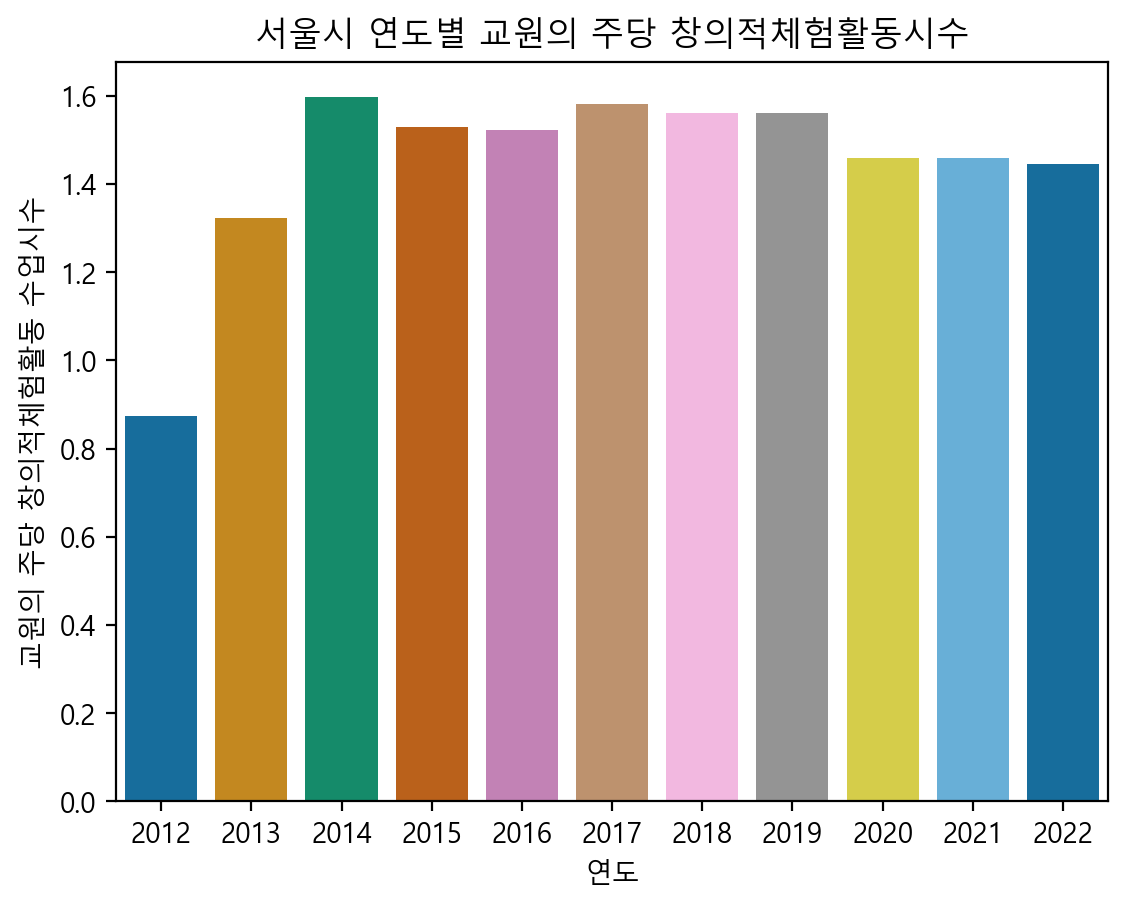

In [269]:
#서울시 연도별 창체시간 df_time_total 변수지정
df_time_total=df_time[df_time["학교급"]=="전체"]
sns.barplot(data=df_time, x="연도", y="교원의 주당 창의적체험활동 수업시수", palette = sns.color_palette("colorblind"), ci=None)
plt.title("서울시 연도별 교원의 주당 창의적체험활동시수")
plt.show()

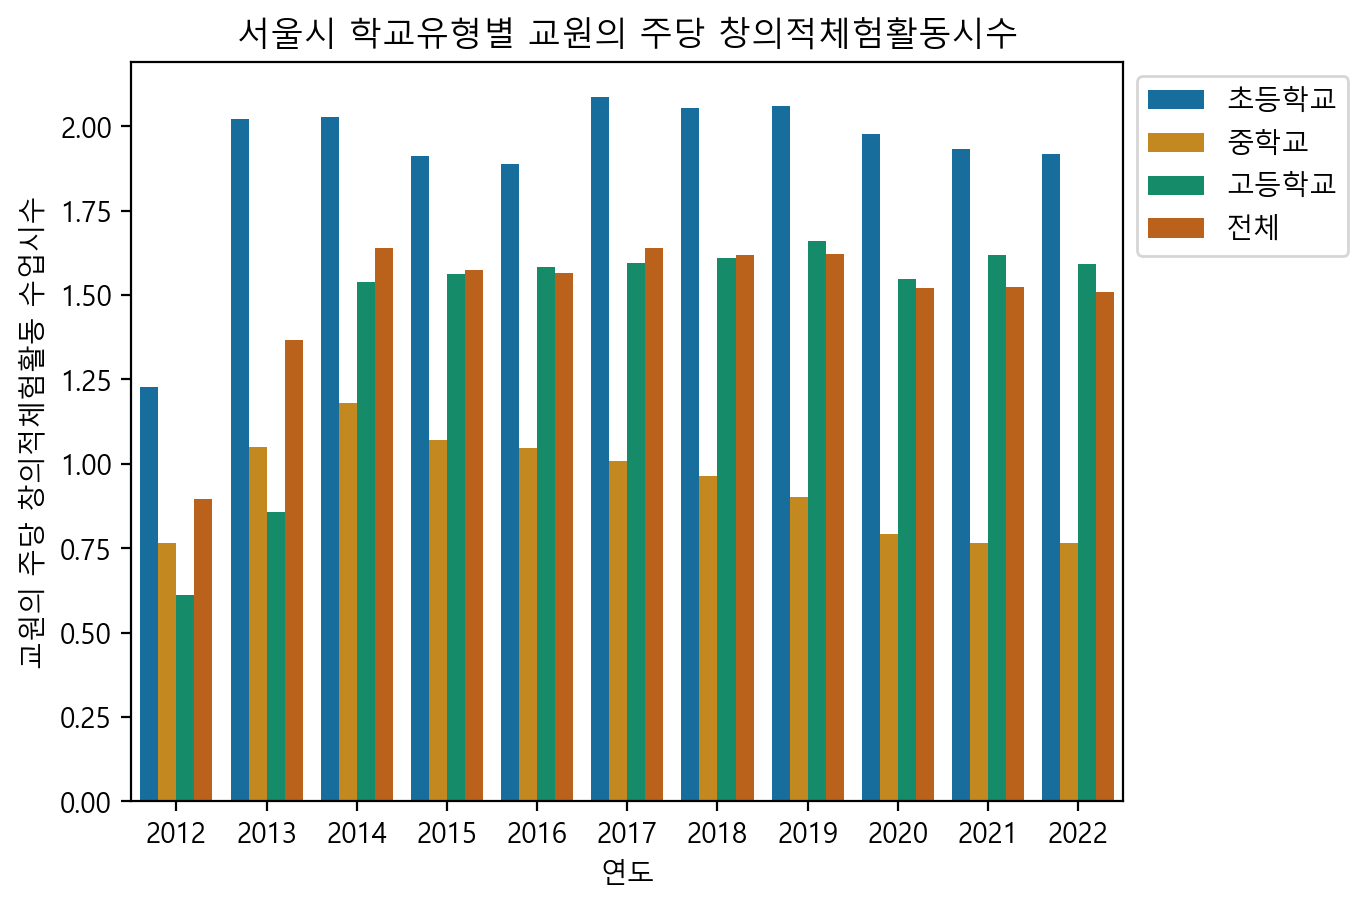

In [270]:
#서울시 연도/학교유형별 창체시간
sns.barplot(data=df_time, x="연도", y="교원의 주당 창의적체험활동 수업시수", hue="학교급", palette = sns.color_palette("colorblind"), ci=None)
plt.title("서울시 학교유형별 교원의 주당 창의적체험활동시수")
plt.legend(bbox_to_anchor = (1,1))
plt.show()

### 창의적 재량활동 중 동아리 가입비율 데이터

In [271]:
#데이터불러오기 2012~2018 년까지
df_club1 = pd.read_csv("dataset/2012.csv",encoding="cp949")
df_club2 = pd.read_csv("dataset/2013.csv",encoding="cp949")
df_club3 = pd.read_csv("dataset/2014.csv",encoding="cp949")
df_club4 = pd.read_csv("dataset/2015.csv",encoding="cp949")
df_club5 = pd.read_csv("dataset/2016.csv",encoding="cp949")
df_club6 = pd.read_csv("dataset/2017_2018.csv",encoding="cp949")

In [272]:
# 있다 응답률 만 빼고컬럼 삭제
df_club1= df_club1.drop(columns=['전체(N)','전체(N).1','있다','없다','없다.1'])
#컬럼명 재정의
df_club1.columns=['시점','응답자유형별(1)', '응답자유형별(2)', '비율']
#중복컬럼이름 제거
df_club1 =df_club1.loc[1:]
#인덱스 재정렬
df_club1=df_club1.reset_index(drop=True)


df_club2= df_club2.drop(columns=['없다'])
df_club2.columns = (['시점', '응답자유형별(1)', '응답자유형별(2)', '비율'])
df_club2= df_club2.drop([14,15,16])
df_club2=df_club2.reset_index(drop=True)


df_club3= df_club3.drop(columns=['없다'])
df_club3.columns = (['시점', '응답자유형별(1)', '응답자유형별(2)', '비율'])
df_club3= df_club3.drop([14,15,16])
df_club3.reset_index(drop=True)

df_club4= df_club4.drop(columns=['없다'])
df_club4.columns = (['시점', '응답자유형별(1)', '응답자유형별(2)', '비율'])
df_club4= df_club4.drop([14,15,16])
df_club4=df_club4.reset_index(drop=True)

df_club5= df_club5.drop(columns=['없다'])
df_club5.columns = (['시점', '응답자유형별(1)', '응답자유형별(2)', '비율'])
df_club5= df_club5.drop([14,15,16])
df_club5=df_club5.reset_index(drop=True)

df_club6= df_club6.drop(columns=['없다'])
df_club6.columns=['시점','응답자유형별(1)', '응답자유형별(2)', '비율']
df_club6= df_club6.drop([15,16,17,36,37,38])
df_club6= df_club6.drop([5,26])
df_club6=df_club6.reset_index(drop=True)

#전처리된 2012년도~18년 데이터 합치기
group=pd.concat([df_club1,df_club2,df_club3,df_club4,df_club5,df_club6], axis=0)
group.head()

시점 응답자유형별(1) 응답자유형별(2)    비율
0  2012        전체        소계  53.2
1  2012        성별        남자  52.2
2  2012        성별        여자  54.4
3  2012     학교유형별      초등학교  47.6
4  2012     학교유형별       중학교  58.0

In [273]:
#각 연도별 데이터명 상이한 부분 하나로 맞추기
group=group.replace('지역규모','지역규모별')
group=group.replace('가족유형','가족유형별')
group=group.replace('경제적 수준','경제적수준별')
group=group.replace('학교급','학교유형별')
group=group.replace('고교유형','학교유형별')
group=group.replace('읍면지역','읍/면')
group=group.replace('가족유형','가족유형별')
group=group.replace('일반계고','일반/특목/자율고')
group=group.replace('전문계고','특성화고')
group=group.replace('특성화계고','특성화고')
group=group.replace('전체','성별')
group=group.replace('소계','합계')

#각 연도별 데이터명 상이한 부분 하나로 맞추기
group=group.replace('지역규모','지역규모별')
group=group.replace('가족유형','가족유형별')
group=group.replace('경제적 수준','경제적수준별')
group=group.replace('학교급','학교유형별')
group=group.replace('고교유형','학교유형별')
group=group.replace('읍면지역','읍/면')
group=group.replace('가족유형','가족유형별')
group=group.replace('일반계고','일반/특목/자율고')
group=group.replace('전문계고','특성화고')
group=group.replace('특성화계고','특성화고')
group=group.replace('전체','성별')
group=group.replace('소계','합계')

###  동아리 가입비율 데이터 시각화하기

In [274]:
sex= group[group['응답자유형별(1)'] == "성별"]
sex=sex.drop(columns=["응답자유형별(1)"])
sex.columns=(['시점', '성별', '비율'])
sex=sex.reset_index(drop=True)

#sex_total 합계 변수
#sex_male_female 남녀변수
sex_total=sex[sex["성별"]== "합계"]
sex_male_female=sex[sex["성별"]!= "합계"]
sex_total=sex_total.reset_index(drop=True)
sex_male_female=sex_male_female.reset_index(drop=True)

corr=df_time_total.reset_index(drop=True).drop([7,8,9,10])

sex_total=sex[sex["성별"]== "합계"]
sex_total.columns=['시점', '성별', '동아리가입비율']
sex_total.reset_index(drop=True)

시점  성별 동아리가입비율
0  2012  합계    53.2
1  2013  합계    70.9
2  2014  합계    74.6
3  2015  합계    72.6
4  2016  합계    73.6
5  2017  합계    77.6
6  2018  합계    75.9

In [275]:
sex_total=sex[sex["성별"]== "합계"]
sex_total
sex_total['비율'] = pd.to_numeric(sex_total['비율'])
sex_male_female['비율'] = pd.to_numeric(sex_male_female['비율'])

#### 전체, 성별 가입자 시각화

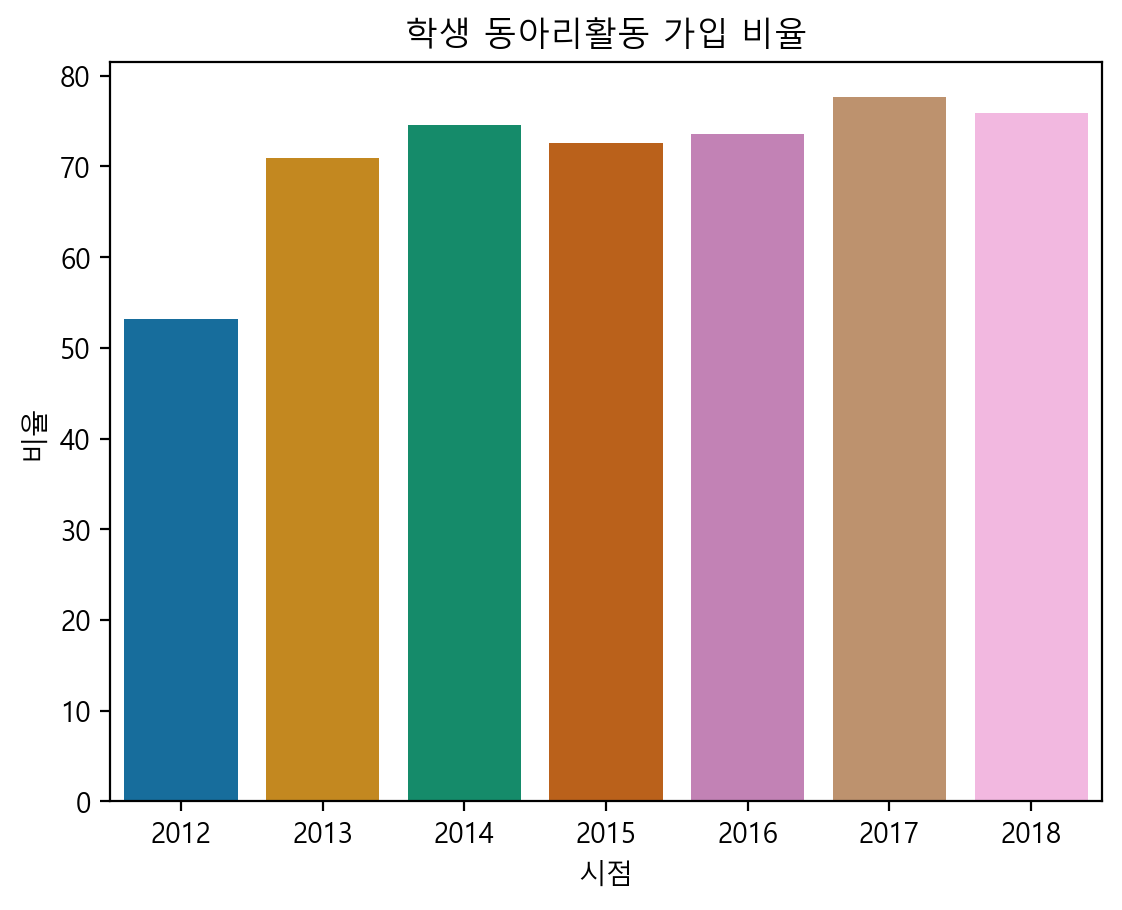

In [276]:
sns.barplot(data=sex_total, x="시점", y="비율",  palette = sns.color_palette("colorblind"), ci=None)
plt.title("학생 동아리활동 가입 비율")
plt.show()

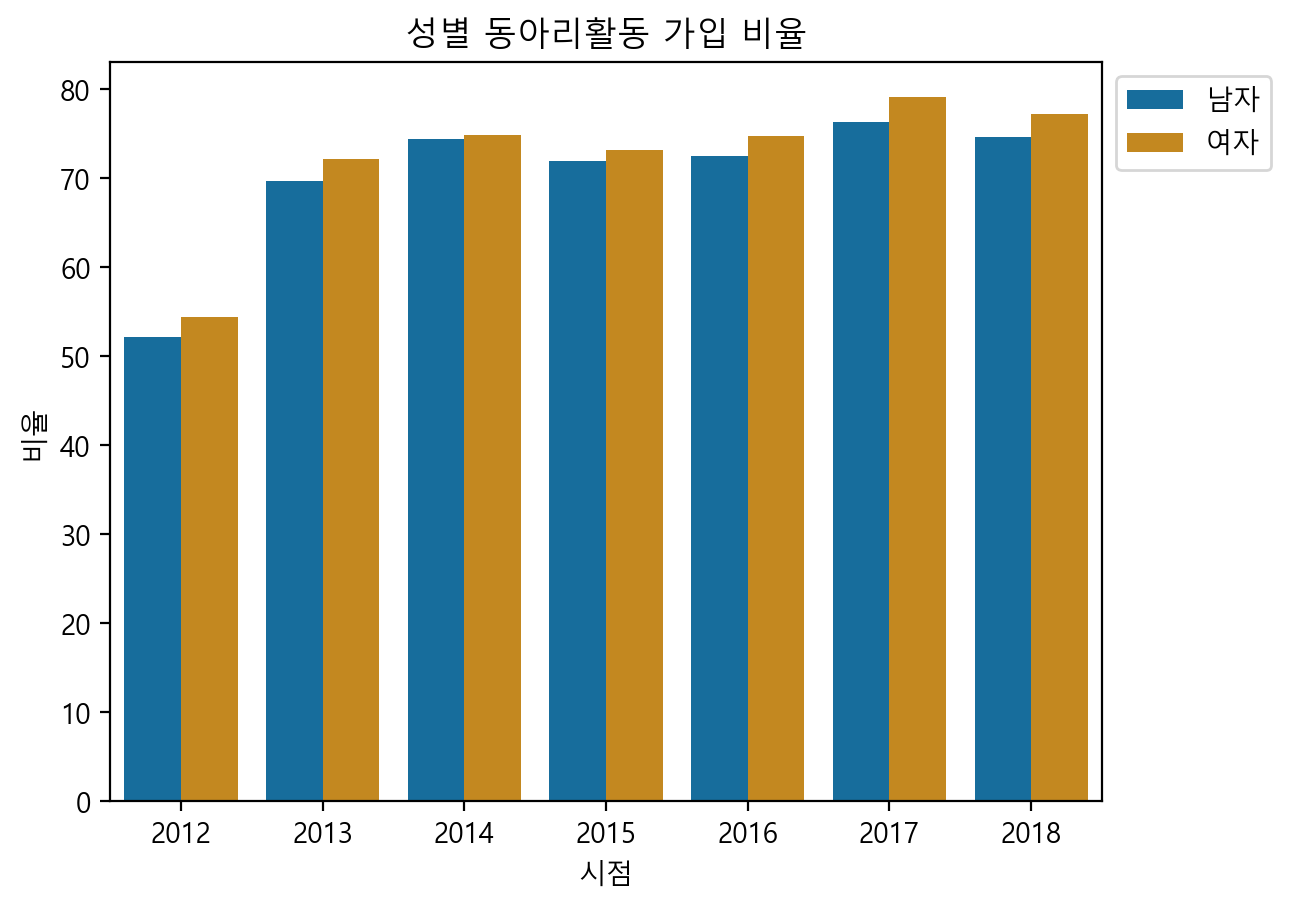

In [277]:
sns.barplot(data=sex_male_female, x="시점", y="비율", hue="성별", palette = sns.color_palette("colorblind"), ci=None)
plt.title("성별 동아리활동 가입 비율")
plt.legend(bbox_to_anchor = (1,1))
plt.show()

### 학교유형별 동아리 가입비율 시각화

In [278]:
school= group[group['응답자유형별(1)'] == "학교유형별"]
school_special=school[(school['응답자유형별(2)'] == "특성화고") | (school['응답자유형별(2)'] == "일반/특목/자율고")]
school_special['비율'] = pd.to_numeric(school_special['비율'])

Text(0.5, 1.0, '학교유형에 따른 동아리 가입 비율')

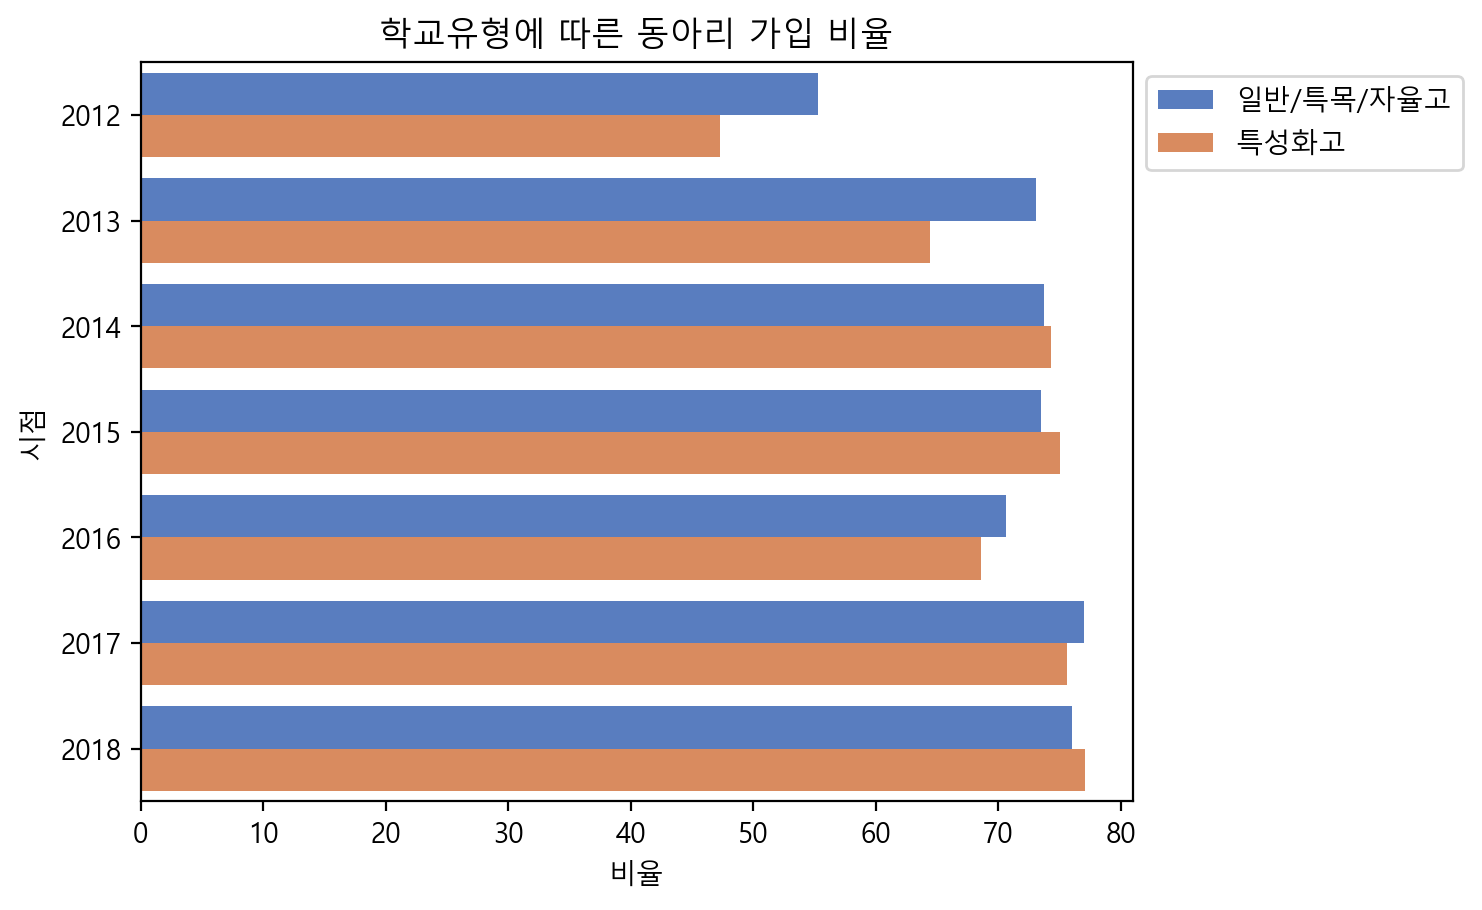

In [279]:
sns.barplot(data=school_special, x="비율", y="시점", hue="응답자유형별(2)", palette = sns.color_palette("muted"), ci=None)
plt.legend(bbox_to_anchor = (1,1))
plt.title("학교유형에 따른 동아리 가입 비율")

- 일반/특목/자율고 와 특성화고 사이의 가입비율을 봤을때 2014년 이후 특성화고의 가입수 비율이 증가한 것으로 확인된다.
- 2013년 이전에는 일반계와 전문계로 이분화 되었으나 이후 특성화고로 변경되면서 특성화고의 동아리 가입 비율 증가된 것으로 예상된다.

#### 경제적 수준별 동아리 가입비율 시각화

Text(0.5, 1.0, '경제적 수준별 동아리활동 참여 비율')

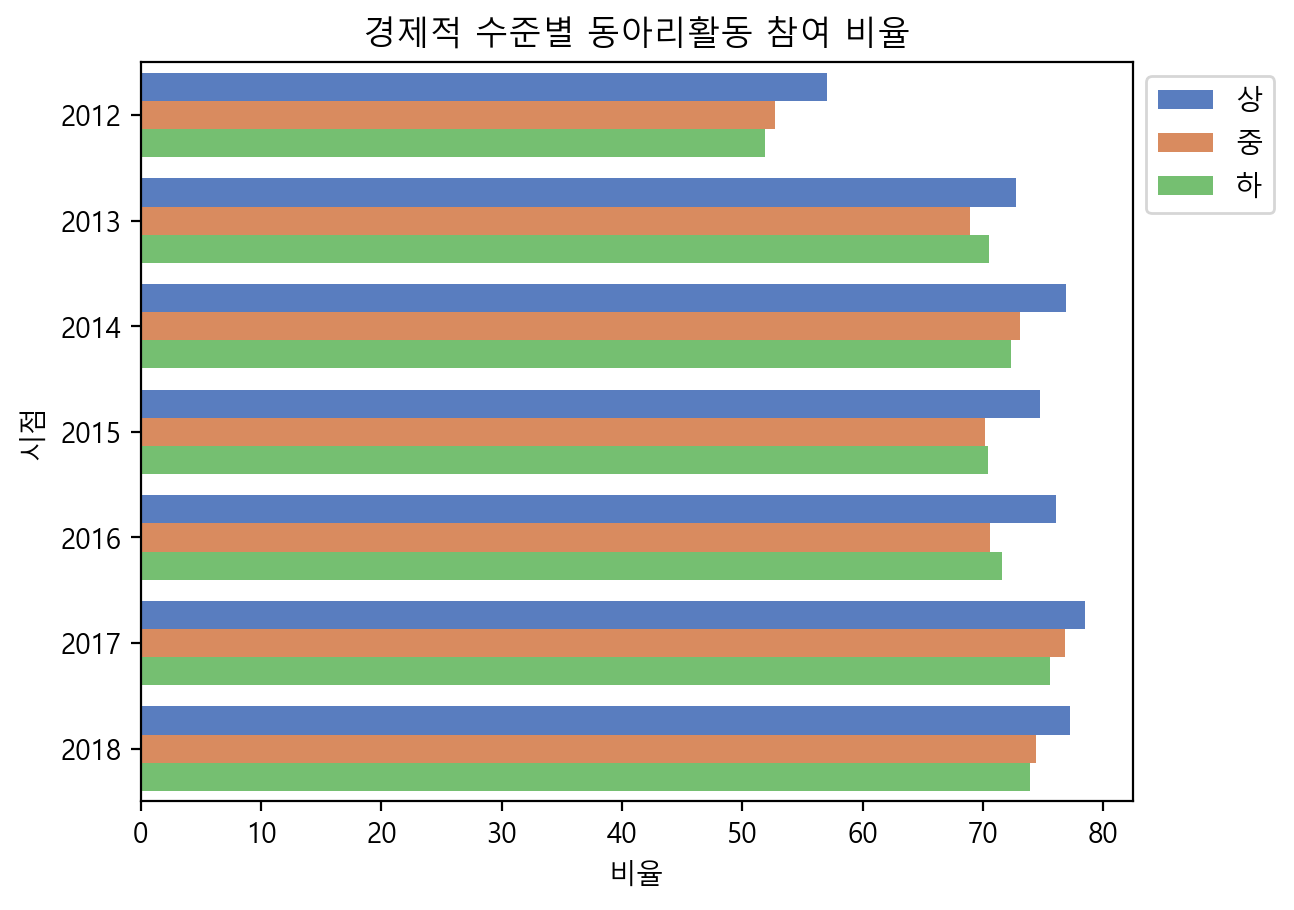

In [280]:
economic= group[group['응답자유형별(1)'] == "경제적수준별"]
economic['비율'] = pd.to_numeric(economic['비율'])

sns.barplot(data=economic, x="비율", y="시점", hue="응답자유형별(2)", palette = sns.color_palette("muted"), ci=None)
plt.legend(bbox_to_anchor = (1,1))
plt.title("경제적 수준별 동아리활동 참여 비율")

In [281]:
def to_num(df):
    df['비율'] = pd.to_numeric(df['비율'])
    return df

In [282]:
region= group[group['응답자유형별(1)'] == "지역규모별"]
region_city= region[(region['응답자유형별(2)'] == "대도시")|(region['응답자유형별(2)']=='중소도시')]
region_rural= region[(region['응답자유형별(2)'] == "대도시")|(region['응답자유형별(2)']=='읍/면')]

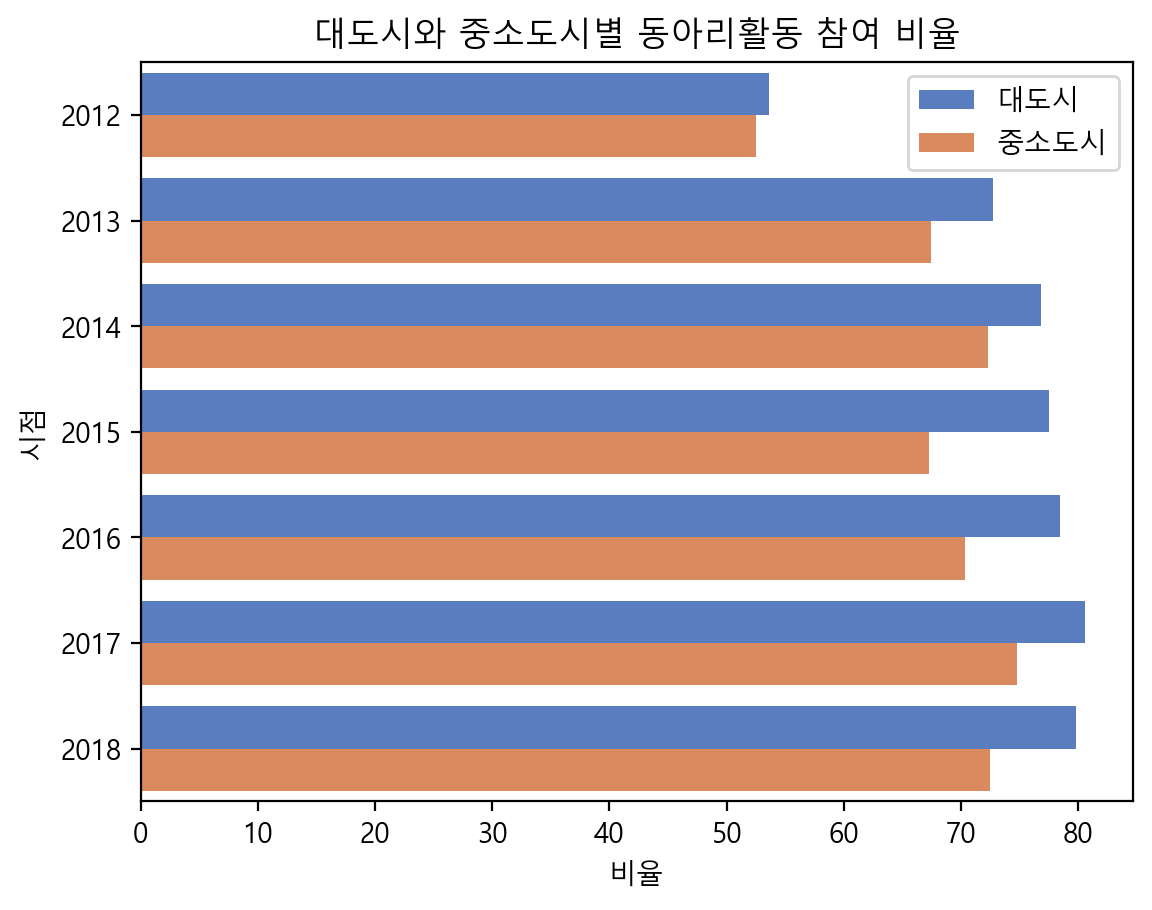

In [283]:
sns.barplot(data=to_num(region_city), x="비율", y="시점", hue="응답자유형별(2)", palette = sns.color_palette("muted"), ci=None)
plt.legend(bbox_to_anchor = (1,1))
plt.title("대도시와 중소도시별 동아리활동 참여 비율")
plt.show()

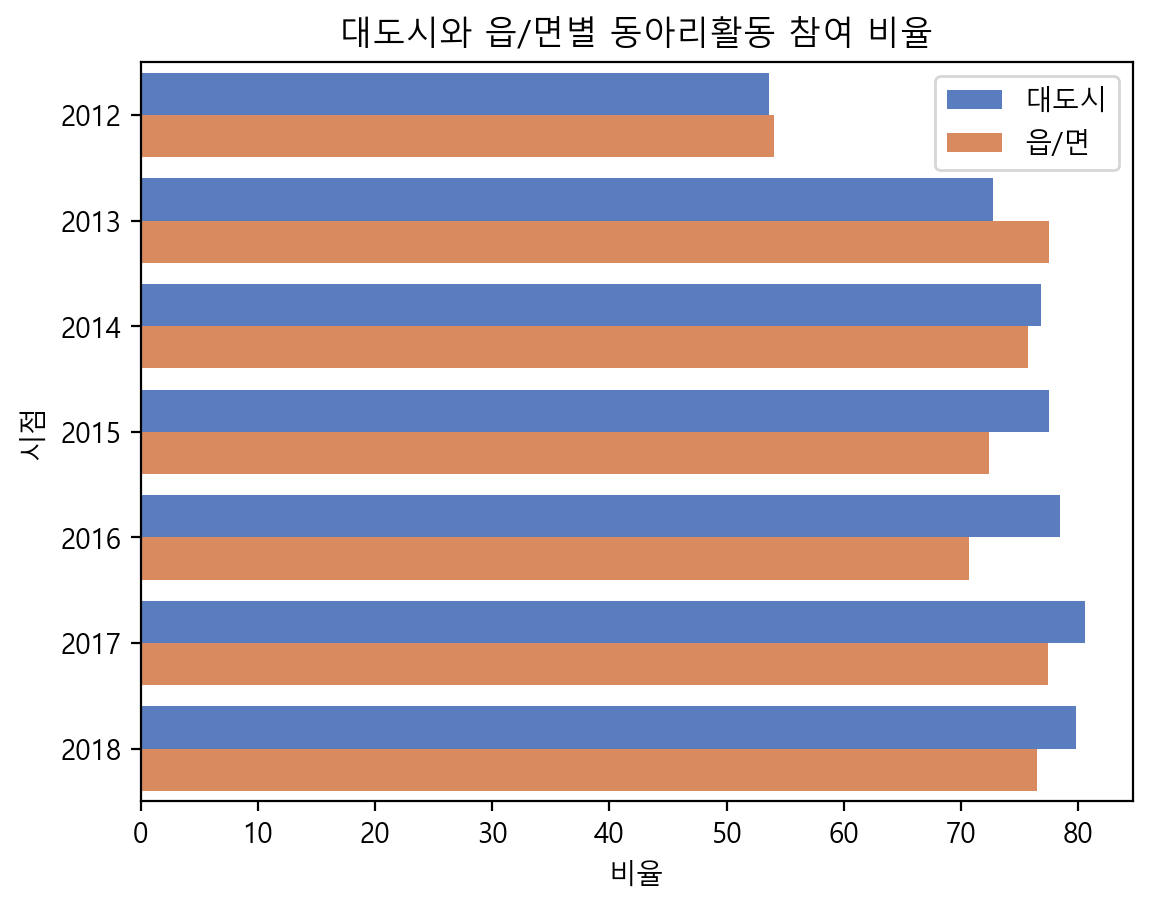

In [284]:
sns.barplot(data=to_num(region_rural), x="비율", y="시점", hue="응답자유형별(2)", palette = sns.color_palette("muted"), ci=None)
plt.legend(bbox_to_anchor = (1,1))
plt.title("대도시와 읍/면별 동아리활동 참여 비율")
plt.show()

- 대도시와 중소도시를 비교했을 때 대도시가 항상 동아리가입자비율이 높지만, 
- 대도시와 읍면을 비교했을 때 2013년도 읍/면의 비율이 더 높아 확인해 볼 필요가 있다.

Text(0.5, 1.0, '가족형태별 동아리활동 참여 비율')

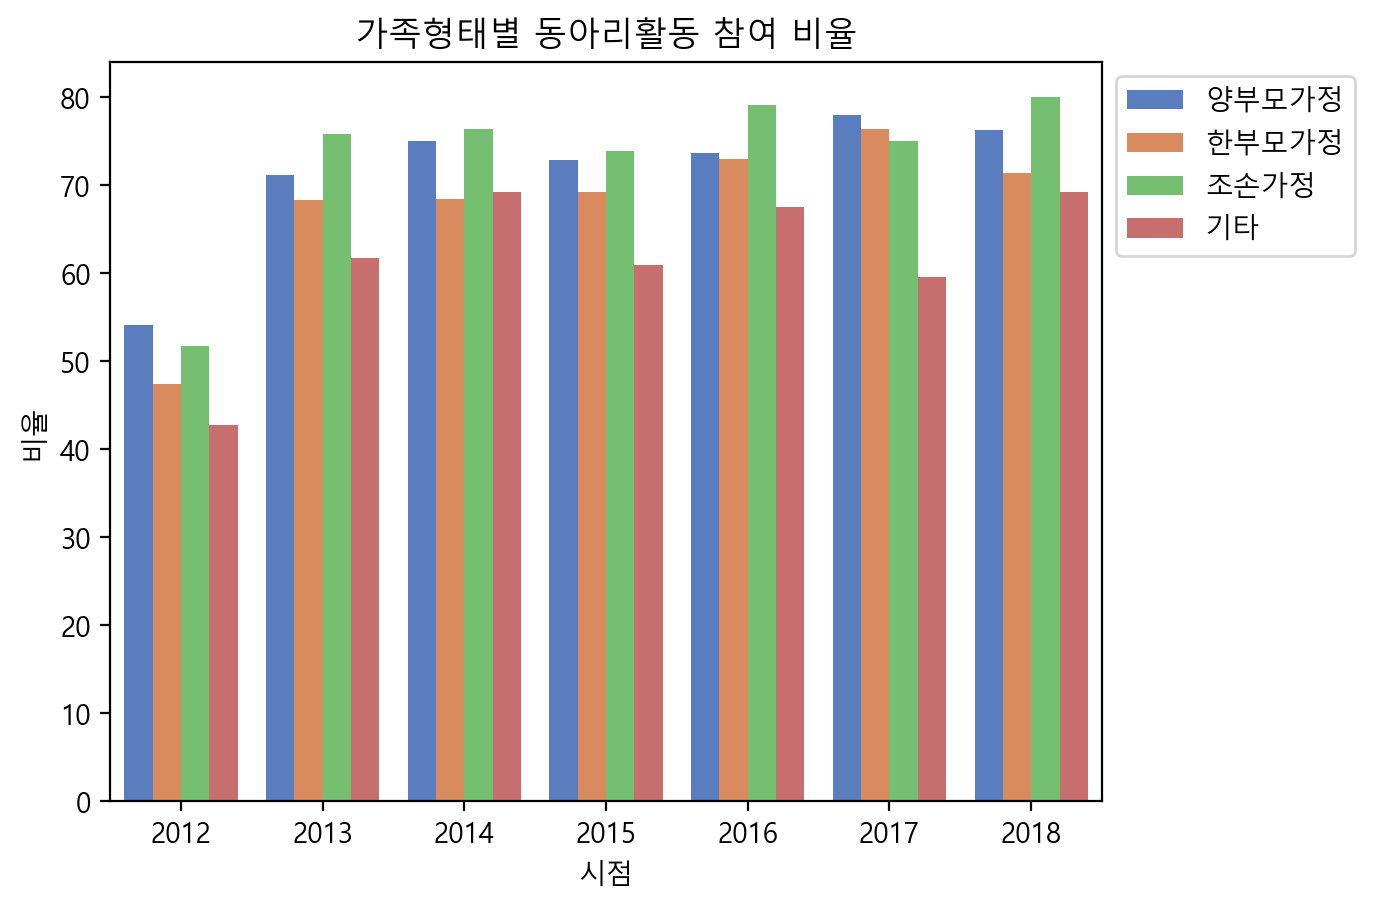

In [285]:
familytype= group[group['응답자유형별(1)'] == "가족유형별"]

sns.barplot(data=to_num(familytype), x="시점", y="비율", hue="응답자유형별(2)", palette = sns.color_palette("muted"), ci=None)
plt.legend(bbox_to_anchor = (1,1))
plt.title("가족형태별 동아리활동 참여 비율")

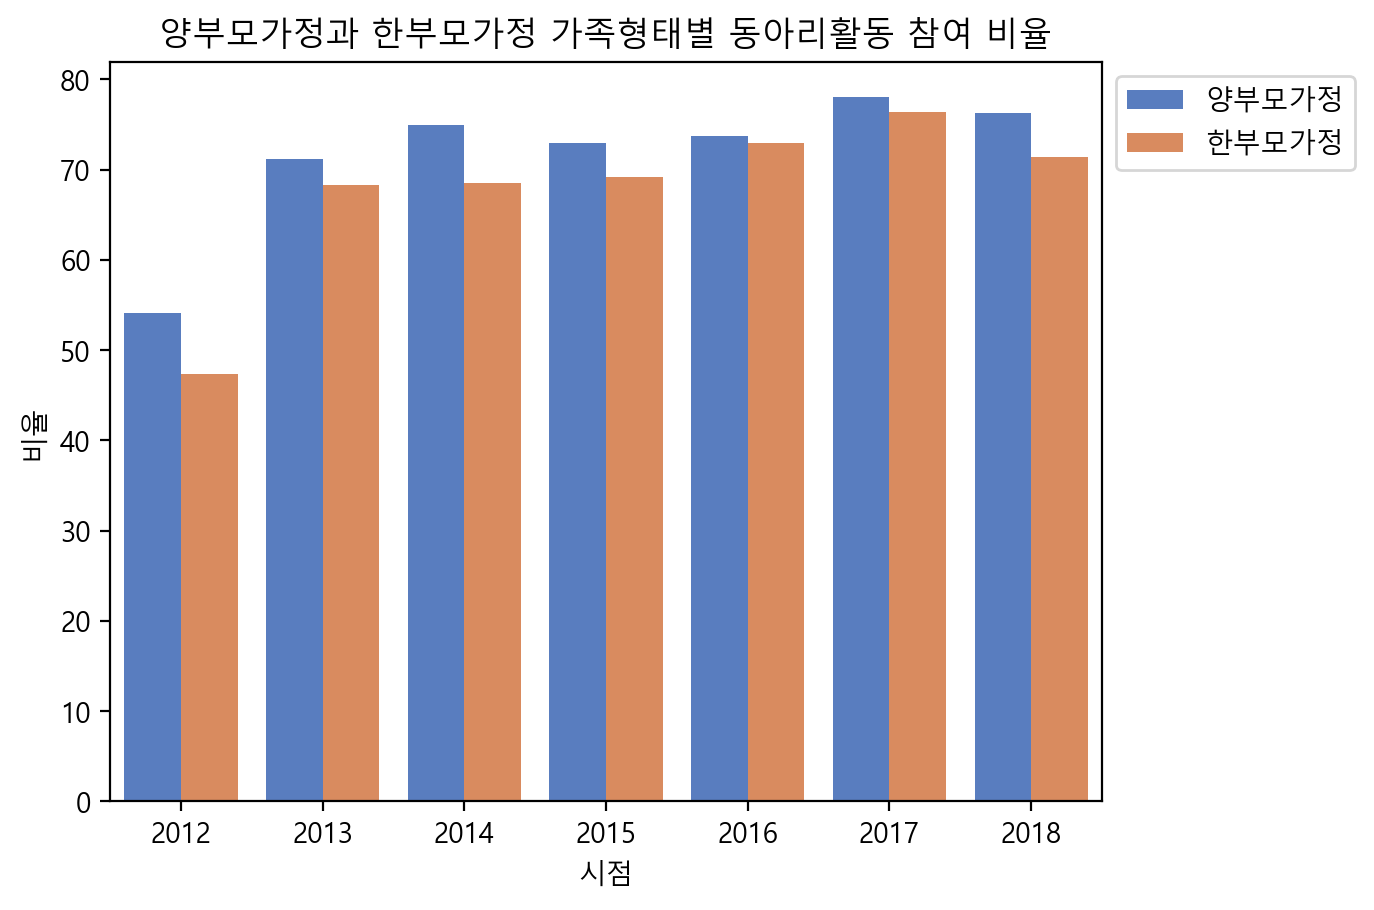

In [286]:
familytype_single= familytype[(familytype['응답자유형별(2)'] == "양부모가정")|(familytype['응답자유형별(2)']=="한부모가정")]
familytype_grandparents= familytype[(familytype['응답자유형별(2)'] == "양부모가정")|(familytype['응답자유형별(2)']=="조손가정")]

sns.barplot(data=to_num(familytype_single), x="시점", y="비율", hue="응답자유형별(2)", palette = sns.color_palette("muted"), ci=None)
plt.legend(bbox_to_anchor = (1,1))
plt.title("양부모가정과 한부모가정 가족형태별 동아리활동 참여 비율")
plt.show()

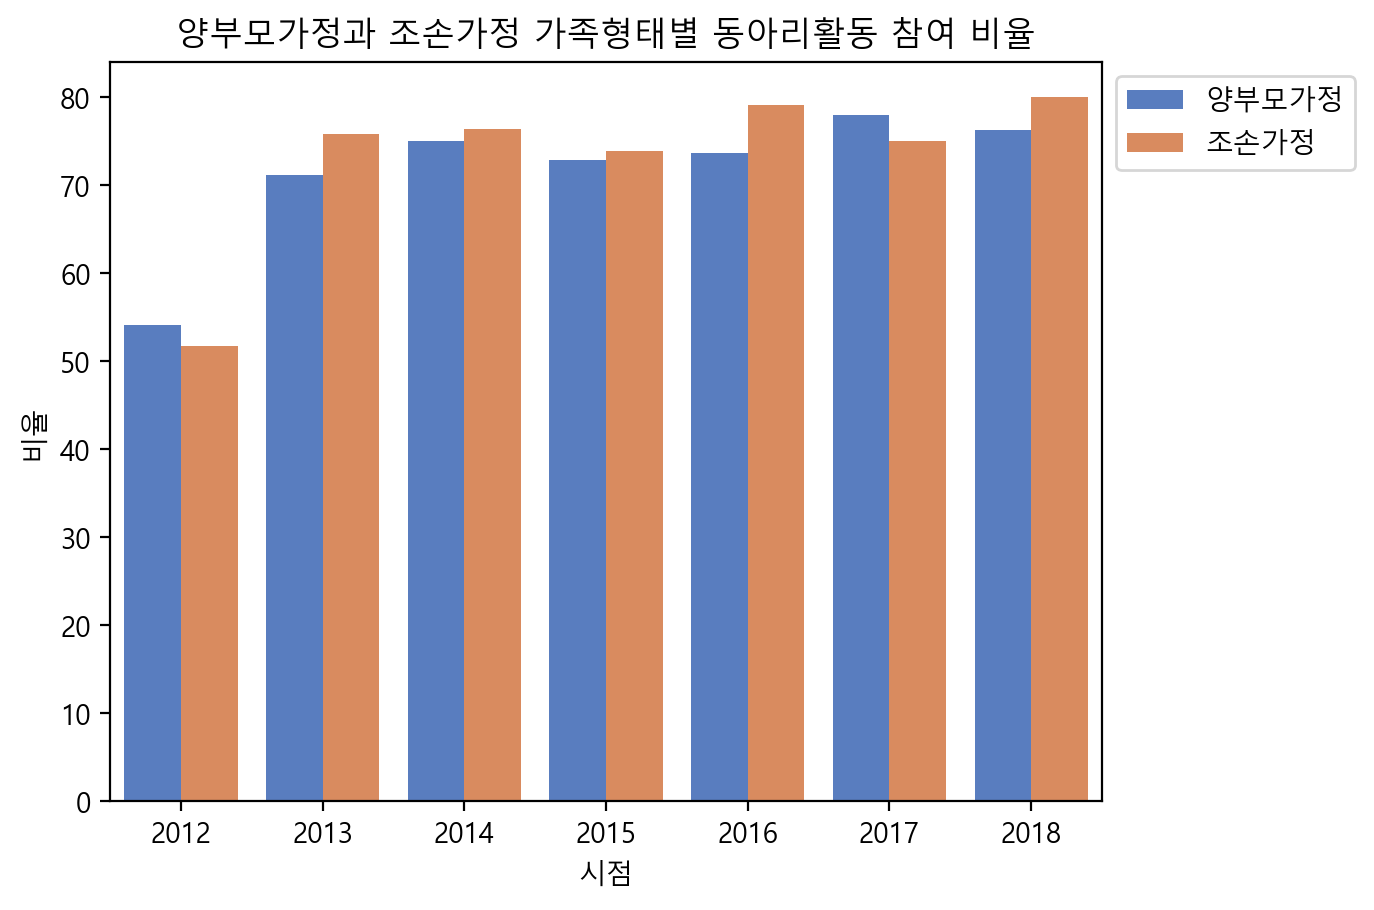

In [287]:
sns.barplot(data=to_num(familytype_grandparents), x="시점", y="비율", hue="응답자유형별(2)", palette = sns.color_palette("muted"), ci=None)
plt.legend(bbox_to_anchor = (1,1))
plt.title("양부모가정과 조손가정 가족형태별 동아리활동 참여 비율")
plt.show()

- 2012년 2017년을 제외하고는 모두 조손가정의 동아리 활동 참여비율이 높게 나타난다.

#### 결론
- 창체수업시간 증가에 따라 동아리 가입자 비율도 늘어나고 있다. 
    =>상관계수 0.98
- 2013년도에 특히 증가세가 두드러지고 있다. 
     ==> "창체활동 중 하나였던 스포츠클럽활동을 따로 분리하여 의무화 시킴" / 2012년도 이후 주5일제 시행으로 주말 활동프로그램의 증가가 두드러짐 
     >https://news.seoul.go.kr/welfare/archives/306939
     >https://www.kice.re.kr/upload/brochureBoard/7/2021/05/1622172496674_56140382171416185.pdf
- 동아리가입비율에서 특이한 점은 고등학교 유형별 특성화고에서 2014년도부터 일반/자율/특목고를 앞지르는데 이후 가입자 비율은 비슷해지고 있다.
    >2012년도 전문계 고등학교에서 특성화고로 명칭변경되면서 세분화된 맞춤 전공 지원
    ```
    학년에 관계없이 방과 후 수업 시간에는 학생들이 적성에 따라 전공 관련 자격증이나 전문교과 등 부족한 부분을 보완할 수 있도록 돕고 있으며, 이외에도 학교에서 각종 공모전, 대회에 관한 소식을 빠짐없이 전해 학생들이 진학과 취업의 꿈에 한발 가까이 다가갈 수 있도록 하고 있습니다.```
    
    https://if-blog.tistory.com/1609

## 가설 5 : 교육과정, 입시제도의 변화와 사교육, 학업 성취도의 관계

In [288]:
file_names = sorted(glob('dataset/2011*.xlsx'))
file_names

['dataset\\2011~2020 학업성취도 평가 고등학생.xlsx',
 'dataset\\2011~2020 학업성취도 평가 중학생.xlsx']

### 2011~2020 학업 성취도 평가 EDA
#### **데이터 소개**
- 평가원에서 매년 발간되는 교육 평가 보고서에서 가져옴
- 중학교 3학년과 고등학교 1학년을 대상으로 매년 진행되는 학업 성취도 평가 데이터(집계자료)
- 2009 ~ 2015년은 전수조사, 2016년~2020년은 표본조사가 진행됨(2016년 1.5%, 나머진 3% 표본)
- 2021년 자료는 아직 집계되지 않음(평가원왈 연내발간예정)
- sheets : 전체, 성별, 지역별
- columns : 학력수준, 연도, 국어, 수학, 영어, 성별(성별 sheet), 지역별(지역별 sheet)
- '학력수준'의 경우 '우수학력', '보통학력', '기초학력', '기초학력 미달'로 표기되었으나 2020년부터 제4수준~제1수준으로 변경됨

### 중학교 학업 성취도 평가 EDA
**변수명**
- mid_achieve_all : 중학생 학업 성취도(melt)
- mid_grafe : 중학생 학업성취도(학력수준별)

In [289]:
sheets = ['전체', '성별', '지역별']
columns = ['학력수준', '연도', '국어', '수학', '영어'] # 공통 columns

mid_achieve_all = pd.read_csv('dataset_eda/중학생 학업성취도(melt).csv')
mid_grade = pd.read_csv('dataset_eda/중학생 학업성취도(학력수준별).csv')

중학생 학력 수준에 대한 전반적 시각화
- 대체로 국어를 잘하는 편이며 수학을 어려워 하는 경향을 보임
- 2020년에 들어 '국어' 학력이 떨어지는 경향이 고조됨
- '학력우수'와 '기초학력 미달' 학생 간의 양극화 경향이 보임
- '보통이상'의 학생이 줄어들고 '기초이하'의 학생이 즐어드는 경향을 보임

<AxesSubplot:xlabel='학력수준', ylabel='비율'>

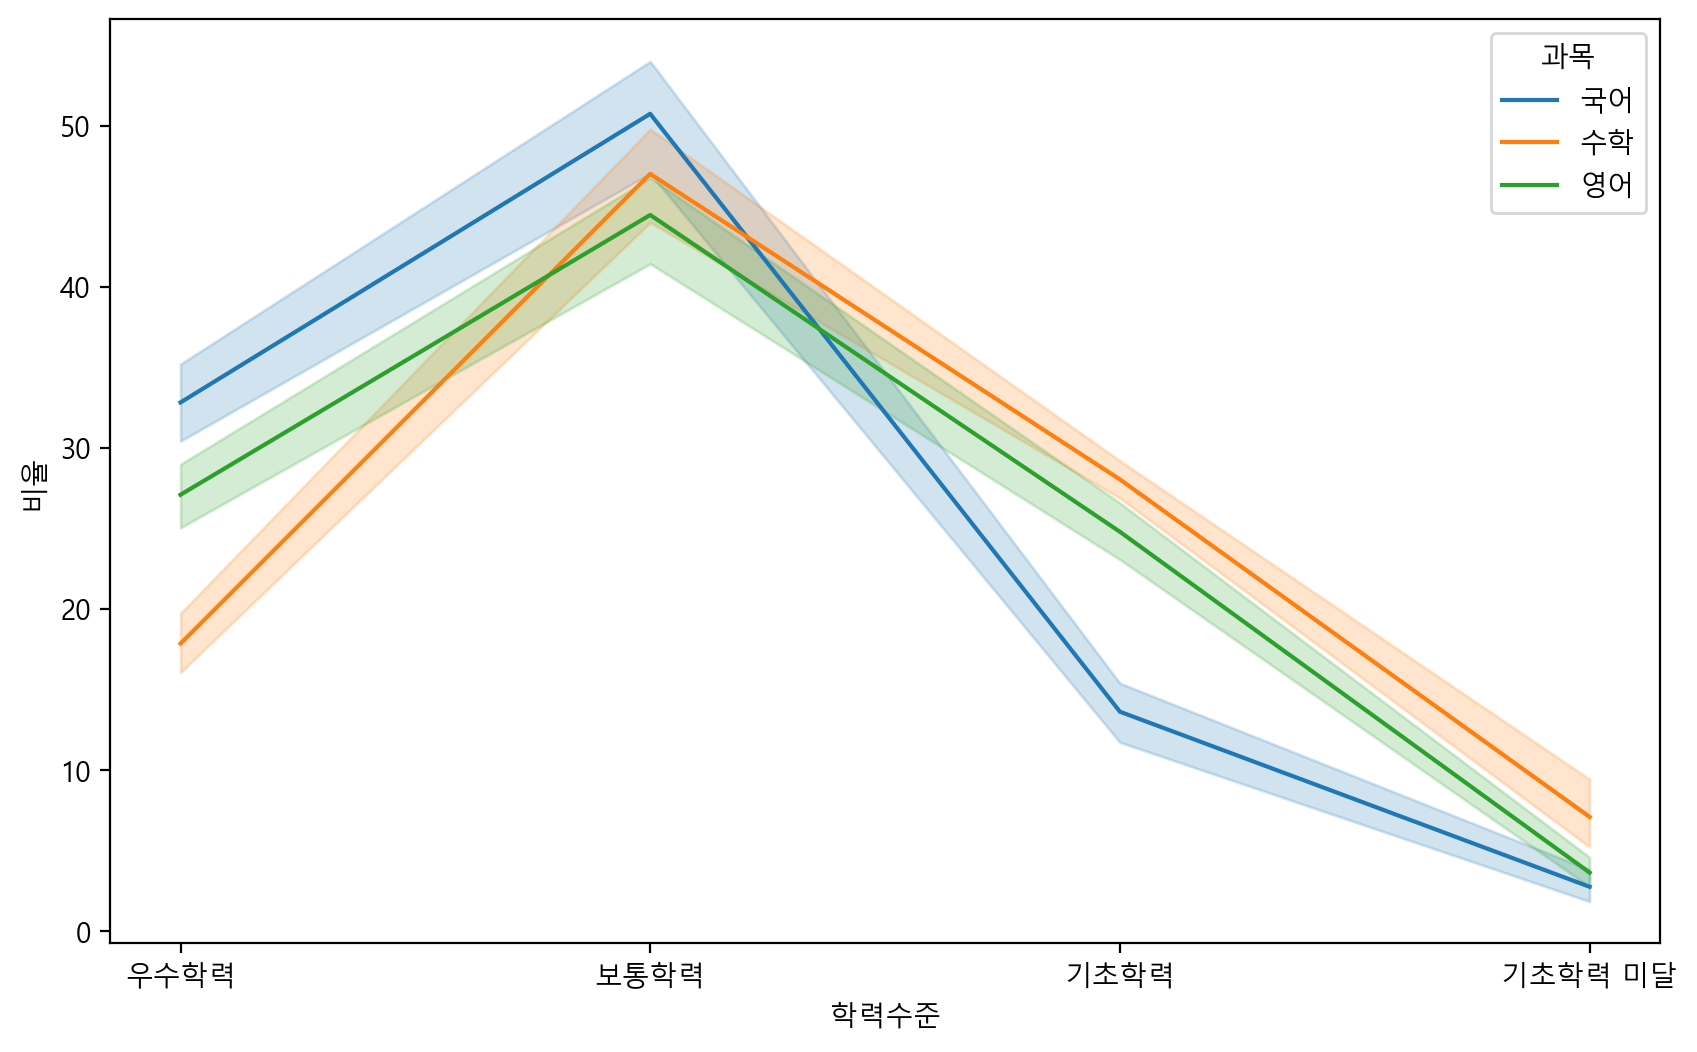

In [290]:
plt.figure(figsize=(10,6))
sns.lineplot(data=mid_achieve_all, x='학력수준', y='비율', hue="과목")

Text(0.5, 1.0, '2011~2020 중학생 학업성취도(기초학력 미달)')

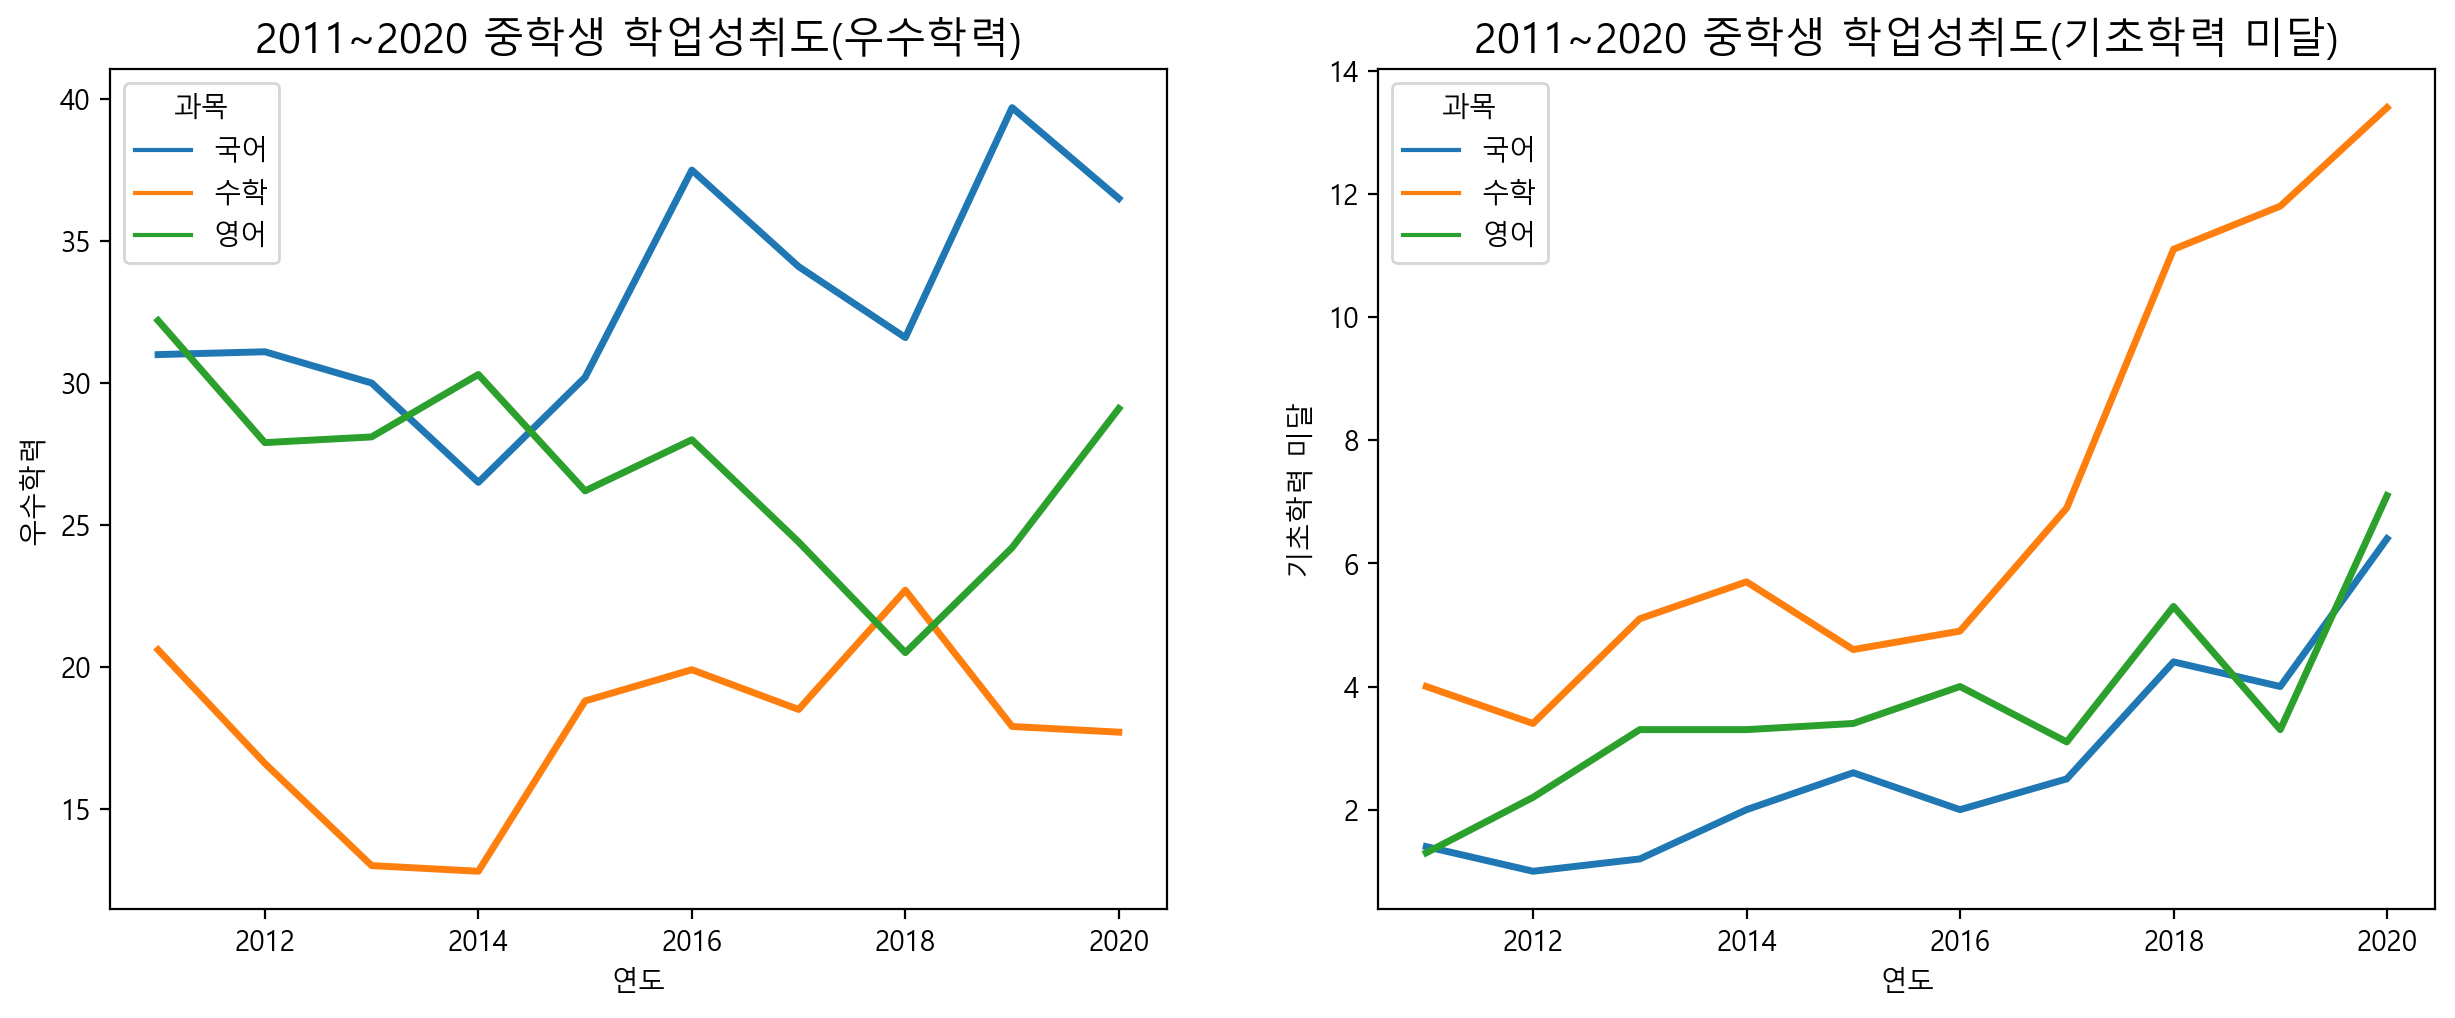

In [291]:
plt.figure(figsize=(15,12))
plt.subplot(221)
sns.lineplot(data=mid_grade, x='연도', y='우수학력', hue='과목', linewidth=2.5)
plt.title('2011~2020 중학생 학업성취도(우수학력)', fontsize=15)

plt.subplot(222)
sns.lineplot(data=mid_grade, x='연도', y='기초학력 미달', hue='과목', linewidth=2.5)
plt.title('2011~2020 중학생 학업성취도(기초학력 미달)', fontsize=15)

Text(0.5, 1.0, '2011~2020 중학생 학업성취도(기초이하)')

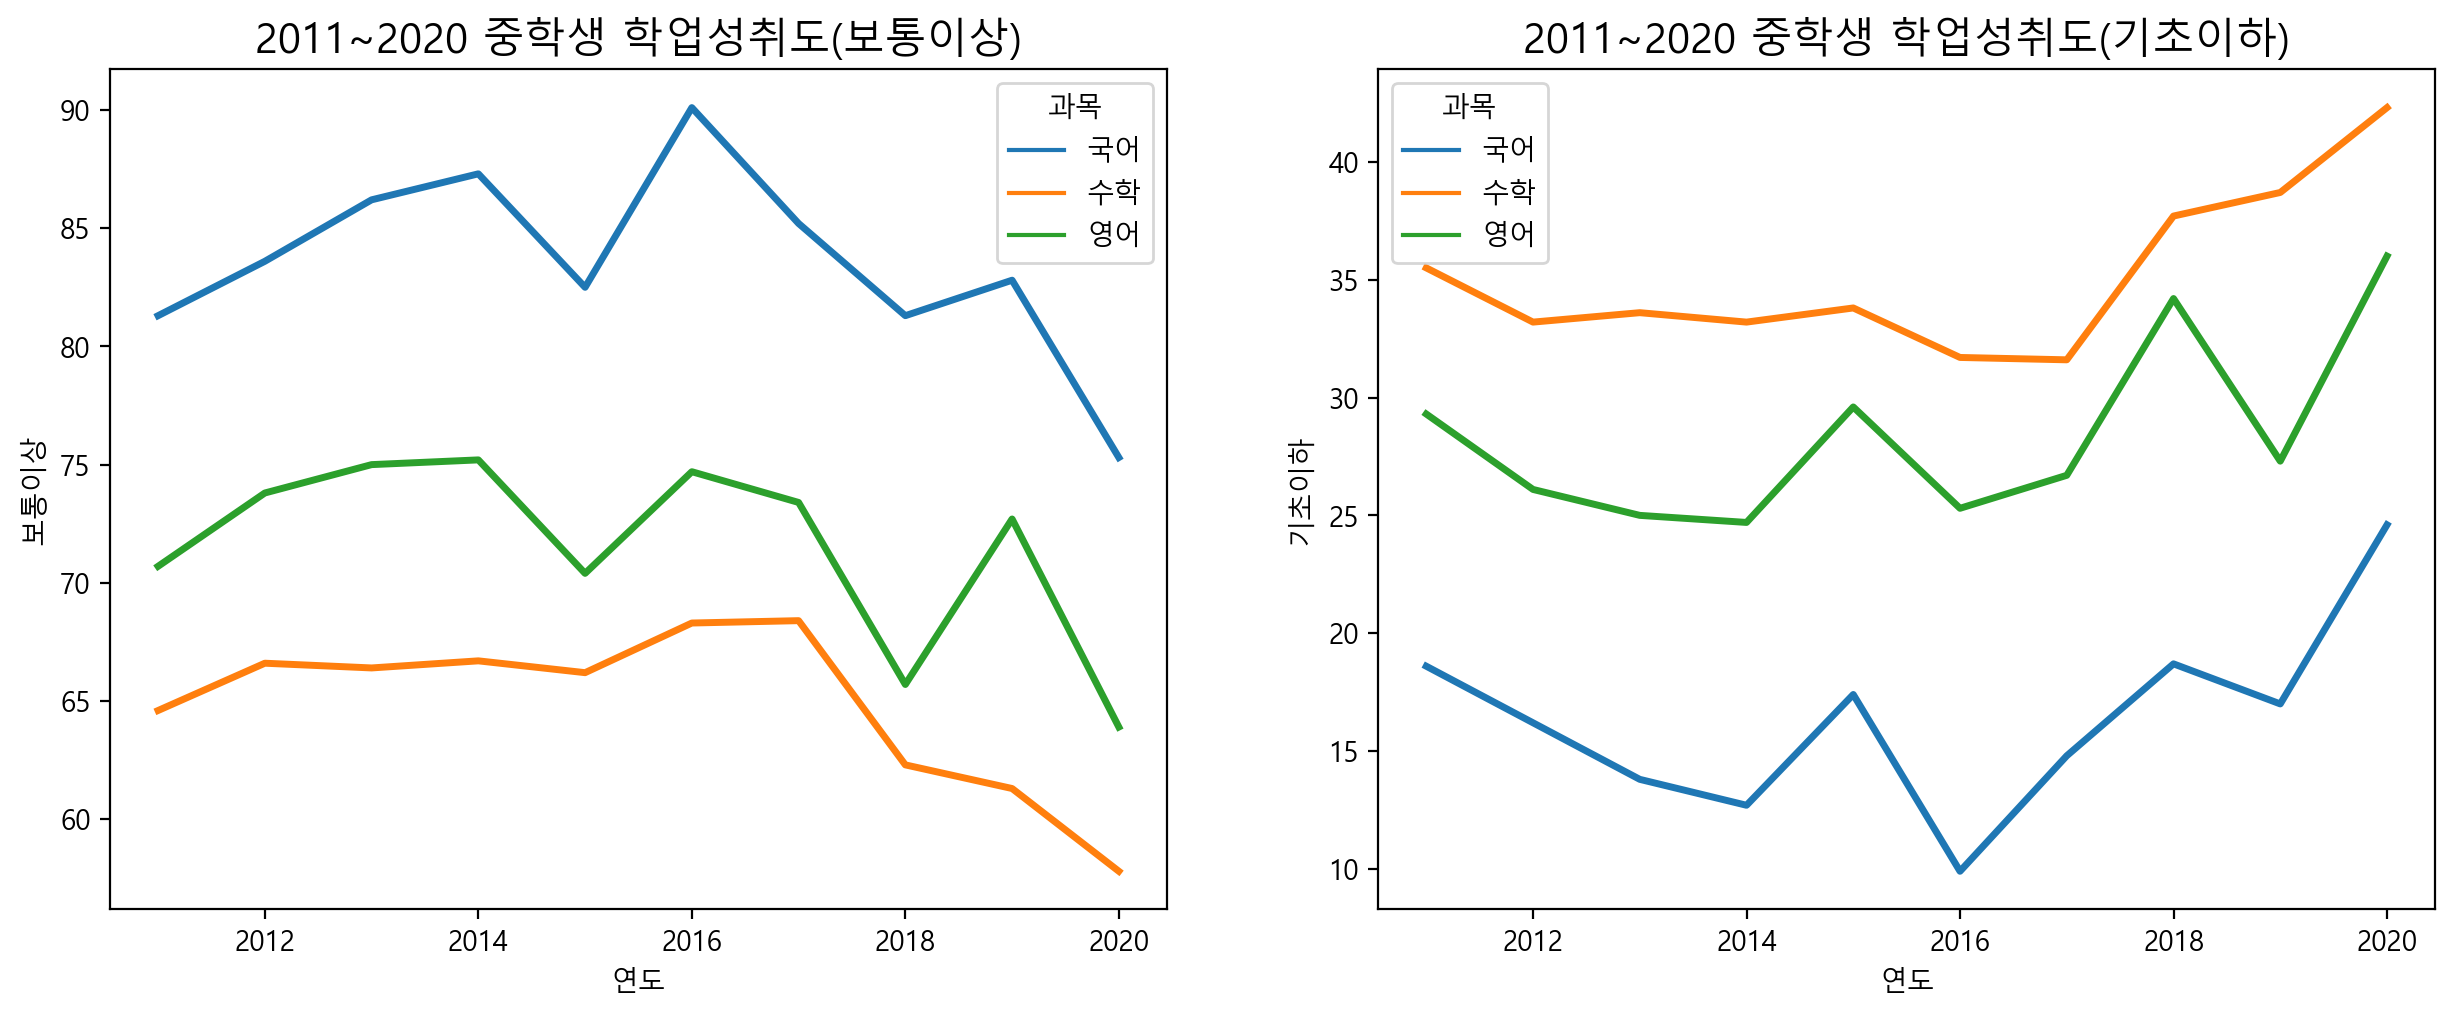

In [292]:
plt.figure(figsize=(15,12))
plt.subplot(221)
sns.lineplot(data=mid_grade, x='연도', y='보통이상', hue='과목', linewidth=2.5)
plt.title('2011~2020 중학생 학업성취도(보통이상)', fontsize=15)

plt.subplot(222)
sns.lineplot(data=mid_grade, x='연도', y='기초이하', hue='과목', linewidth=2.5)
plt.title('2011~2020 중학생 학업성취도(기초이하)', fontsize=15)

### 고등학교 학업 성취도 평가 EDA
**변수명**
- high_grade : 고등학생 학업성취도(학력수준별).csv
- high_achieve_all : 고등학생 학업성취도(melt).csv

In [293]:
high_grade = pd.read_csv('dataset_eda/고등학생 학업성취도(학력수준별).csv')
high_achieve_all = pd.read_csv('dataset_eda/고등학생 학업성취도(melt).csv')

고등학생 학력 수준에 대한 전반적 시각화
- 대체로 국어를 잘하는 편이며 수학을 어려워 하는 경향을 보임
- 2020년에 들어 '국어' 학력수준과 '영어' 학력수준이 떨어지며, '국어' 학력수준의 경우 타의 추종을 불허함
- '학력우수'와 '기초학력 미달' 학생 간의 양극화 경향이 두드러지다 2020년에 들어 급격히 완화됨
- '보통이상'의 학생이 줄어들고 '기초이하'의 학생이 즐어드는 경향을 보임

<AxesSubplot:xlabel='학력수준', ylabel='비율'>

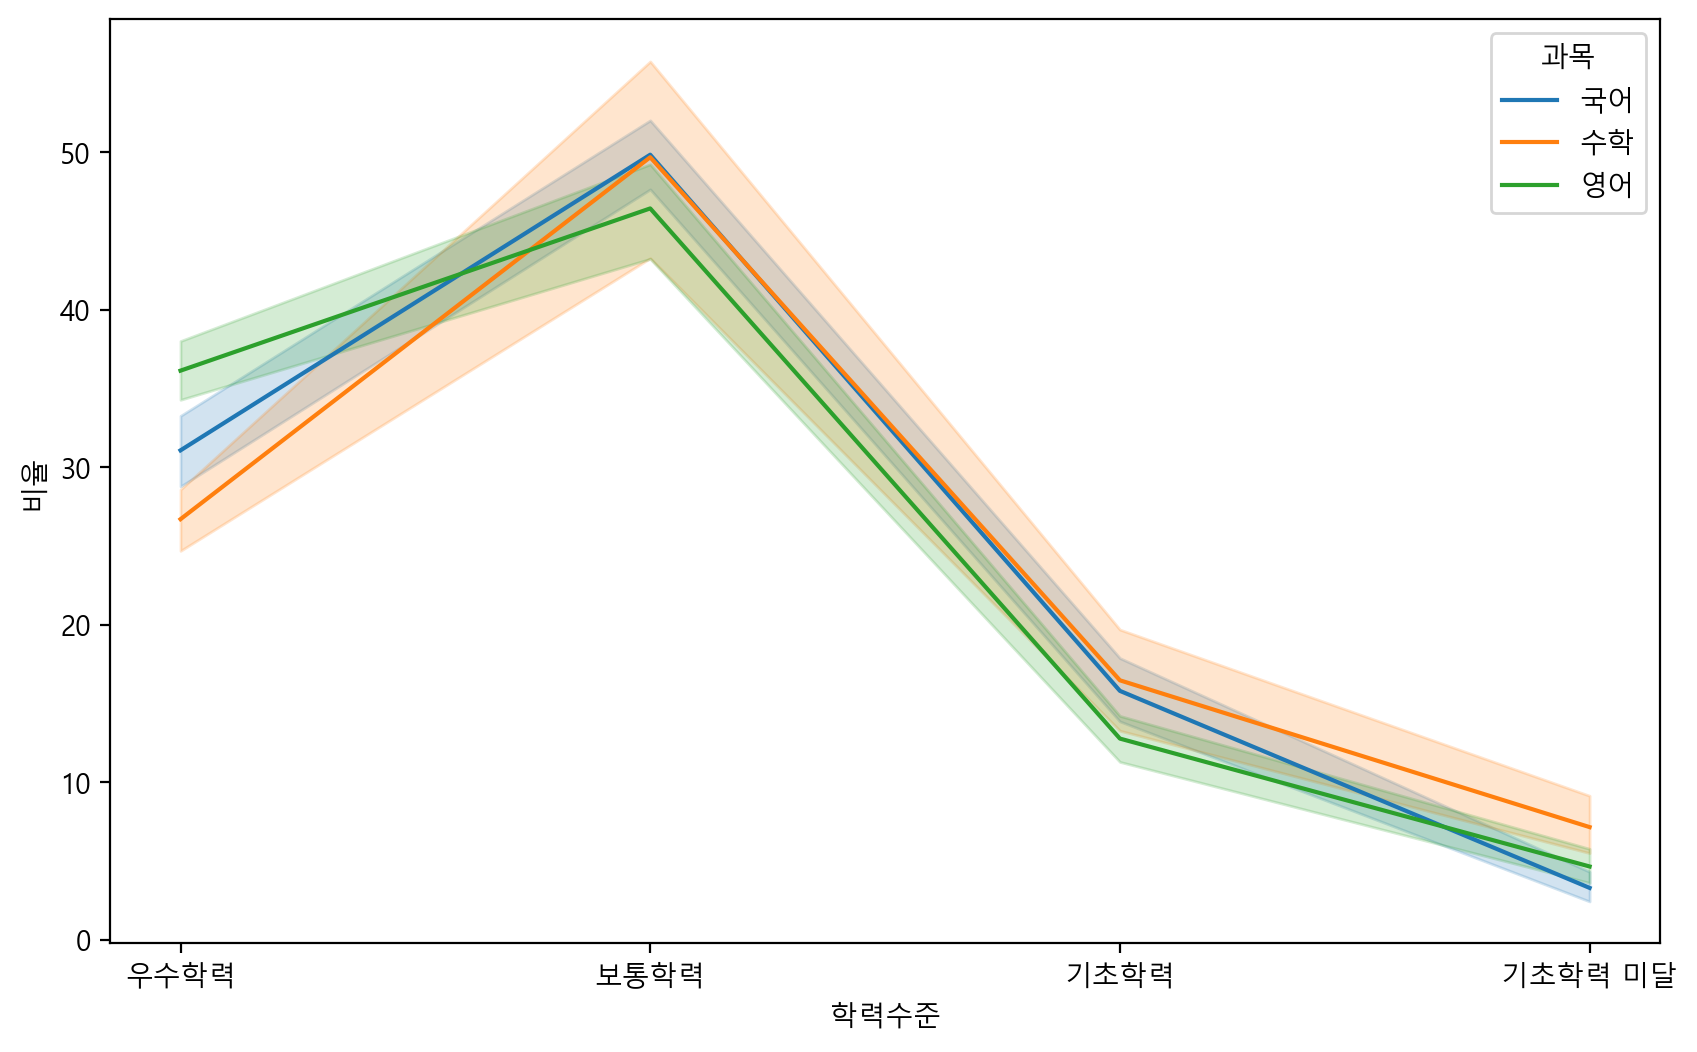

In [294]:
plt.figure(figsize=(10,6))
sns.lineplot(data=high_achieve_all, x='학력수준', y='비율', hue="과목")

Text(0.5, 1.0, '2011~2020 고등학생 학업성취도(기초학력 미달)')

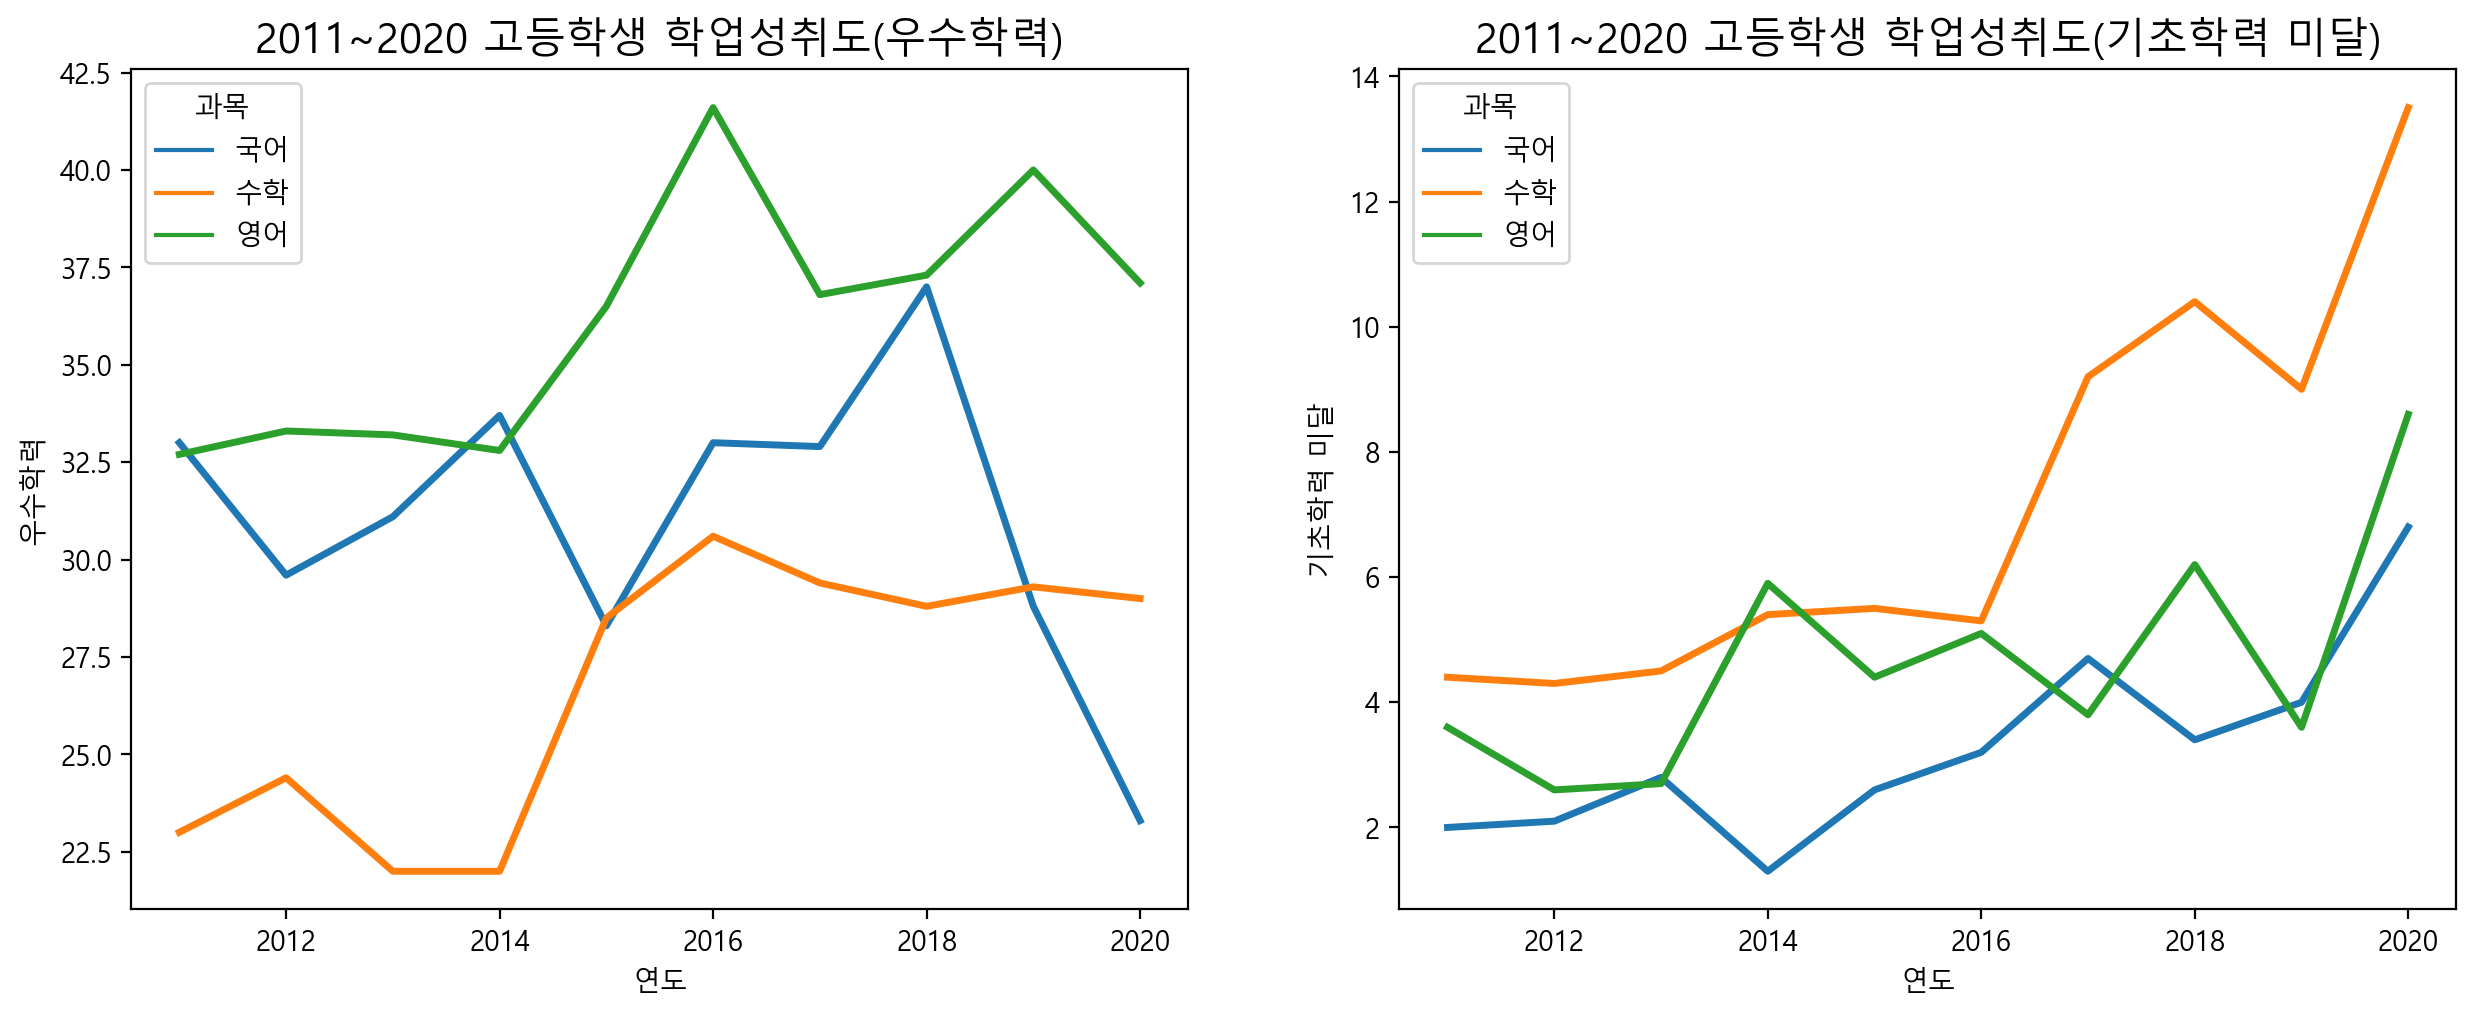

In [295]:
plt.figure(figsize=(15,12))
plt.subplot(221)
sns.lineplot(data=high_grade, x='연도', y='우수학력', hue='과목',
             palette="tab10", linewidth=2.5)
plt.title('2011~2020 고등학생 학업성취도(우수학력)', fontsize=15)


plt.subplot(222)
sns.lineplot(data=high_grade, x='연도', y='기초학력 미달', hue='과목',
             palette="tab10", linewidth=2.5)
plt.title('2011~2020 고등학생 학업성취도(기초학력 미달)', fontsize=15)

Text(0.5, 1.0, '2011~2020 고등학생 학업성취도(기초이하)')

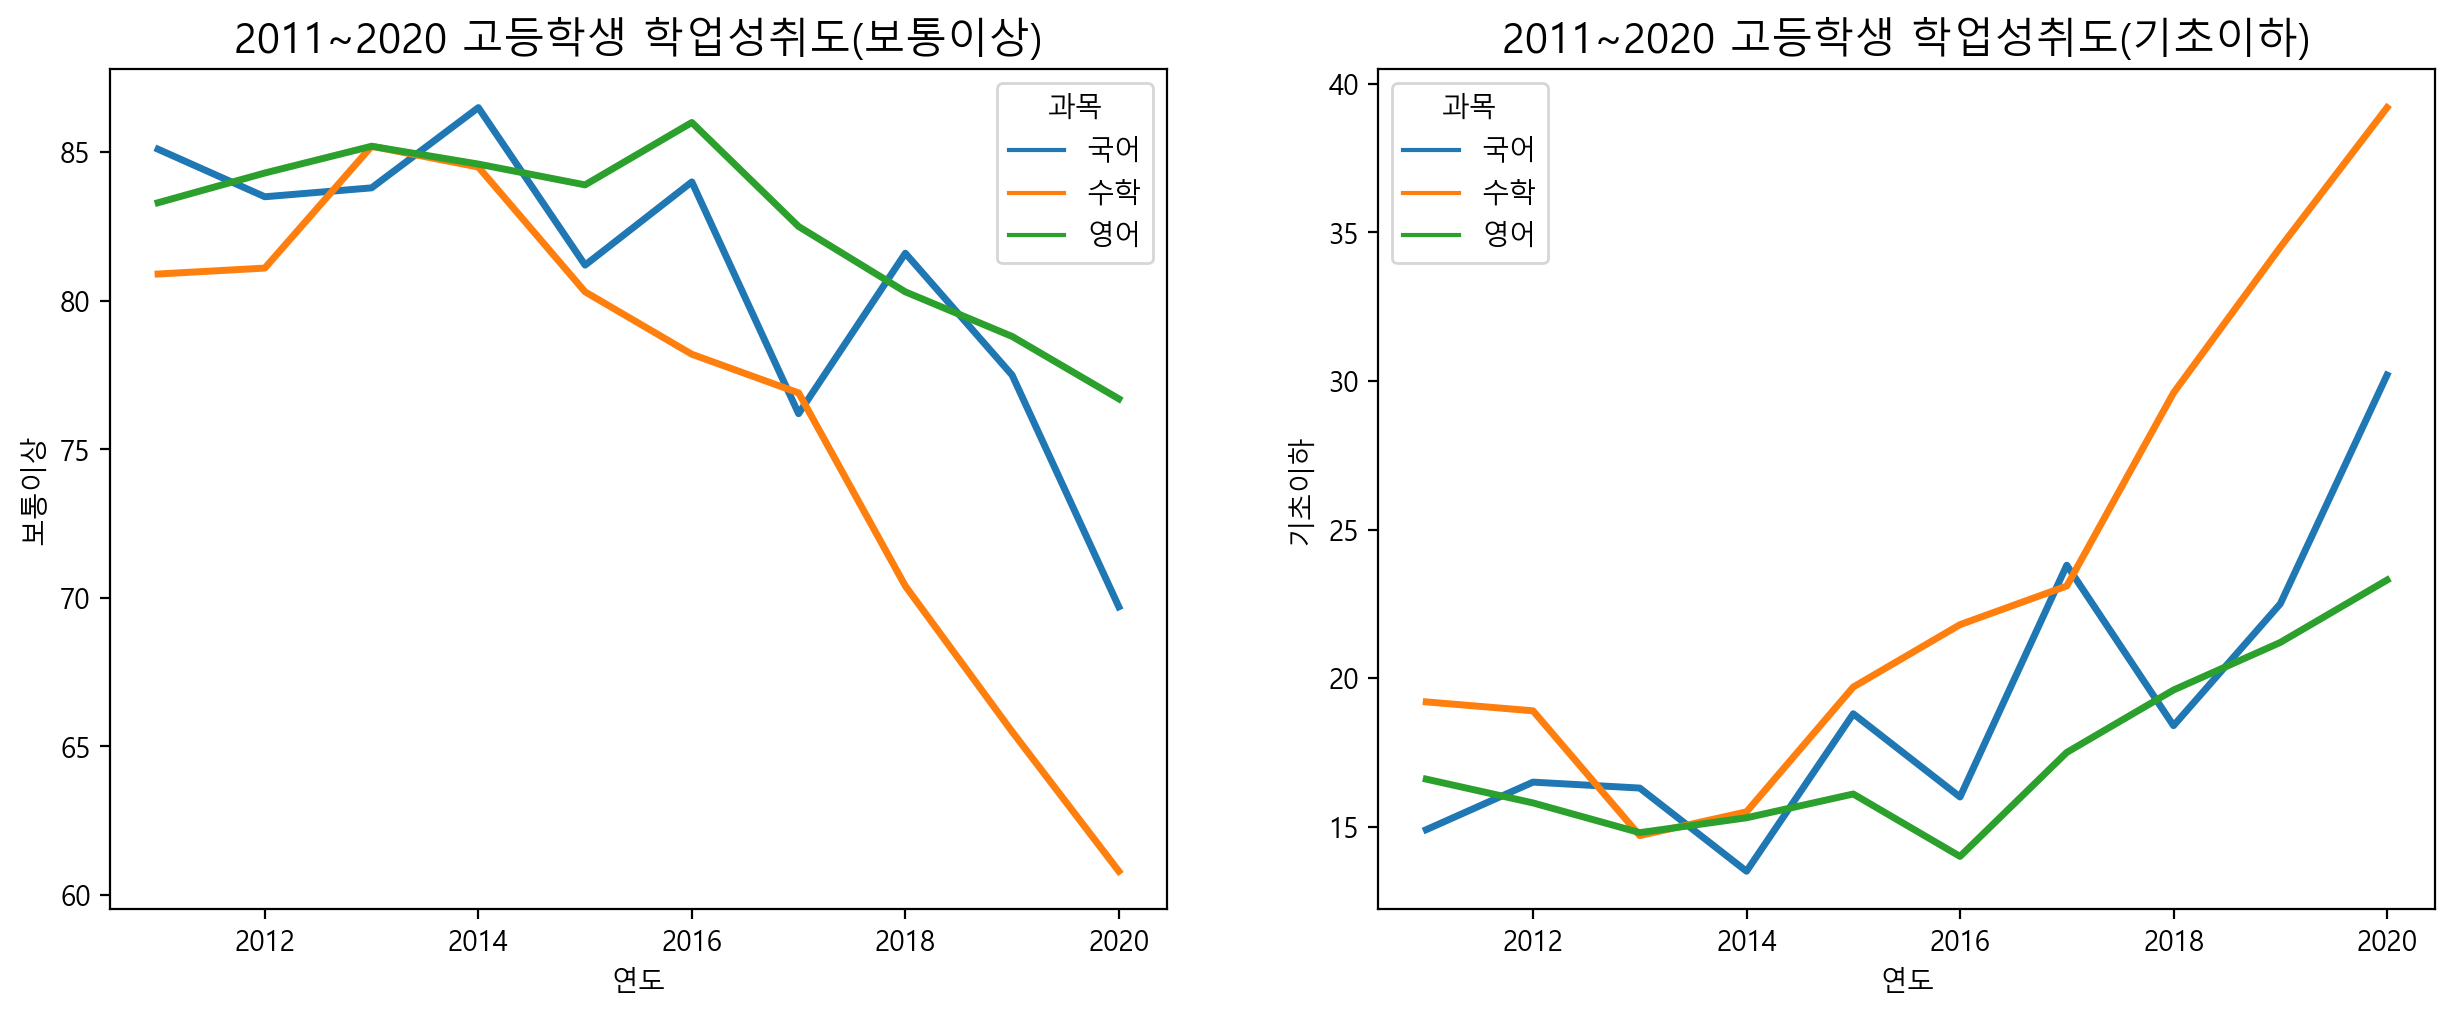

In [296]:
plt.figure(figsize=(15,12))
plt.subplot(221)
sns.lineplot(data=high_grade, x='연도', y='보통이상', hue='과목',
             palette="tab10", linewidth=2.5)
plt.title('2011~2020 고등학생 학업성취도(보통이상)', fontsize=15)


plt.subplot(222)
sns.lineplot(data=high_grade, x='연도', y='기초이하', hue='과목',
             palette="tab10", linewidth=2.5)
plt.title('2011~2020 고등학생 학업성취도(기초이하)', fontsize=15)



### 2011 ~ 2020 사교육 EDA
#### 지역별 1인당 월평균 사교육비
**변수명**
- region_major_mean : 2011~2020 지역별 월평균 국영수 사교육비
- seoul_major_mean : 2011~2020 서울 월평균 국영수 사교육비

In [297]:
# region_major_mean.to_csv('dataset_eda/2011~2020 지역별 월평균 국영수 사교육비.csv', index=False)
region_major_mean = pd.read_csv('dataset_eda/2011~2020 지역별 월평균 국영수 사교육비.csv')

Text(0.5, 1.0, '2011~2020 지역별 월평균 국영수 사교육비')

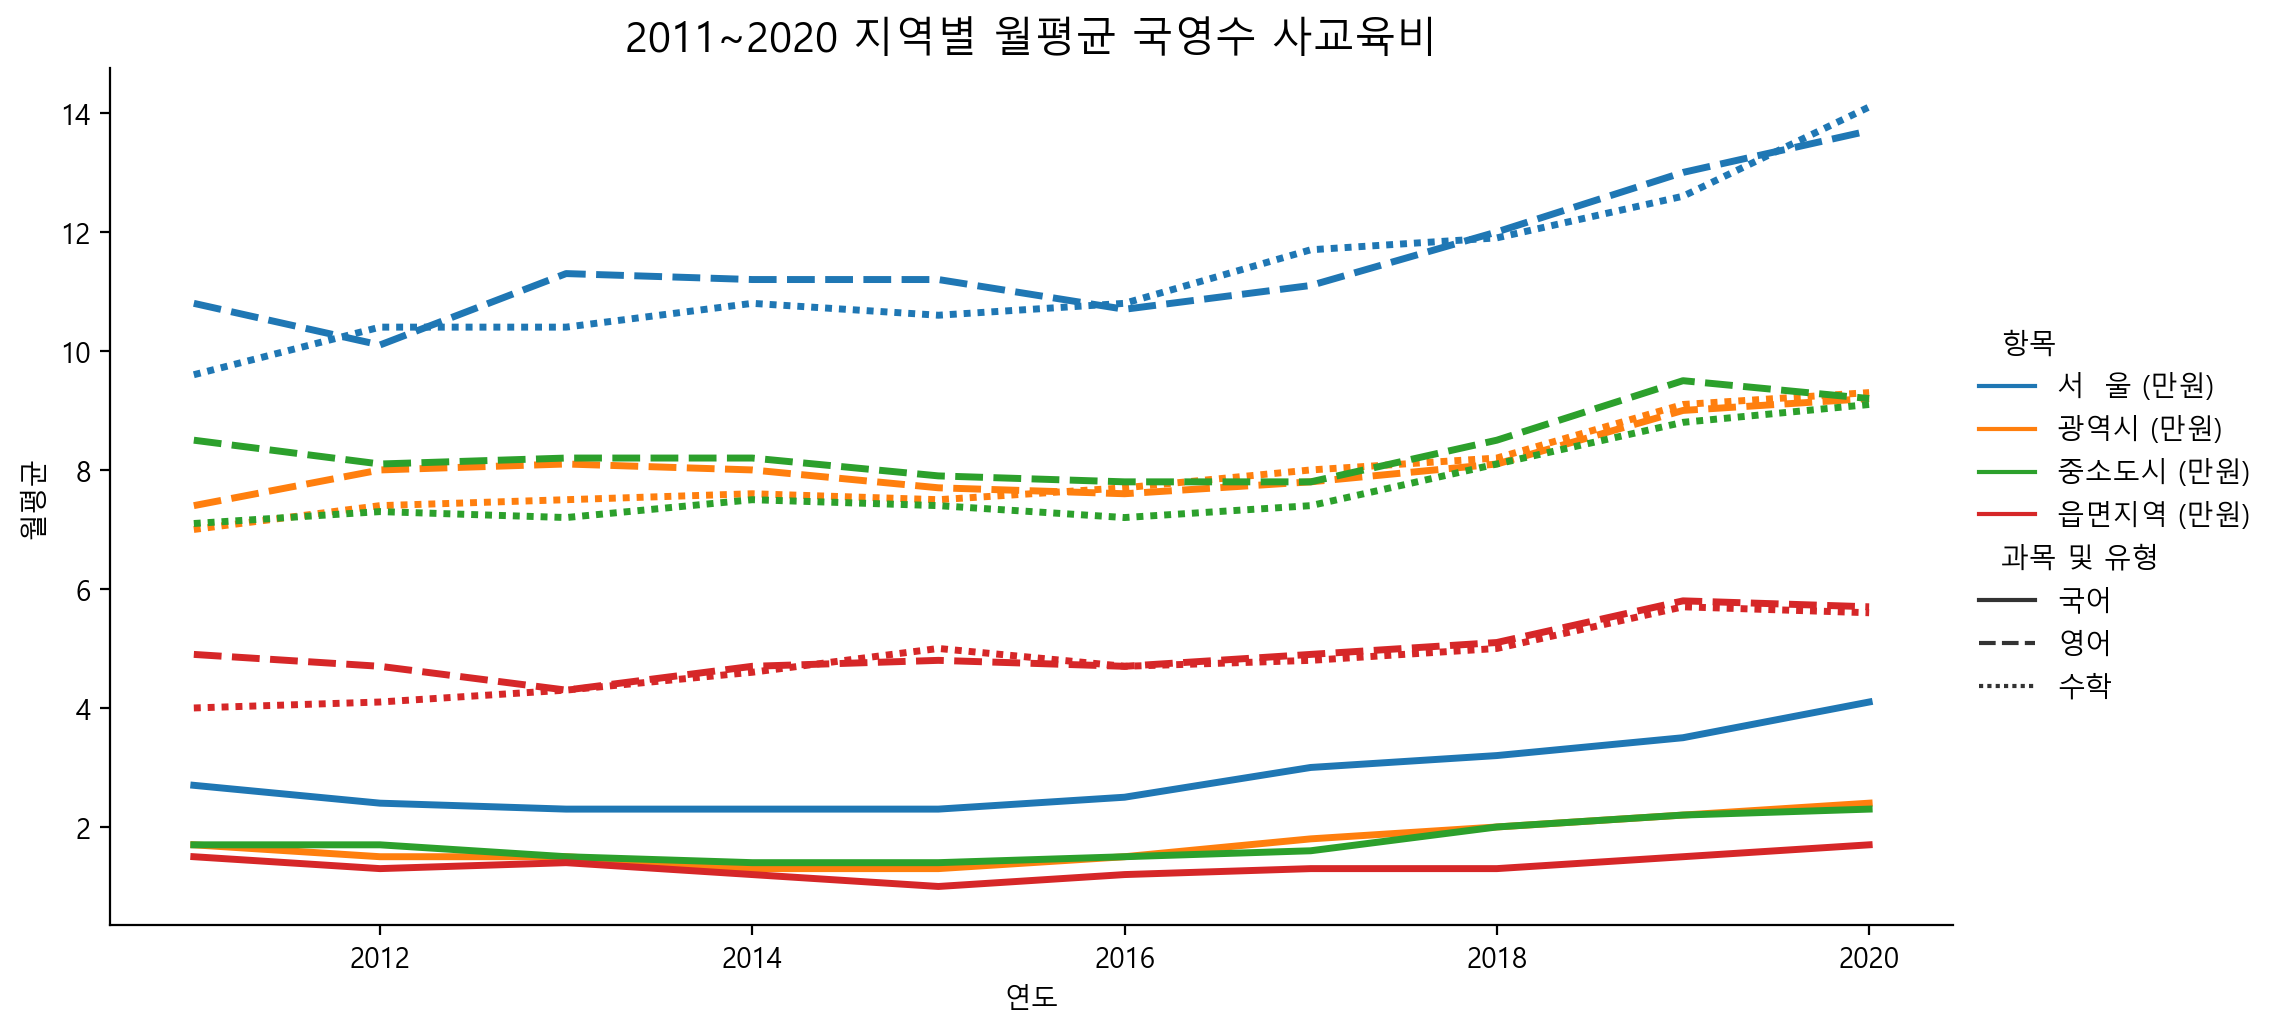

In [298]:
sns.relplot(data=region_major_mean, x='연도', y='월평균',
            hue='항목', style="과목 및 유형", kind="line", linewidth=2.5, aspect=2)
plt.title('2011~2020 지역별 월평균 국영수 사교육비', fontsize=15)


### 전국, 서울 과목별 사교육 참여율
**변수명**
- major_ratio : 2011~2020 전국 및 서울 국영수 사교육 참여율
- seoul_major_ratio : 2011~2020 서울 국영수 사교육 참여율

In [299]:
# major_ratio.to_csv('dataset_eda/2011~2020 전국 및 서울 국영수 사교육 참여율.csv', index=False)
major_ratio = pd.read_csv('dataset_eda/2011~2020 전국 및 서울 국영수 사교육 참여율.csv')

Text(0.5, 1.0, '2011~2020 전국 및 서울 국영수 사교육 참여율')

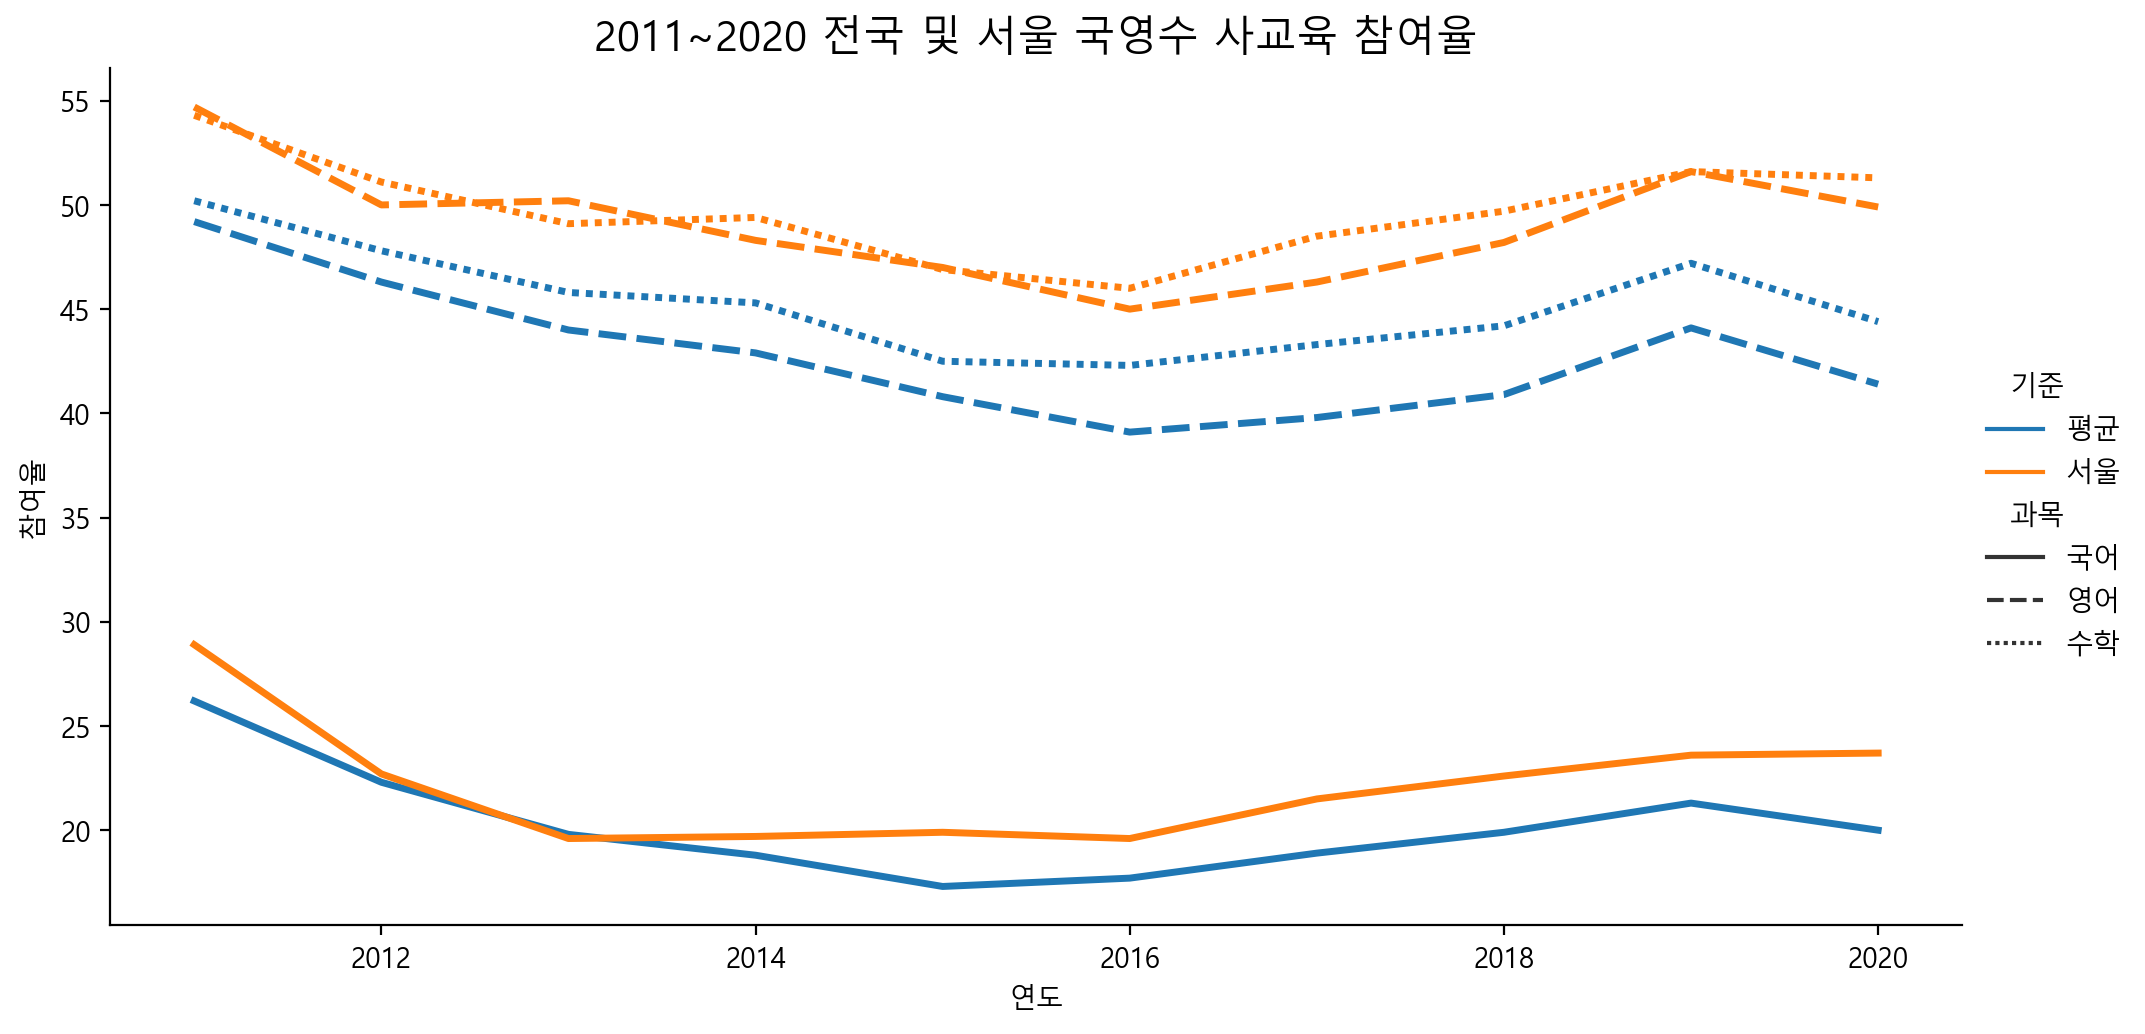

In [300]:
sns.relplot(data=major_ratio, x='연도', y='참여율',
            hue='기준', style="과목", kind="line", linewidth=2.5, aspect=2)
plt.title('2011~2020 전국 및 서울 국영수 사교육 참여율', fontsize=15)

### 수시 정시 비율
**변수명**
- entrance : 전국 및 서울대 수시정시비율

In [301]:
# entrance.to_csv('dataset_eda/전국 및 서울대 수시정시비율.csv')
entrance = pd.read_csv('dataset_eda/전국 및 서울대 수시정시비율.csv')
entrance['연도'] = [i for i in range(2011,2021)]
entrance = entrance.set_index('연도')

Text(0.5, 1.0, '')

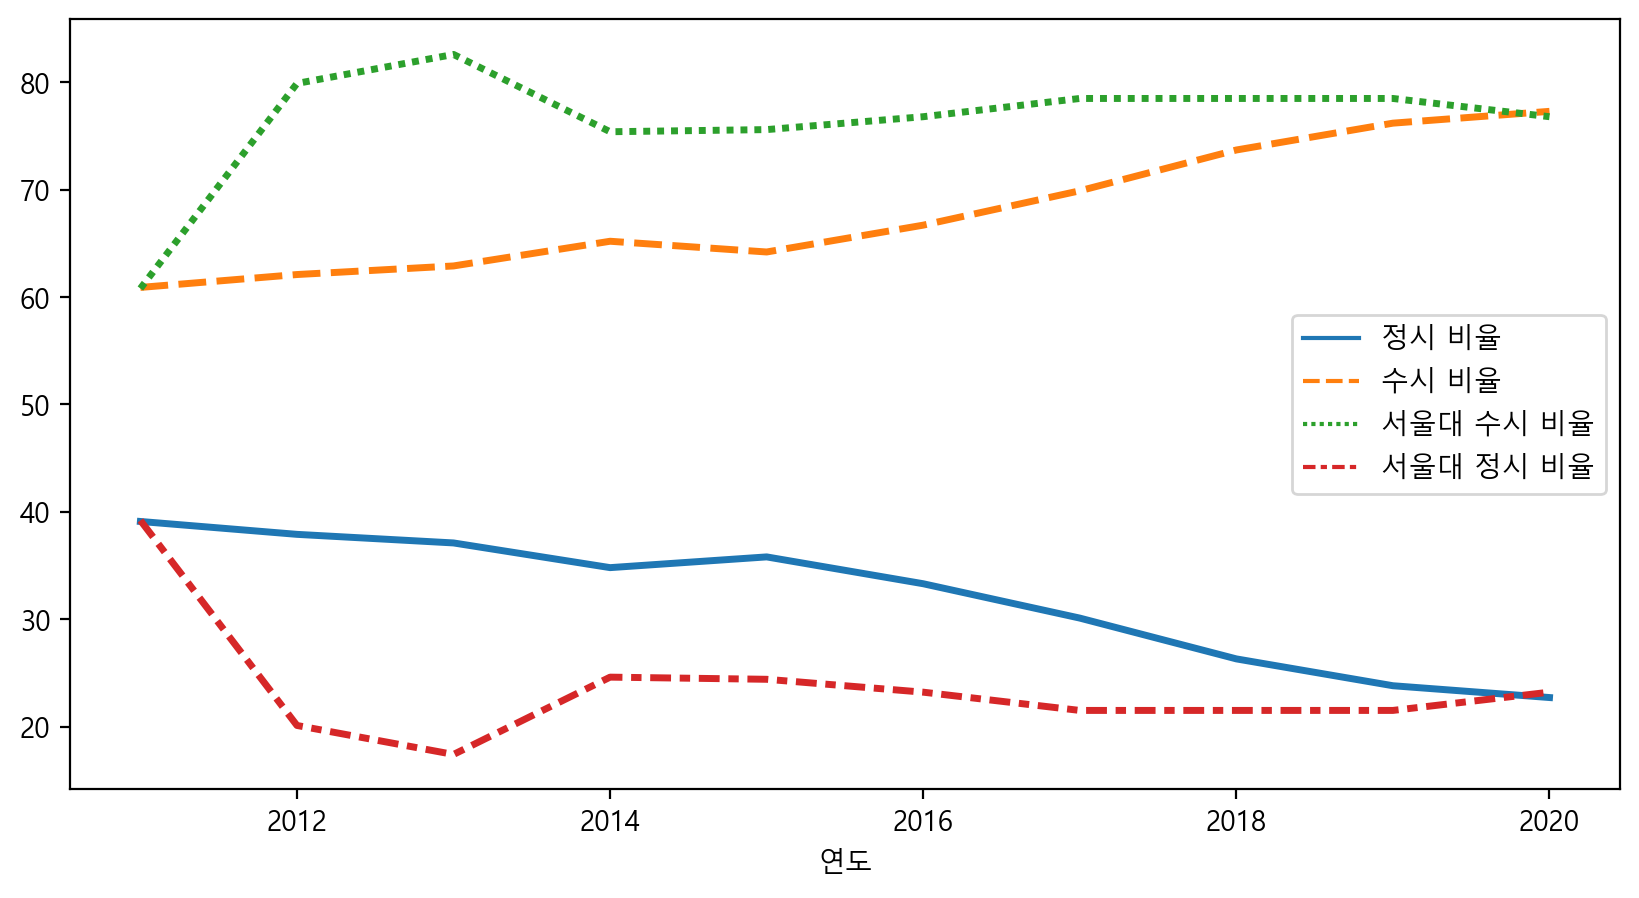

In [302]:
plt.figure(figsize=(10,5))
sns.lineplot(data=entrance, linewidth=2.5)
plt.title('')

### 서울 중고등학교 사교육비 및 사교육 참여율
**변수명**
- seoul_high_middle_privat_edu : 2011~2020 서울 중고등 사교육 참여율 및 사교육비

In [303]:
# seoul_high_middle_privat_edu.to_csv('dataset_eda/2011~2020 서울 중고등 사교육 참여율 및 사교육비.csv')
seoul_high_middle_privat_edu = pd.read_csv('dataset_eda/2011~2020 서울 중고등 사교육 참여율 및 사교육비.csv').set_index('연도')

<AxesSubplot:xlabel='연도'>

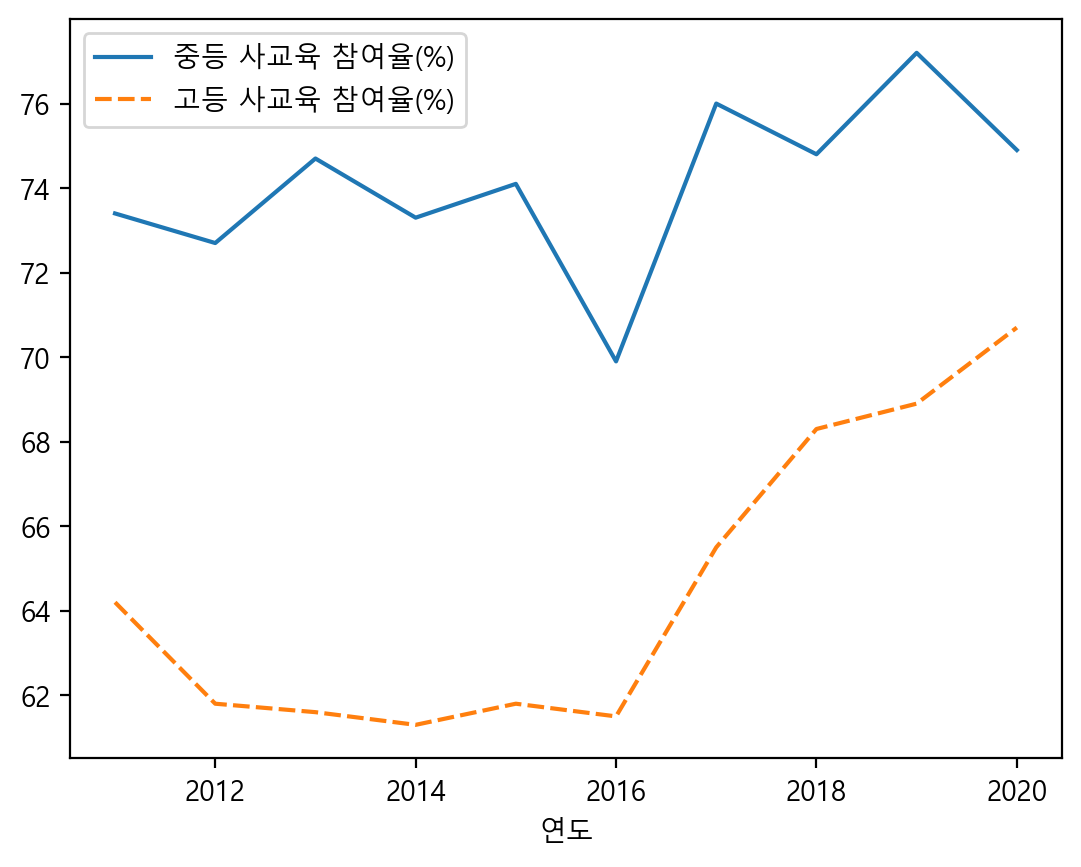

In [304]:
sns.lineplot(data=seoul_high_middle_privat_edu[['중등 사교육 참여율(%)', '고등 사교육 참여율(%)']])

<AxesSubplot:xlabel='연도'>

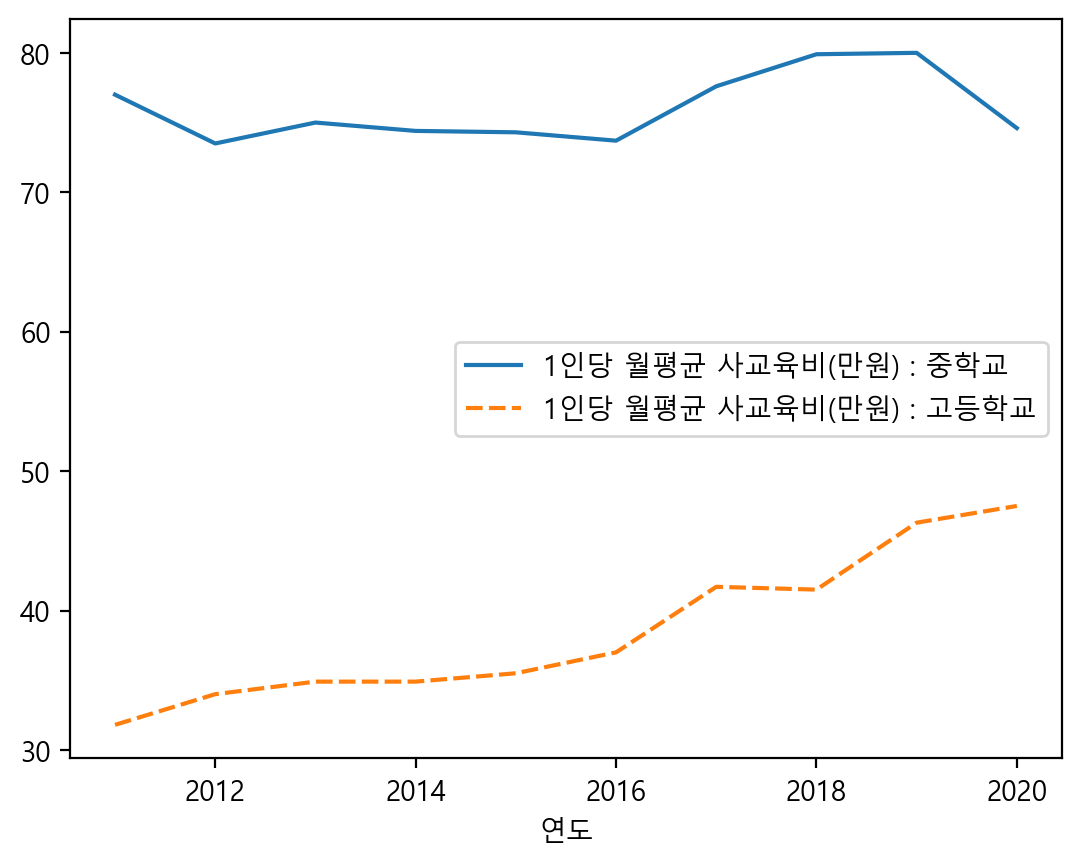

In [305]:
sns.lineplot(data=seoul_high_middle_privat_edu[['1인당 월평균 사교육비(만원) : 중학교',
                                                '1인당 월평균 사교육비(만원) : 고등학교']])

### 사교육과 수시정시 비율 간의 상관관계

Text(0.5, 1.0, '2011~2020 사교육과 수시 비율')

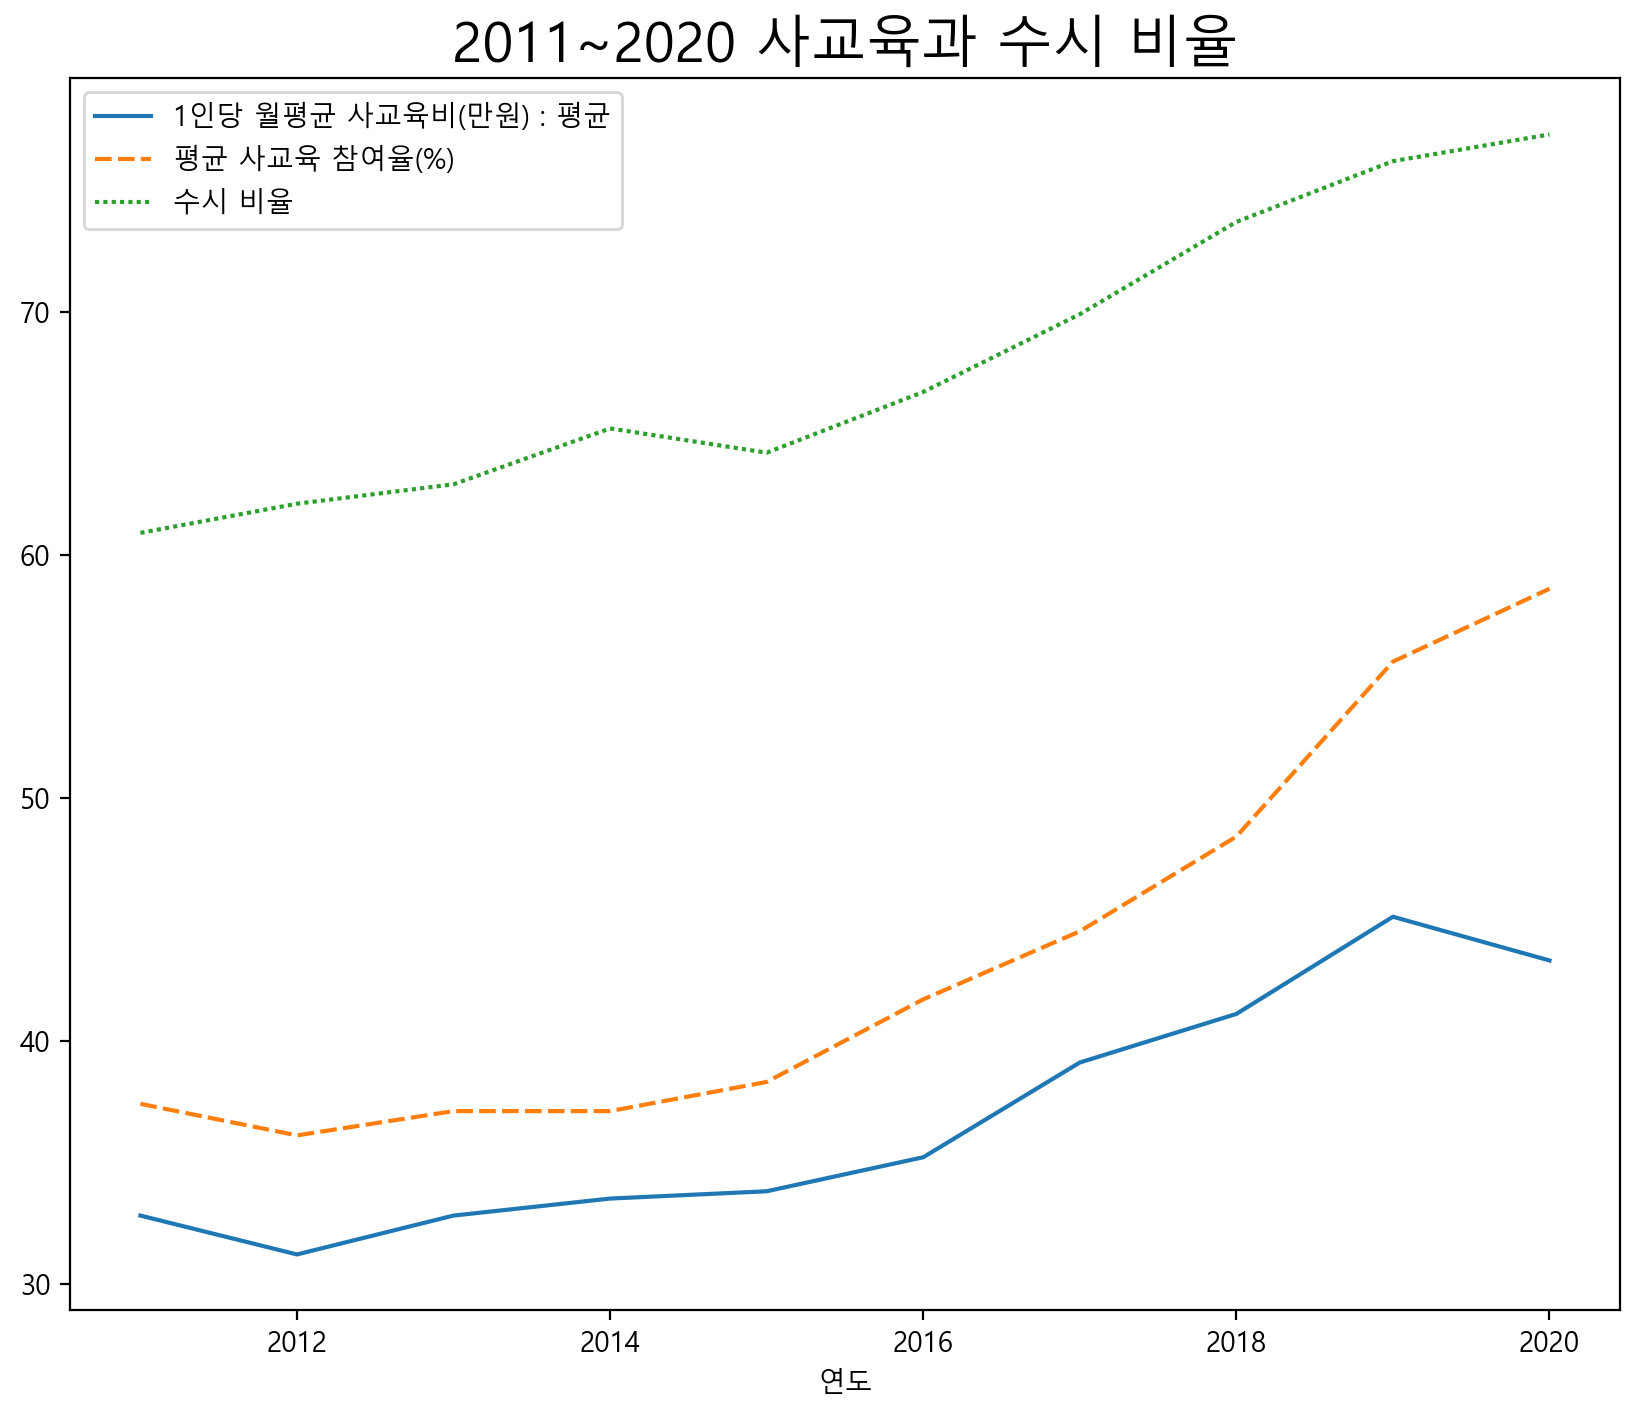

In [306]:
privat_edu_entrance = pd.concat([seoul_high_middle_privat_edu, entrance], axis=1)

plt.figure(figsize=(10, 8))
sns.lineplot(data=privat_edu_entrance[['1인당 월평균 사교육비(만원) : 평균', '평균 사교육 참여율(%)', '수시 비율']])
plt.title('2011~2020 사교육과 수시 비율', fontsize=20)

In [307]:
seoul_major_ratio = major_ratio[major_ratio['기준'] == '서울']
# 서울 내 국어 참여율과 월평균 비용
korean_seoul_mean =  seoul_major_mean[seoul_major_mean['과목 및 유형'] == '국어'].reset_index(drop=True)
korean_seoul_ratio = seoul_major_ratio[seoul_major_ratio['과목']=='국어'].reset_index(drop=True)
korean_seoul = pd.concat([korean_seoul_mean[['연도', '월평균']].set_index('연도'), 
                         korean_seoul_ratio[['연도', '참여율']].set_index('연도')], axis=1)

# 서울 내 수학 참여율과 월평균 비용
math_seoul_mean =  seoul_major_mean[seoul_major_mean['과목 및 유형'] == '수학'].reset_index(drop=True)
math_seoul_ratio = seoul_major_ratio[seoul_major_ratio['과목']=='수학'].reset_index(drop=True)
math_seoul = pd.concat([math_seoul_mean[['연도', '월평균']].set_index('연도'),
                        math_seoul_ratio[['연도', '참여율']].set_index('연도')], axis=1)

# 서울 내 영어 참여율과 월평균 비용
english_seoul_mean =  seoul_major_mean[seoul_major_mean['과목 및 유형'] == '영어'].reset_index(drop=True)
english_seoul_ratio = seoul_major_ratio[seoul_major_ratio['과목']=='영어'].reset_index(drop=True)
english_seoul = pd.concat([english_seoul_mean[['연도', '월평균']].set_index('연도'), 
                           english_seoul_ratio[['연도', '참여율']].set_index('연도')], axis=1)

Text(0.5, 1.0, '고등학교 국어 과목과 수시정시, 사교육의 상관관계')

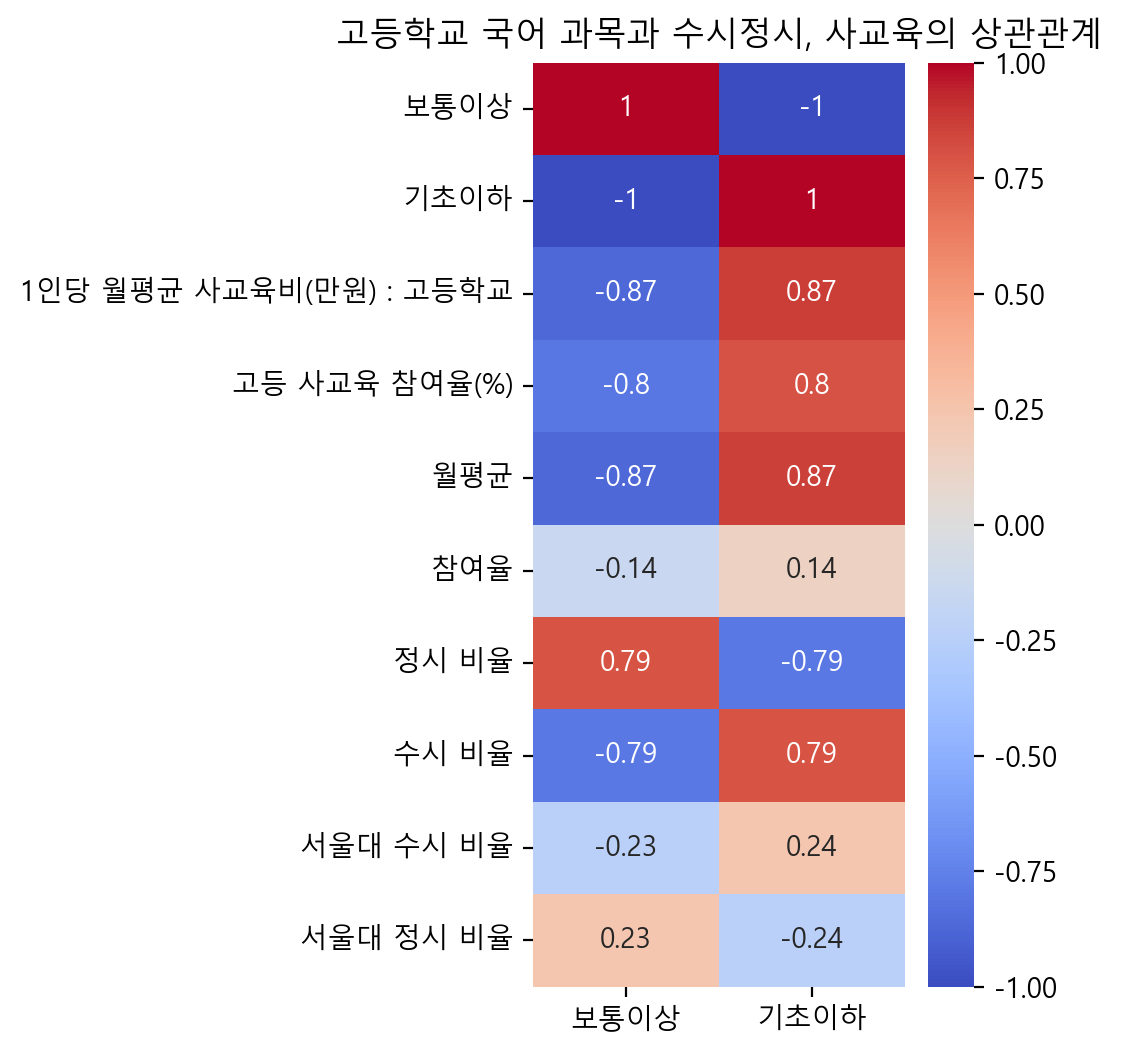

In [308]:
korean_high_grade = high_grade[high_grade['과목']=='국어'][['연도', '보통이상', '기초이하']].set_index('연도')
korean_high_grade = pd.concat([korean_high_grade,
                               seoul_high_middle_privat_edu[['1인당 월평균 사교육비(만원) : 고등학교', 
                                                             '고등 사교육 참여율(%)']]], axis=1)
korean_high_grade = pd.concat([korean_high_grade, korean_seoul], axis=1)
korean_high_grade = pd.concat([korean_high_grade, entrance], axis=1)



plt.figure(figsize=(3, 6))
sns.heatmap(korean_high_grade.corr()[['보통이상', '기초이하']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('고등학교 국어 과목과 수시정시, 사교육의 상관관계', fontsize=12)

Text(0.5, 1.0, '고등학교 수학 과목과 수시정시, 사교육의 상관관계')

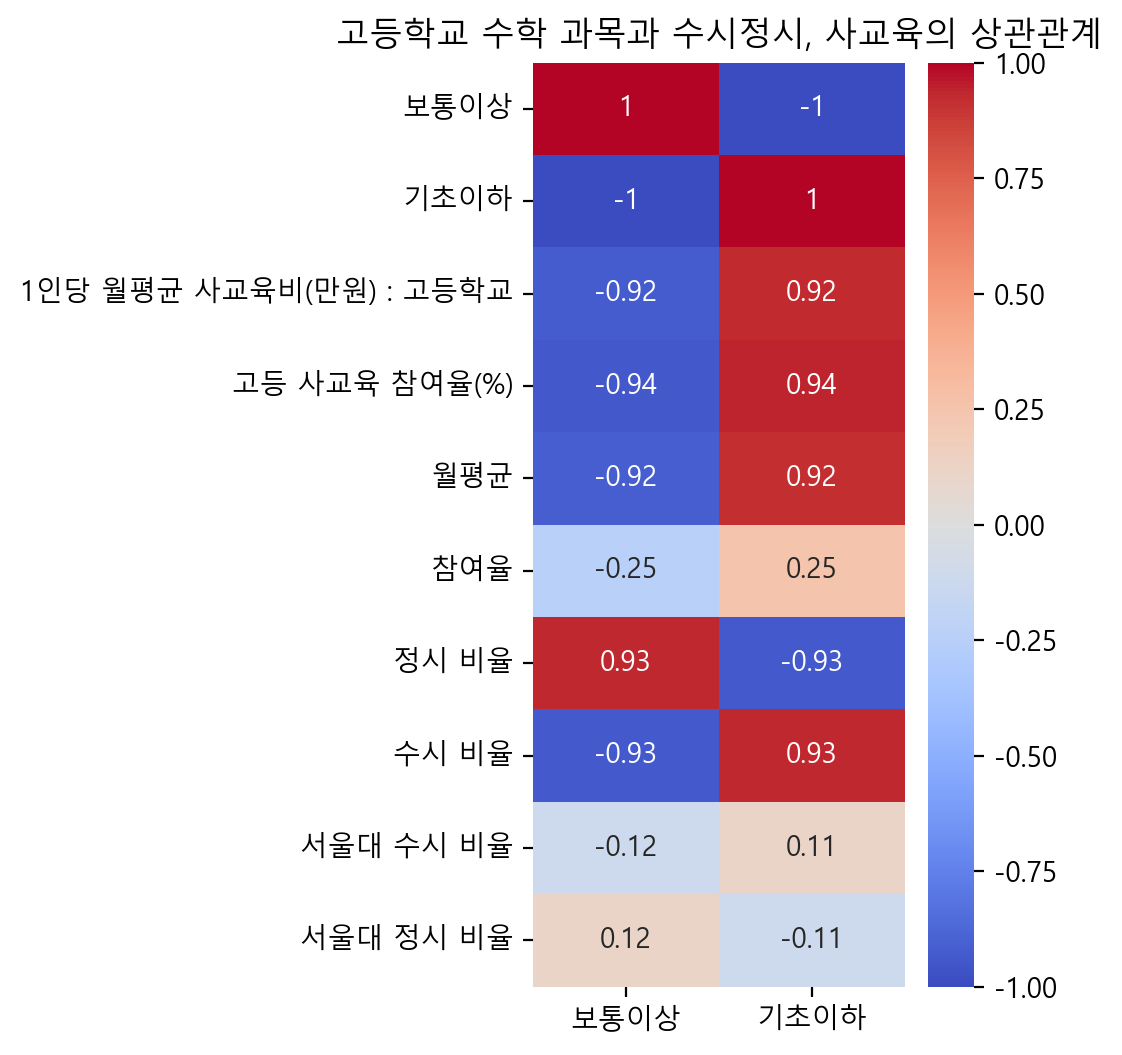

In [309]:
math_high_grade = high_grade[high_grade['과목']=='수학'][['연도', '보통이상', '기초이하']].set_index('연도')
math_high_grade = pd.concat([math_high_grade,
          seoul_high_middle_privat_edu[['1인당 월평균 사교육비(만원) : 고등학교', '고등 사교육 참여율(%)']]],
          axis=1)
math_high_grade = pd.concat([math_high_grade, math_seoul], axis=1)
math_high_grade = pd.concat([math_high_grade, entrance], axis=1)

plt.figure(figsize=(3, 6))
sns.heatmap(math_high_grade.corr()[['보통이상', '기초이하']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('고등학교 수학 과목과 수시정시, 사교육의 상관관계', fontsize=12)

Text(0.5, 1.0, '2011~2020 고등학생 수학 성취도')

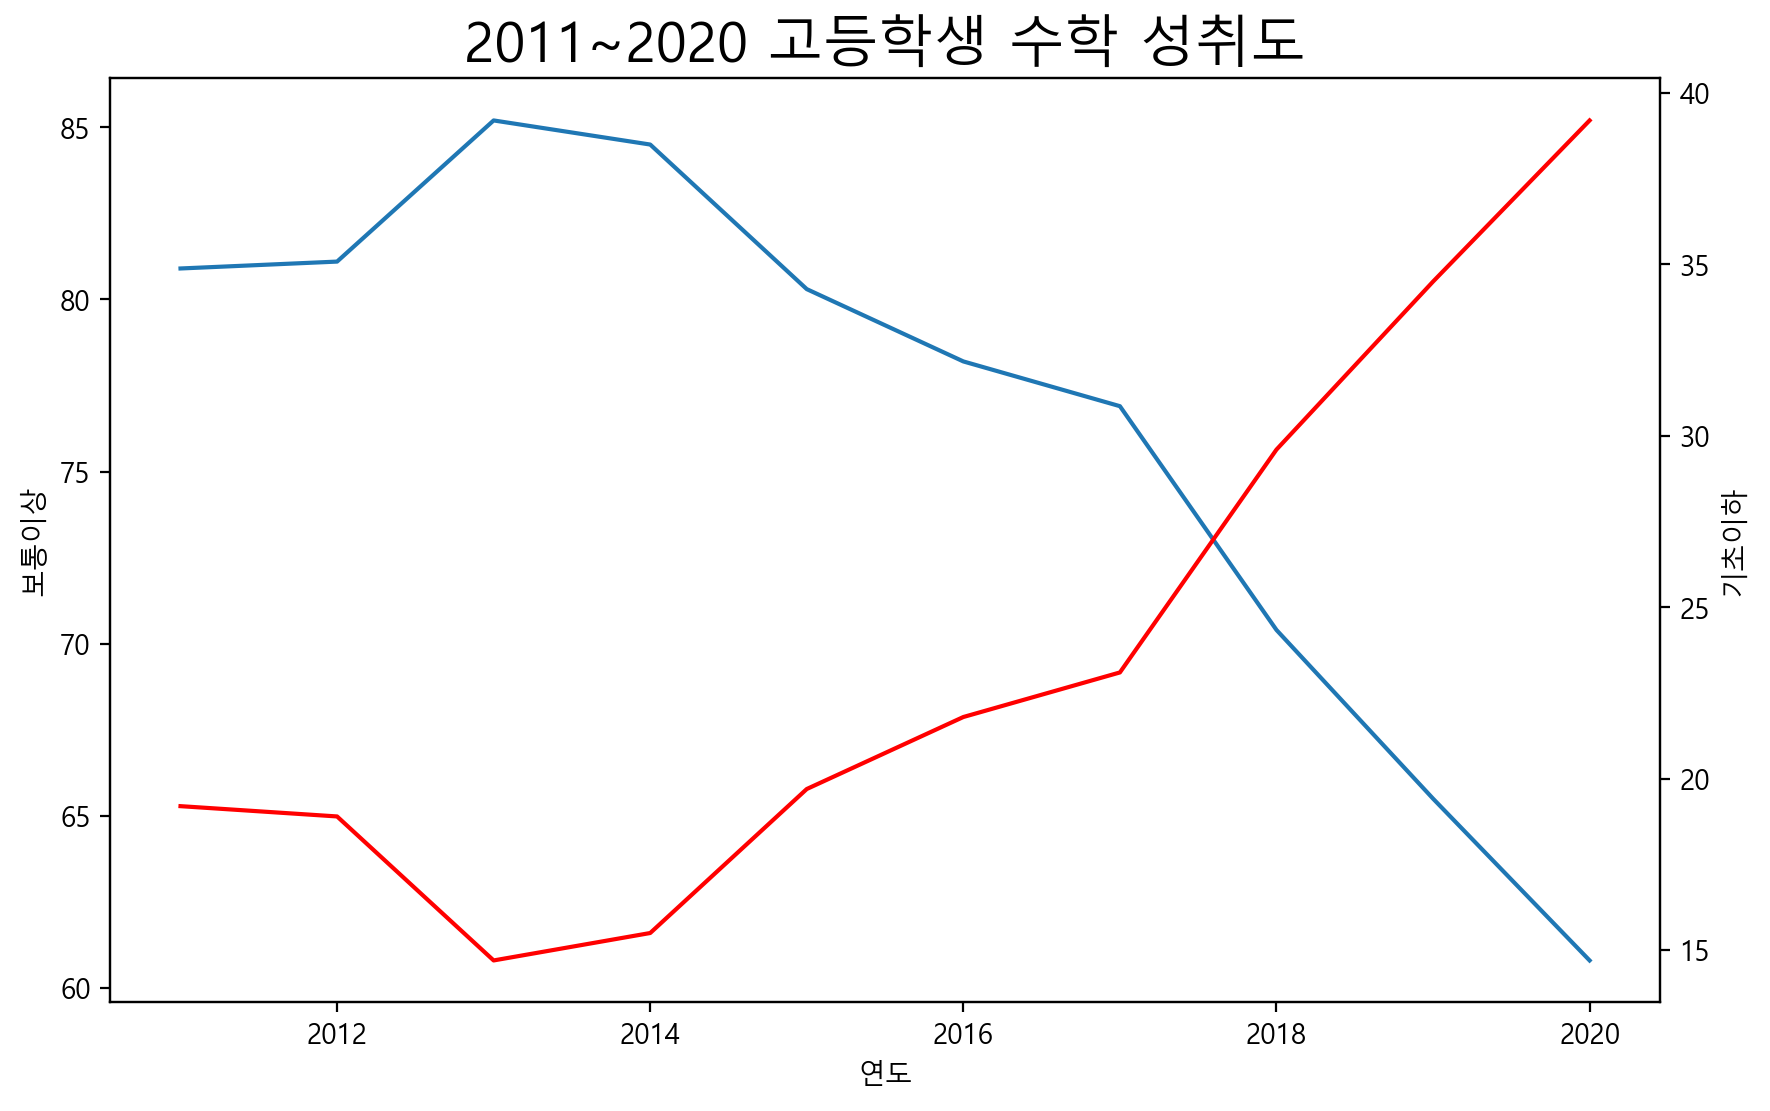

In [310]:
plt.figure(figsize=(10, 6))
pr_p = sns.lineplot(data=math_high_grade[['보통이상', '기초이하']], 
                    x="연도", y="보통이상", palette="Blue")
pr_c = pr_p.twinx()
pr_c = sns.lineplot(data=math_high_grade[['보통이상', '기초이하']],
                    x="연도", y="기초이하", color="Red")
plt.title('2011~2020 고등학생 수학 성취도', fontsize=20)

Text(0.5, 1.0, '고등학교 영어 과목과 수시정시, 사교육의 상관관계')

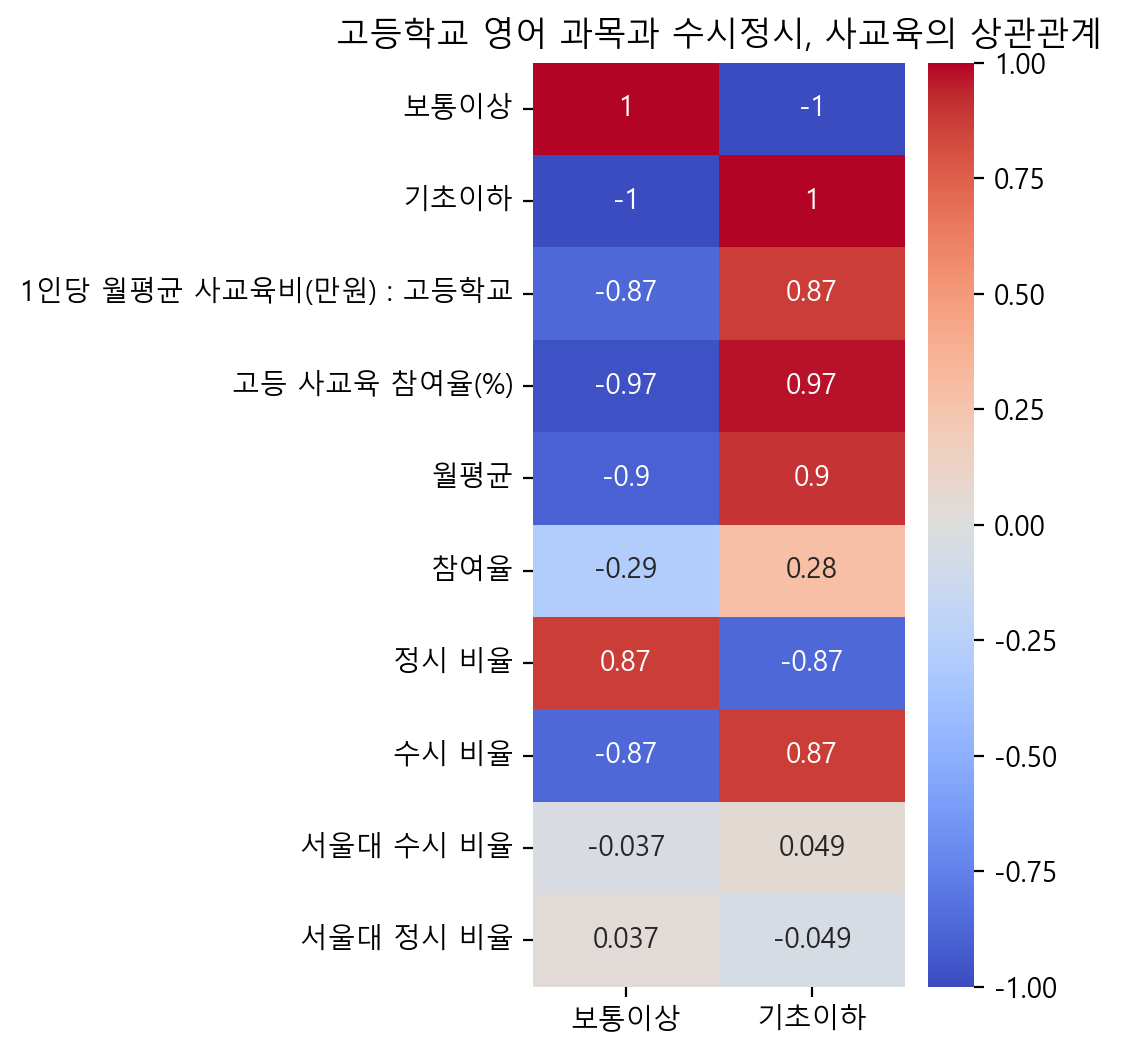

In [311]:
english_high_grade = high_grade[high_grade['과목']=='영어'][['연도', '보통이상', '기초이하']].set_index('연도')
english_high_grade = pd.concat([english_high_grade,
          seoul_high_middle_privat_edu[['1인당 월평균 사교육비(만원) : 고등학교', '고등 사교육 참여율(%)']]],
          axis=1)
english_high_grade = pd.concat([english_high_grade, english_seoul], axis=1)
english_high_grade = pd.concat([english_high_grade, entrance], axis=1)

plt.figure(figsize=(3, 6))
sns.heatmap(english_high_grade.corr()[['보통이상', '기초이하']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('고등학교 영어 과목과 수시정시, 사교육의 상관관계', fontsize=12)

Text(0.5, 1.0, '2011~2020 고등학생 영어 성취도')

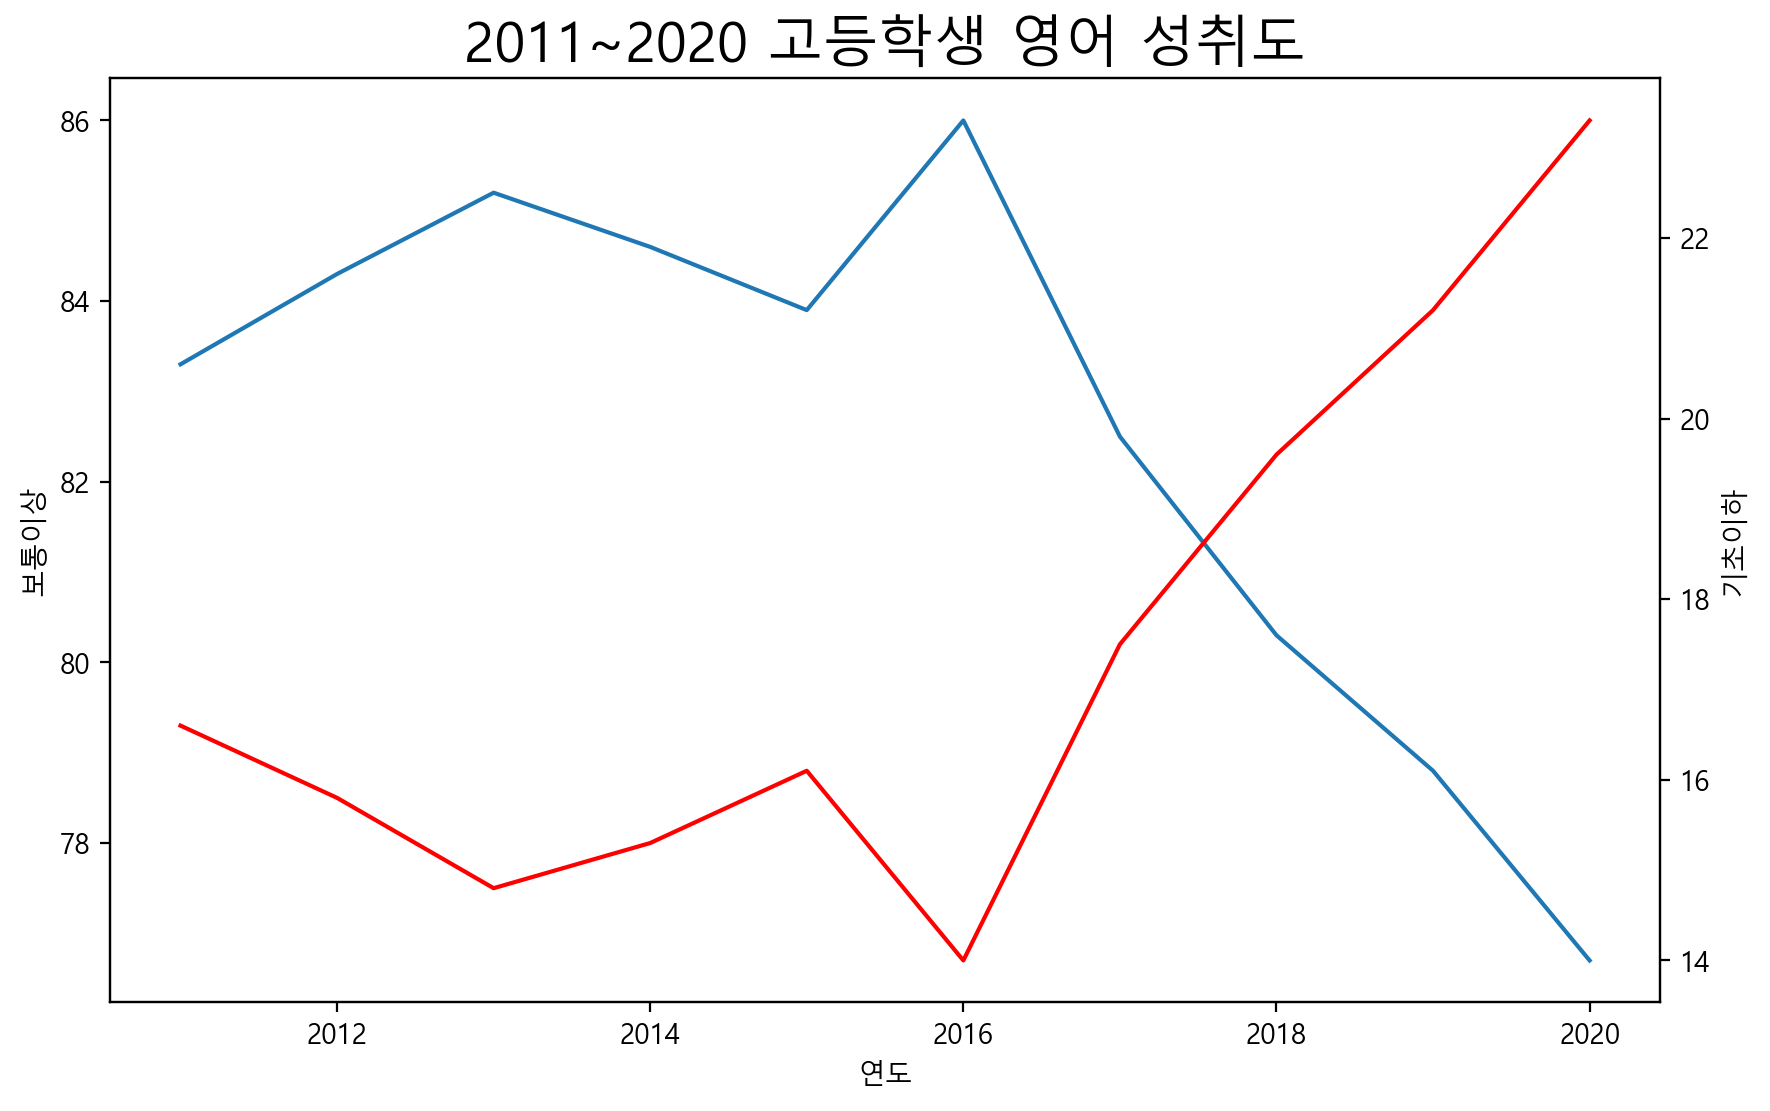

In [312]:
plt.figure(figsize=(10, 6))
pr_p = sns.lineplot(data=english_high_grade[['보통이상', '기초이하']], 
                    x="연도", y="보통이상", palette="Blue")
pr_c = pr_p.twinx()
pr_c = sns.lineplot(data=english_high_grade[['보통이상', '기초이하']],
                    x="연도", y="기초이하", color="Red")
plt.title('2011~2020 고등학생 영어 성취도', fontsize=20)

Text(0.5, 1.0, '중학교 국어 과목과 수시정시, 사교육의 상관관계')

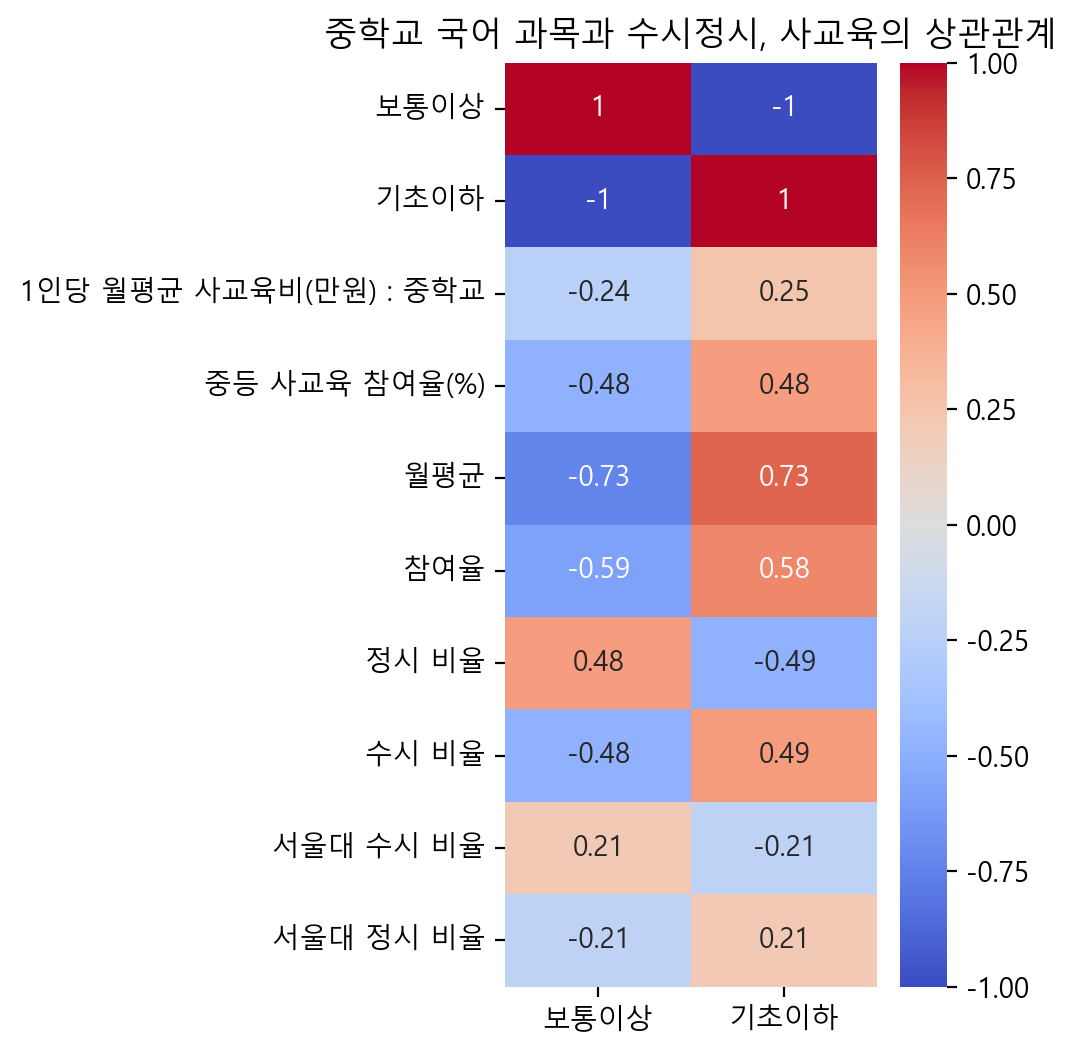

In [313]:
korean_mid_grade = mid_grade[mid_grade['과목']=='국어'][['연도', '보통이상', '기초이하']].set_index('연도')
korean_mid_grade = pd.concat([korean_mid_grade,
                               seoul_high_middle_privat_edu[['1인당 월평균 사교육비(만원) : 중학교', 
                                                             '중등 사교육 참여율(%)']]], axis=1)
korean_mid_grade = pd.concat([korean_mid_grade, korean_seoul], axis=1)
korean_mid_grade = pd.concat([korean_mid_grade, entrance], axis=1)



plt.figure(figsize=(3, 6))
sns.heatmap(korean_mid_grade.corr()[['보통이상', '기초이하']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('중학교 국어 과목과 수시정시, 사교육의 상관관계', fontsize=12)

Text(0.5, 1.0, '중학교 수학 과목과 수시정시, 사교육의 상관관계')

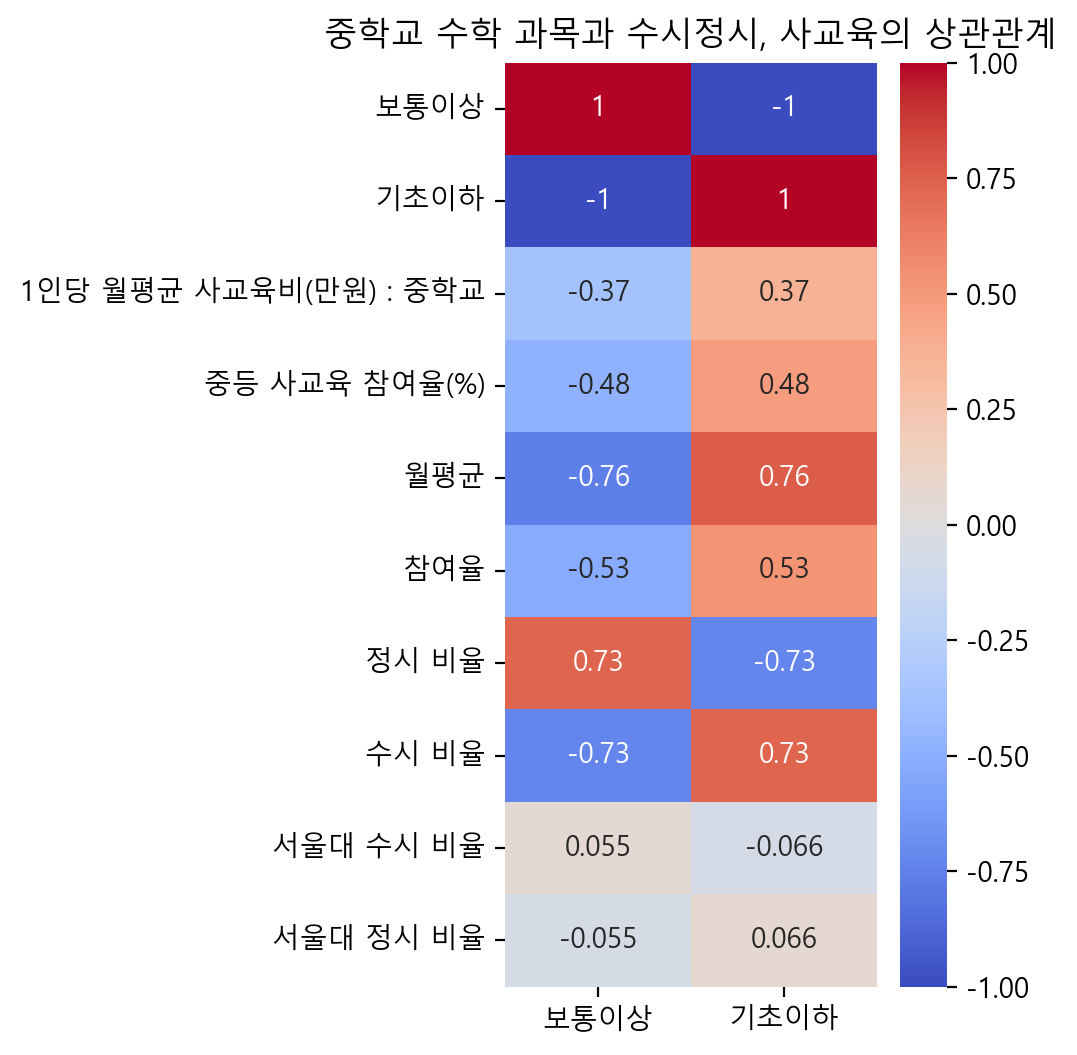

In [314]:
math_mid_grade = mid_grade[mid_grade['과목']=='수학'][['연도', '보통이상', '기초이하']].set_index('연도')
math_mid_grade = pd.concat([math_mid_grade,
                               seoul_high_middle_privat_edu[['1인당 월평균 사교육비(만원) : 중학교', 
                                                             '중등 사교육 참여율(%)']]], axis=1)
math_mid_grade = pd.concat([math_mid_grade, math_seoul], axis=1)
math_mid_grade = pd.concat([math_mid_grade, entrance], axis=1)



plt.figure(figsize=(3, 6))
sns.heatmap(math_mid_grade.corr()[['보통이상', '기초이하']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('중학교 수학 과목과 수시정시, 사교육의 상관관계', fontsize=12)

Text(0.5, 1.0, '영어 수학 과목과 수시정시, 사교육의 상관관계')

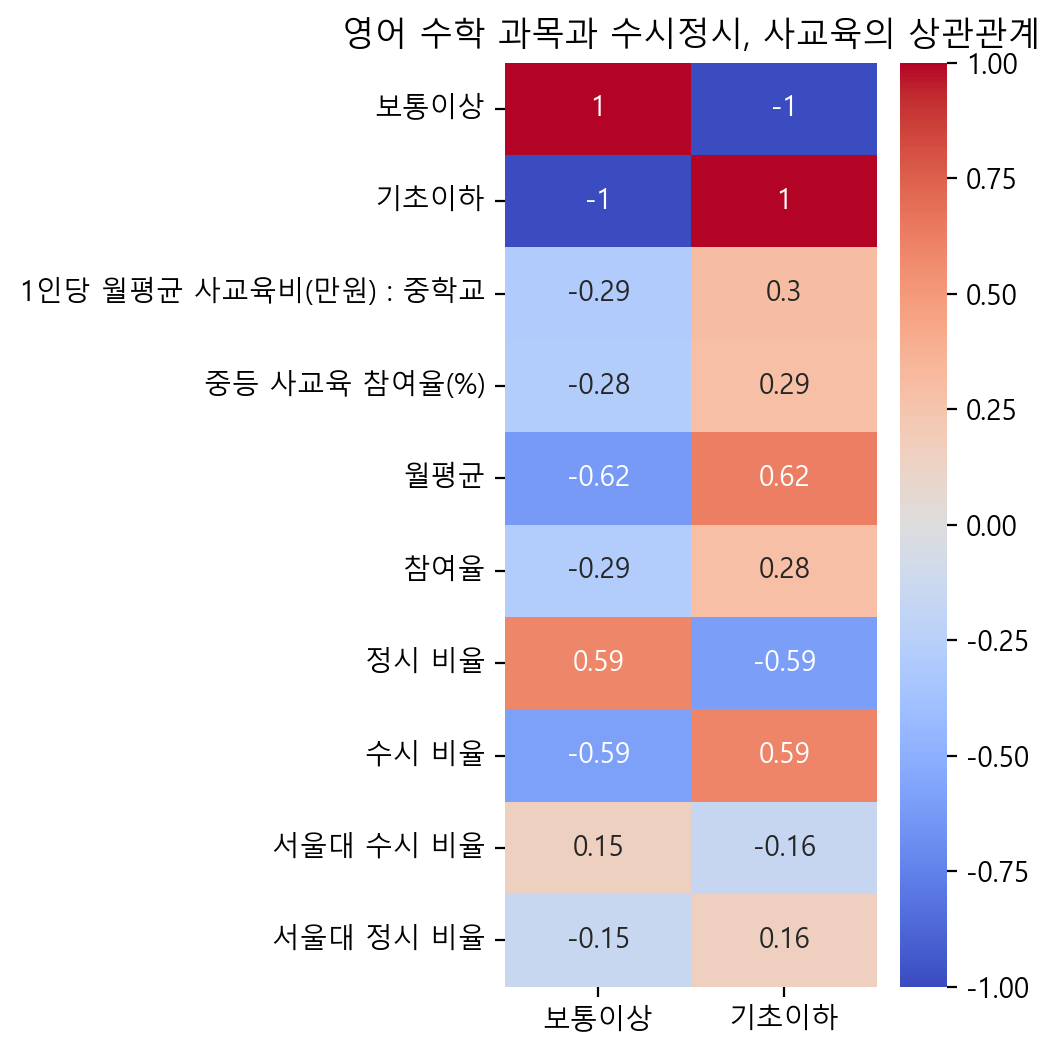

In [315]:
english_mid_grade = mid_grade[mid_grade['과목']=='영어'][['연도', '보통이상', '기초이하']].set_index('연도')
english_mid_grade = pd.concat([english_mid_grade,
                               seoul_high_middle_privat_edu[['1인당 월평균 사교육비(만원) : 중학교', 
                                                             '중등 사교육 참여율(%)']]], axis=1)
english_mid_grade = pd.concat([english_mid_grade, math_seoul], axis=1)
english_mid_grade = pd.concat([english_mid_grade, entrance], axis=1)



plt.figure(figsize=(3, 6))
sns.heatmap(english_mid_grade.corr()[['보통이상', '기초이하']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('영어 수학 과목과 수시정시, 사교육의 상관관계', fontsize=12)

### 메가스터디 교육 주가와 사교육, 수시 정시 비율 상관분석
**변수명**
- megastudy_edu : 메가스터디 교육 주가 정보
- megastudy_edu_mean : 메가스터디 교육 연평균 주가(종가 기준)
- megastudy_edu_analysis : 메가스터디 교육 연평균 주가와 사교육비 지표, 수시 정시 비율 지표 합본

In [316]:
megastudy_edu = fdr.DataReader("215200").reset_index()
megastudy_edu = megastudy_edu[megastudy_edu['Open'] != 0]

In [317]:
fig = go.Figure(data=[go.Candlestick(x=megastudy_edu['Date'],
                open=megastudy_edu['Open'],
                high=megastudy_edu['High'],
                low=megastudy_edu['Low'],
                close=megastudy_edu['Close'],
                increasing_line_color = 'red', # 상승봉 스타일링
                decreasing_line_color = 'blue' # 하락봉 스타일링
                )])

fig.show()

In [318]:
megastudy_edu_mean = pd.DataFrame(data=range(2015,2021), columns=['연도'])
megastudy_edu_mean['메가스터디 교육 평균 주가'] = 0

for i, v in enumerate(megastudy_edu_mean['연도']):
    megastudy_edu_mean.loc[i, '메가스터디 교육 평균 주가'] = round(
        sum(megastudy_edu[megastudy_edu['Date'].dt.year == v]['Close']) / len(megastudy_edu[megastudy_edu['Date'].dt.year == v]['Close']))


Text(0.5, 1.0, '2015~2020 메가스터디 교육 주가 상관계수')

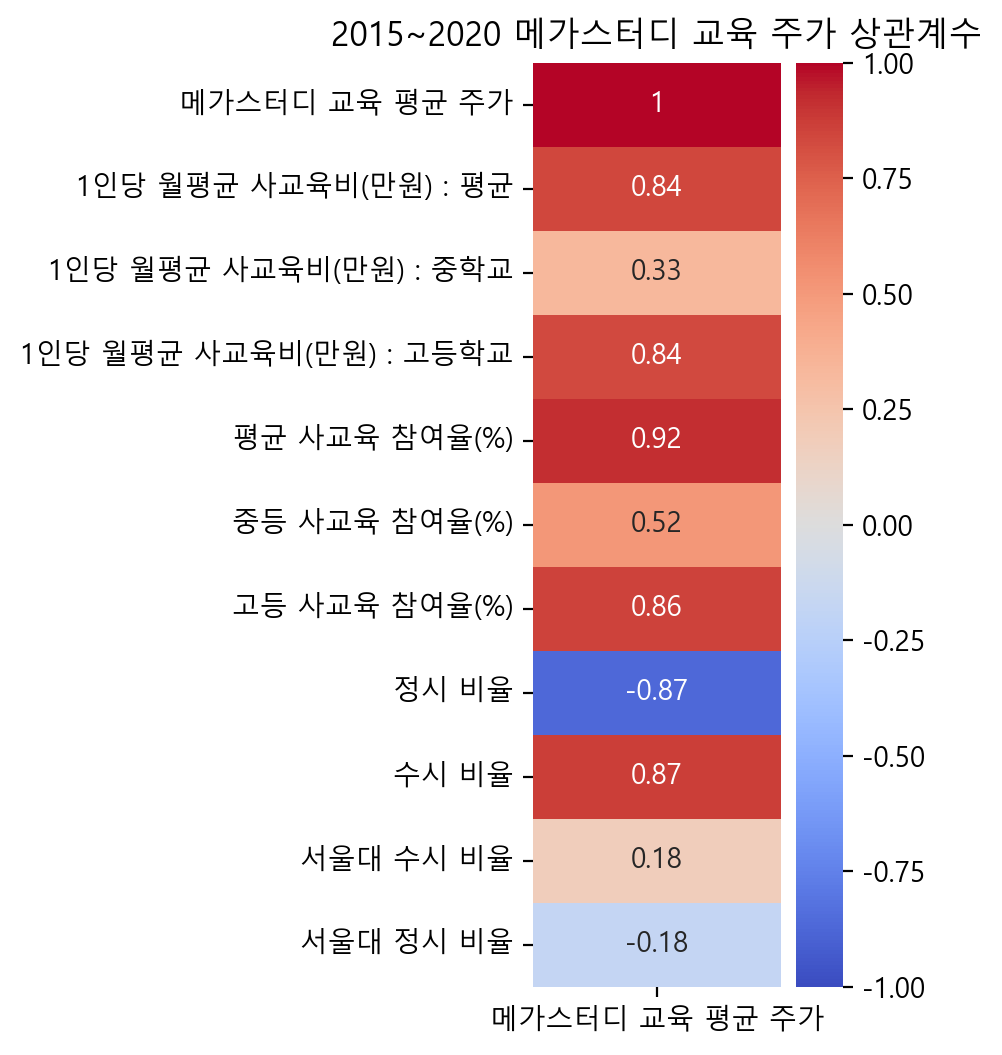

In [319]:
megastudy_edu_analysis = pd.merge(megastudy_edu_mean, privat_edu_entrance, 
                                  left_on='연도', right_on=privat_edu_entrance.index).set_index('연도')

plt.figure(figsize=(2, 6))
sns.heatmap(megastudy_edu_analysis.corr()[['메가스터디 교육 평균 주가']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('2015~2020 메가스터디 교육 주가 상관계수', fontsize=12)